# Understanding the failure of MAP-superresolution

In [1]:
from data_utils import load_series_nii
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
    

/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [119]:
# define loading function:
import nibabel as nib
def load_series_nii(namepat, series=[], dtype='float32', is_print=True):
    """
    Loads a series of NIFTI files. For example:
        file_01.nii, file_02.nii ...

    Args:
        namepat (string): Generic file name with format pattern
        series (range): Filenames to load would be:
                        for i in series:
                            filename = namepat.format(i)
                        if series=[], assumes namepat is the filename (single image).
        dtype (string): default float32 (GPU)
        is_print (boolean): want to print what it's loading?

    Returns:
        img (np.array): image array with series loaded in the 4th dim
        hdr (nifti header): Contains the meta data of the nii image
    """
    print ('Converting to:', dtype)
    if not series:
        if is_print:
            print ('Loading:', namepat)
        nii = nib.load(namepat)
        img = nii.get_data().astype(dtype)
        hdr = nii.get_header()
    elif len(series) == 1:
        filename = namepat.format(series[0])
        if is_print:
            print ('Loading single channel:', filename)
        nii = nib.load(filename)
        img = nii.get_data().astype(dtype)
        hdr = nii.get_header()
    else:
        filename = namepat.format(series[0])
        if is_print:
            print ('Loading:', filename, 0)
        nii = nib.load(filename)
        dat = nii.get_data().astype(dtype)
        hdr = nii.get_header()
        shplen = len(dat.shape)
        shape = [0,] * (shplen + 1)
        for i in range(shplen):
            shape[i] = dat.shape[i]
        shape[shplen] = len(series)
        img = np.zeros(shape)
        img[..., 0] = dat
        cnt = 1
        for i in series[1:]:
            filename = namepat.format(i)
            if is_print:
                print ('Loading:', filename, cnt)
            nii = nib.load(filename)
            img[..., cnt] = nii.get_data().astype(dtype)
            cnt += 1
    return img, hdr

In [122]:
# load a MAP coefficient (22):
data_dir = "/Users/ryutarotanno/tmp/MAP/HCP_map_v2/"
subj_list = ['992774', '125525', '205119', '133928', '570243', '448347', '654754', '153025',
             '101915', '106016', '120111', '122317', '130316', '148335', '153025', '159340',
             '162733', '163129', '178950', '188347', '189450', '199655', '211720', '280739',
             '106319', '117122', '133827', '140824', '158540', '196750', '205826', '366446']
subpath="/T1w/Diffusion/"
no_channels=22
gt_header="h4_all_{:02d}.nii"
series=range(1,no_channels+3)
# upsampling_rate=2
# input_header='h4_all_lowres_'+str(upsampling_rate)+'_{:02d}.nii'

('Converting to:', 'float32')


/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: ``get_header`` is deprecated.
Please use the ``img.header`` property instead


('Converting to:', 'float32')


/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: ``get_header`` is deprecated.
Please use the ``img.header`` property instead


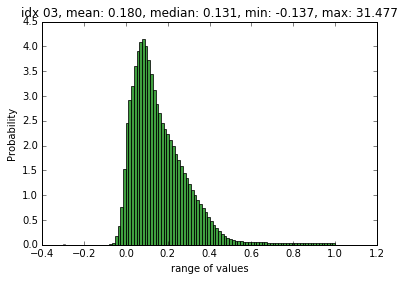

In [123]:
# Load the image:
img,_=load_series_nii(data_dir+subj_list[0]+subpath+gt_header, series, dtype='float32', is_print=False)
brain_mask = img[...,0]==0
ch_idx=3
v_ch=img[...,ch_idx]
mean=np.mean(v_ch[brain_mask])
median=np.median(v_ch[brain_mask])
minim =np.min(v_ch[brain_mask]) 
maxim =np.max(v_ch[brain_mask]) 
range_list=[(0.3,1.7),(-0.3,1.0),(-0.3, 0.3),(-0.35, 0.3),(-0.15, 0.75),(-0.3, 0.4),(-0.15, 0.75),(-0.05, 0.6),(-0.15, 0.15),
            (-0.15,0.15),(-0.05, 0.6),(-0.15,0.1),(-0.05, 0.6),(-0.1,0.15),(-0.1,0.15),(-0.1,0.15),(-0.1,0.15),
            (-0.05, 0.6),(-0.15, 0.15),(-0.05, 0.6),(-0.15, 0.15),(-0.05, 0.6)]
n, bins, patches = plt.hist(v_ch[brain_mask], bins=100, range=range_list[ch_idx-2],normed=1, facecolor='g', alpha=0.75)
plt.xlabel('range of values')
plt.ylabel('Probability')
plt.title("idx {:02d}, mean: {:4.3f}, median: {:4.3f}, min: {:4.3f}, max: {:4.3f}".format(ch_idx,mean,median,minim,maxim))

ERROR! Session/line number was not unique in database. History logging moved to new session 820
('Converting to:', 'float32')


/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: ``get_header`` is deprecated.
Please use the ``img.header`` property instead


('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
Saving h4_all_01.png


/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
Saving h4_all_02.png
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
Saving h4_all_03.pn

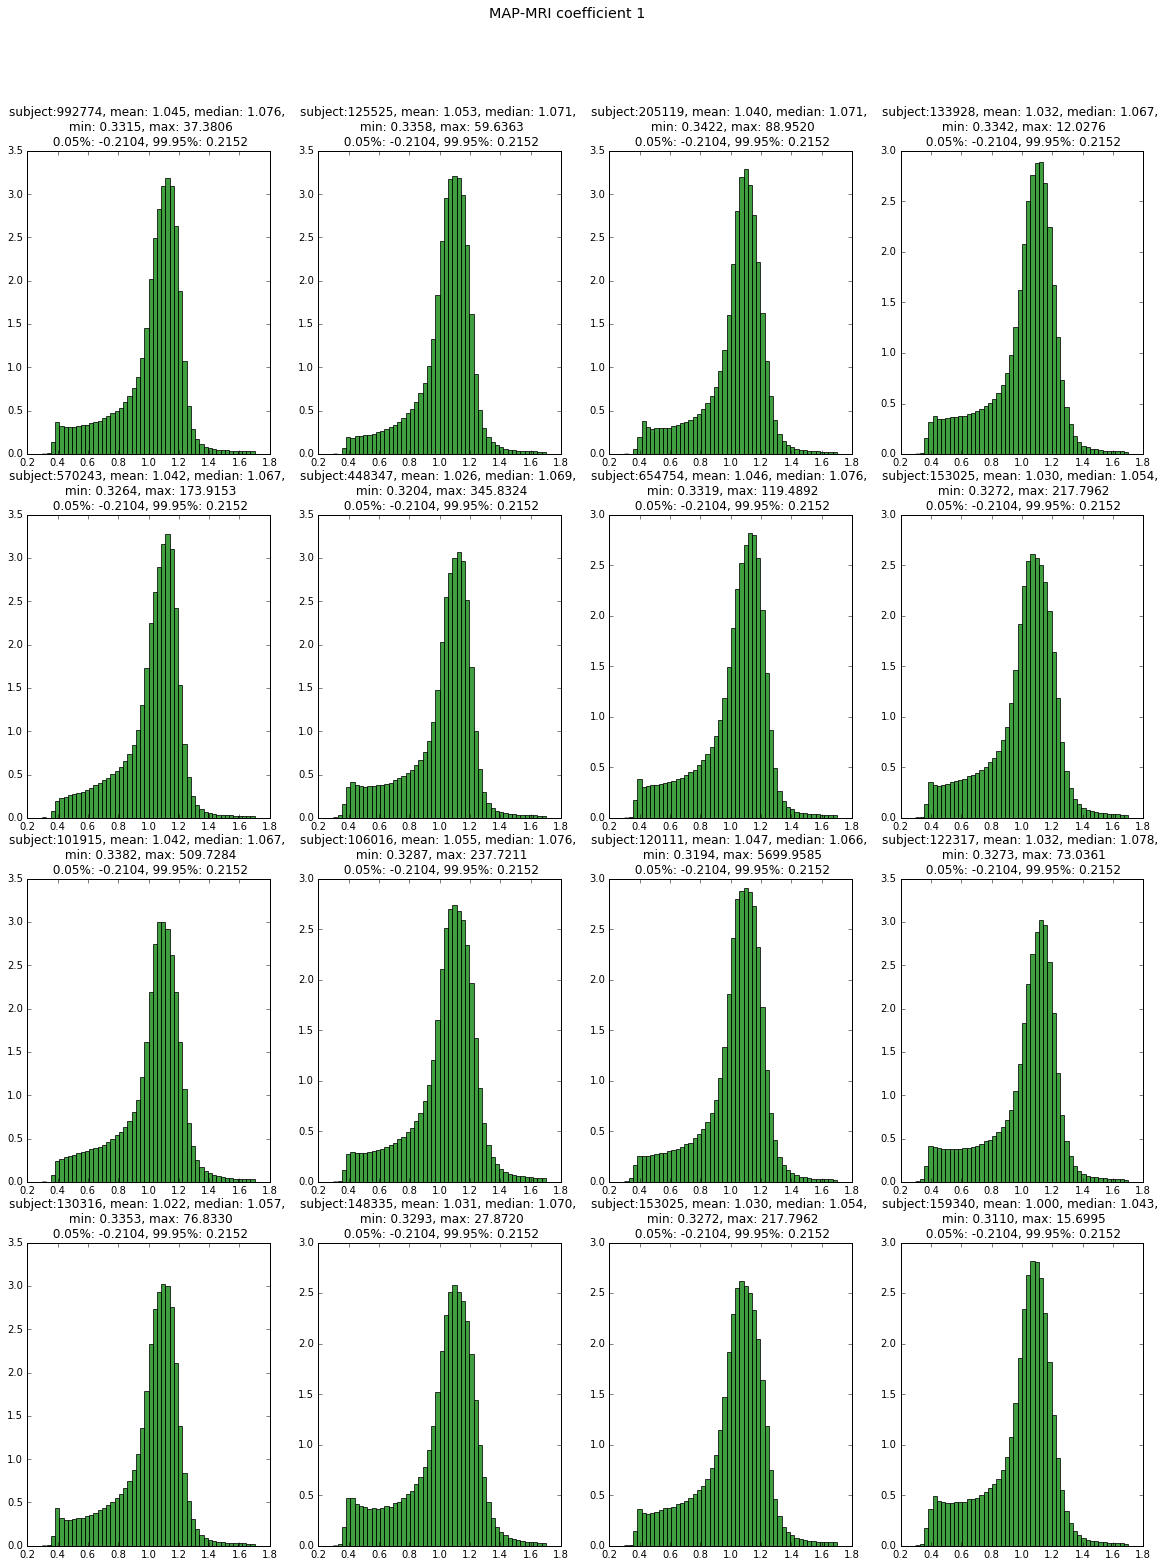

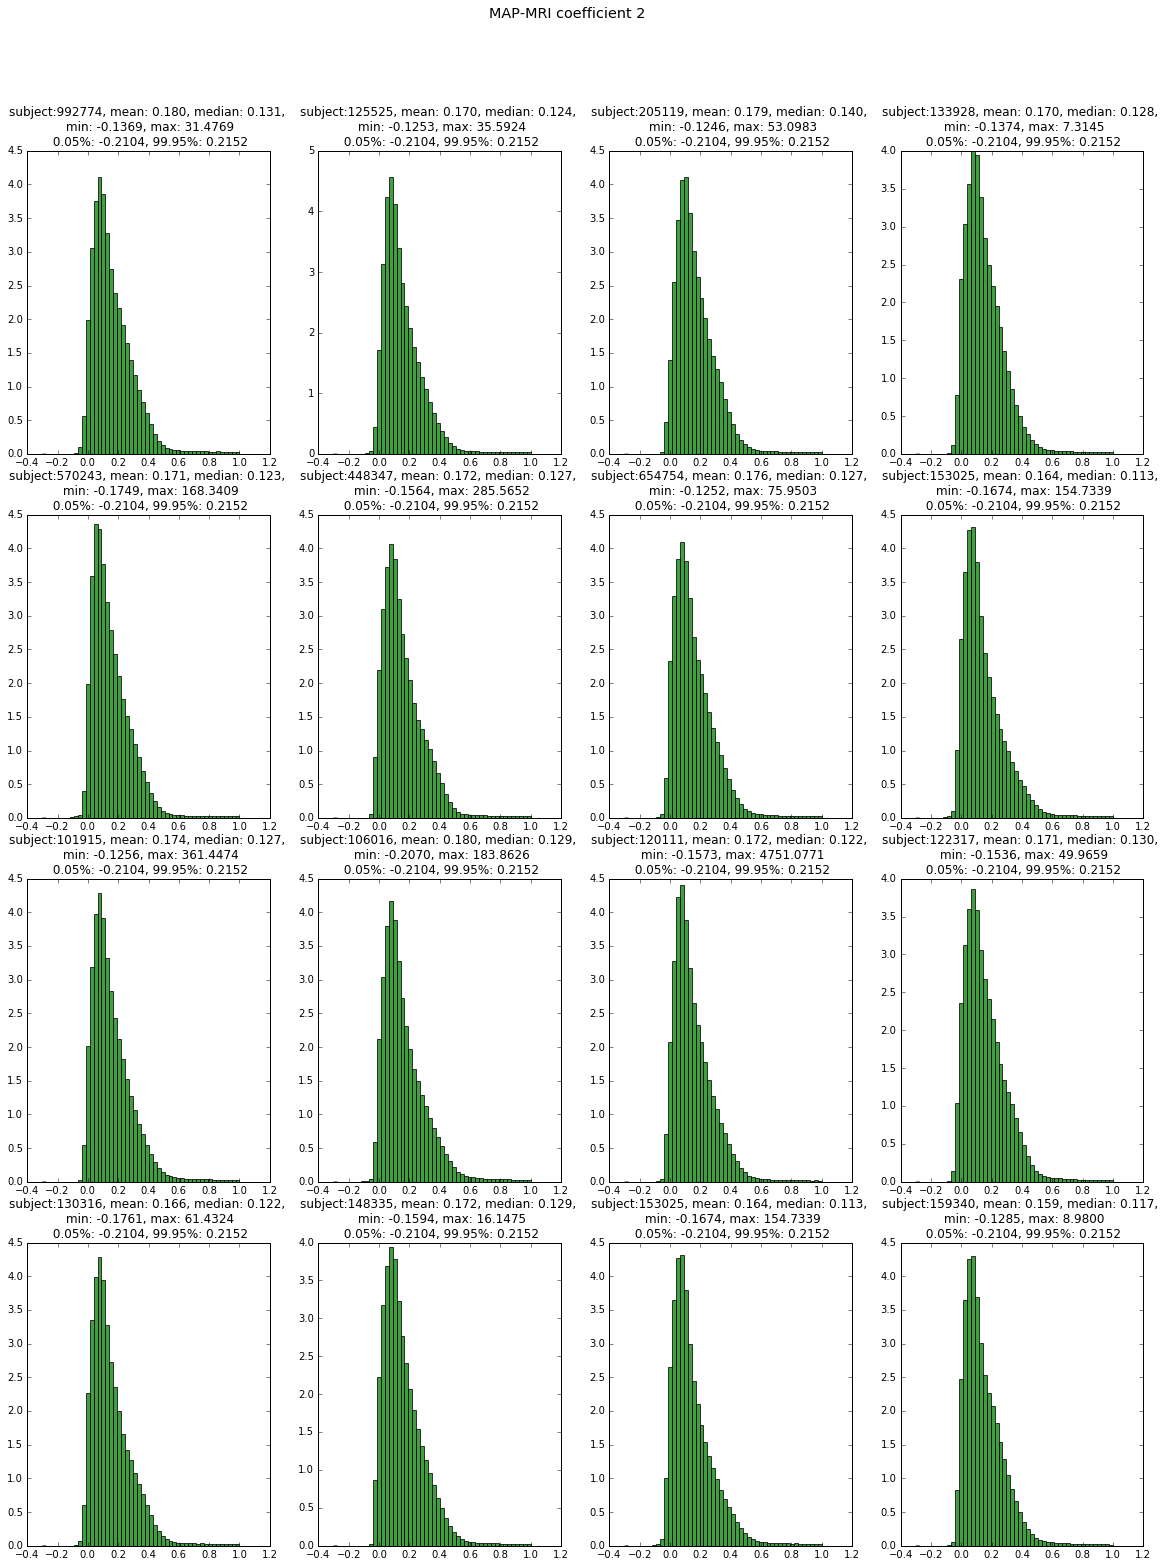

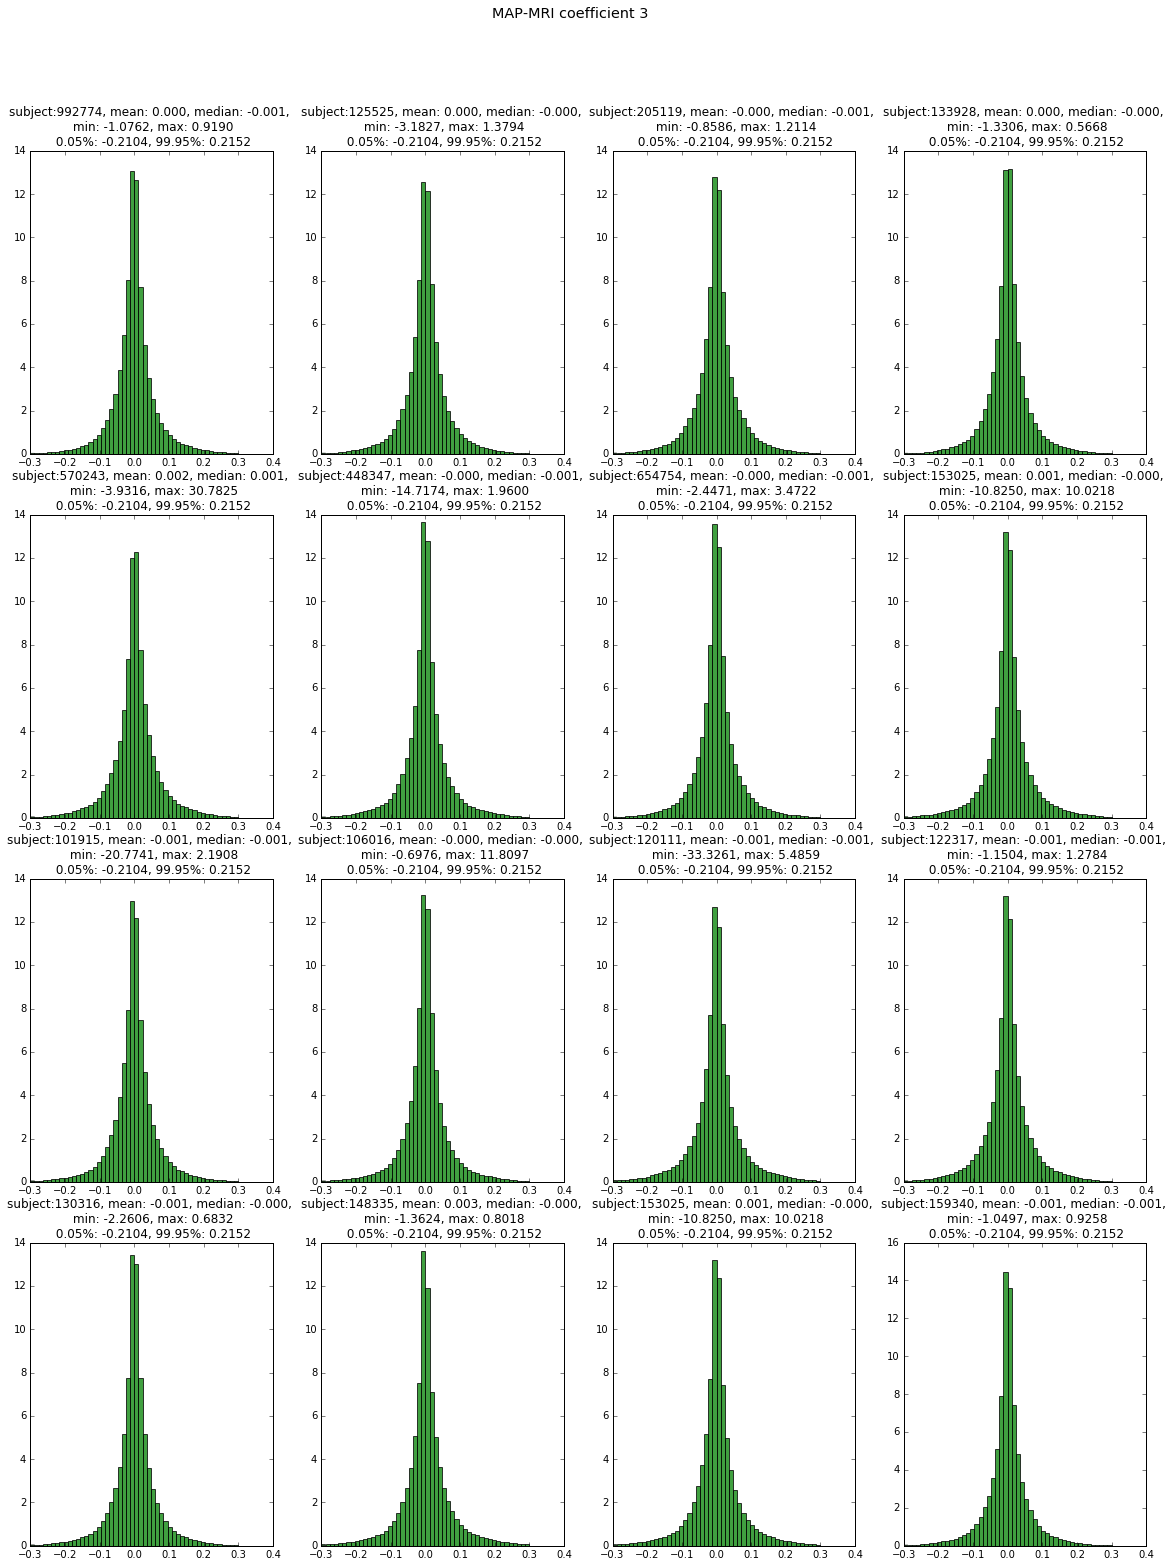

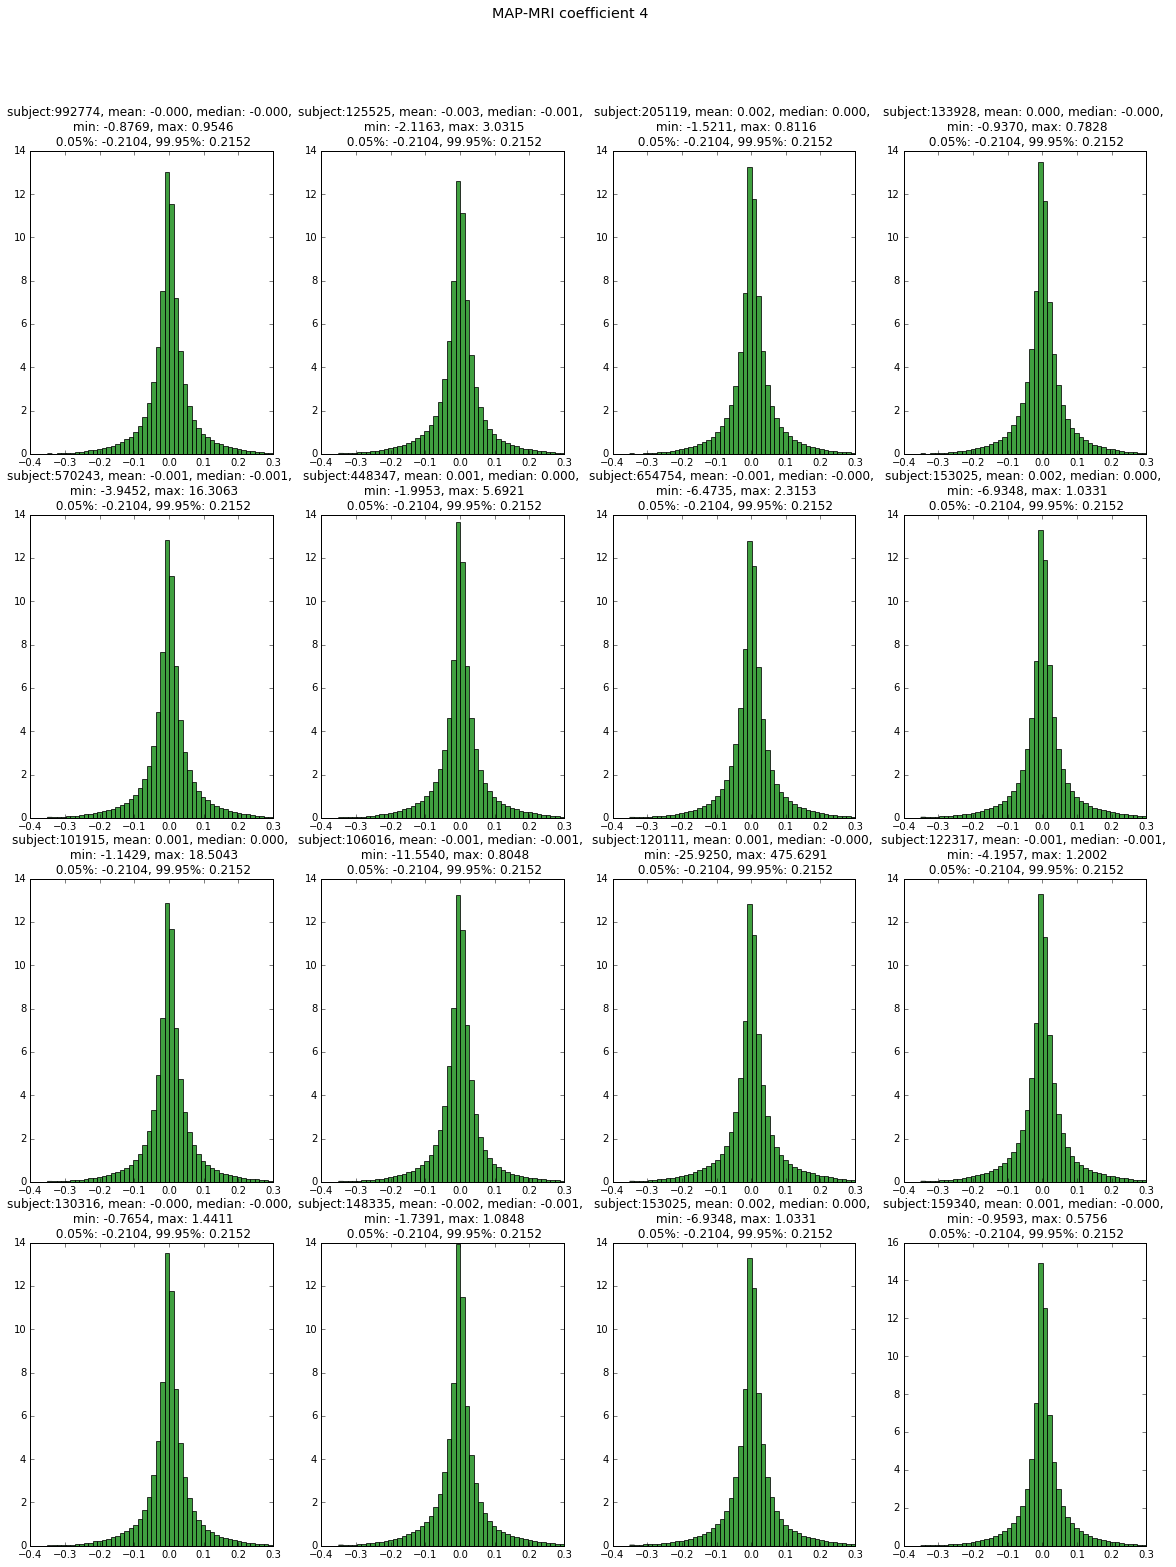

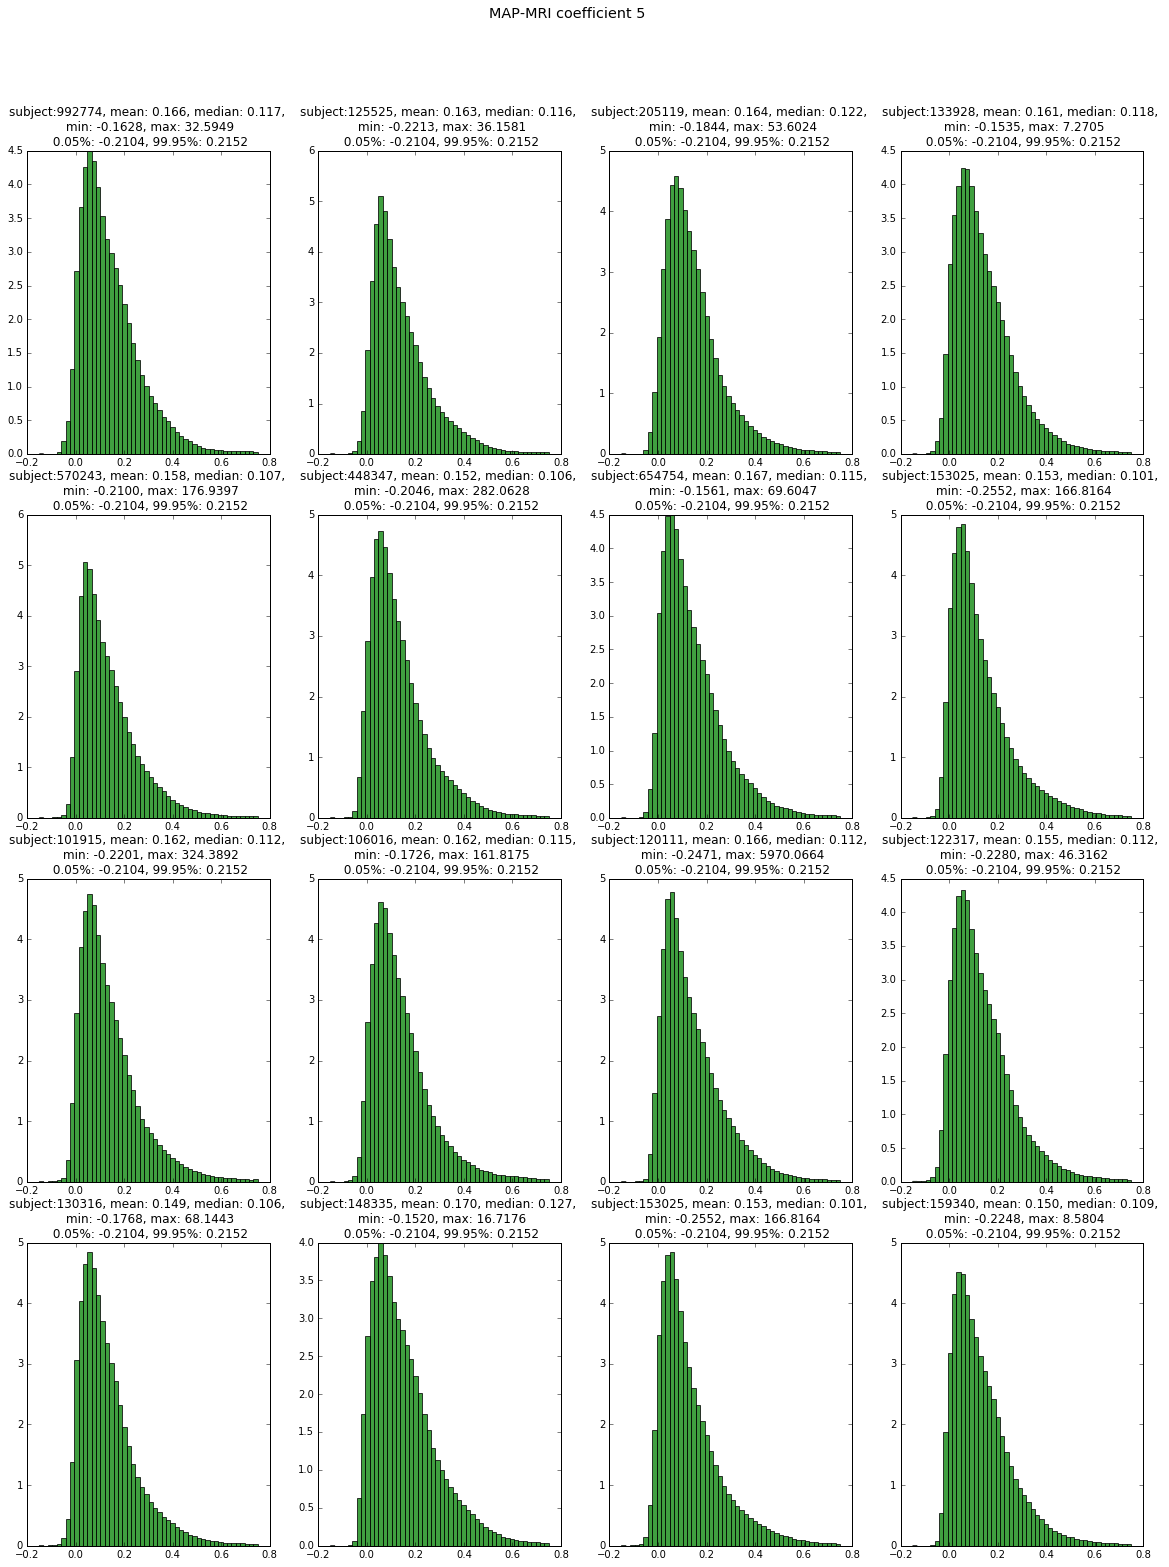

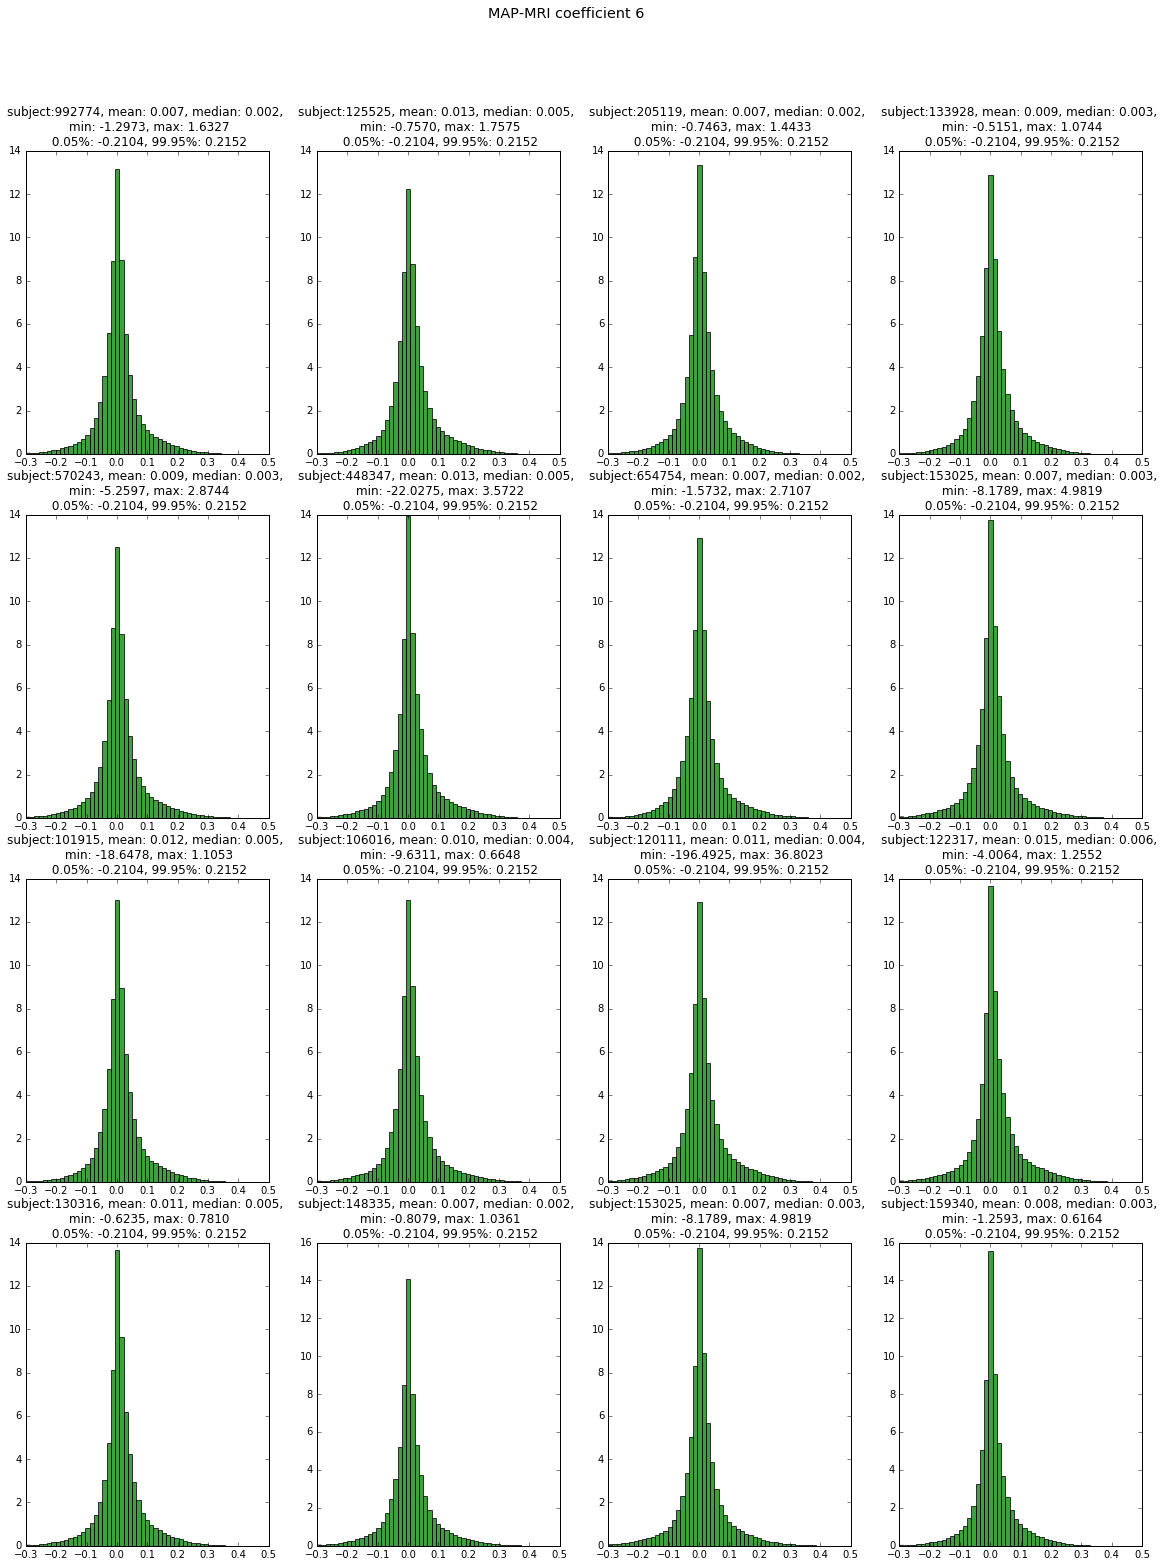

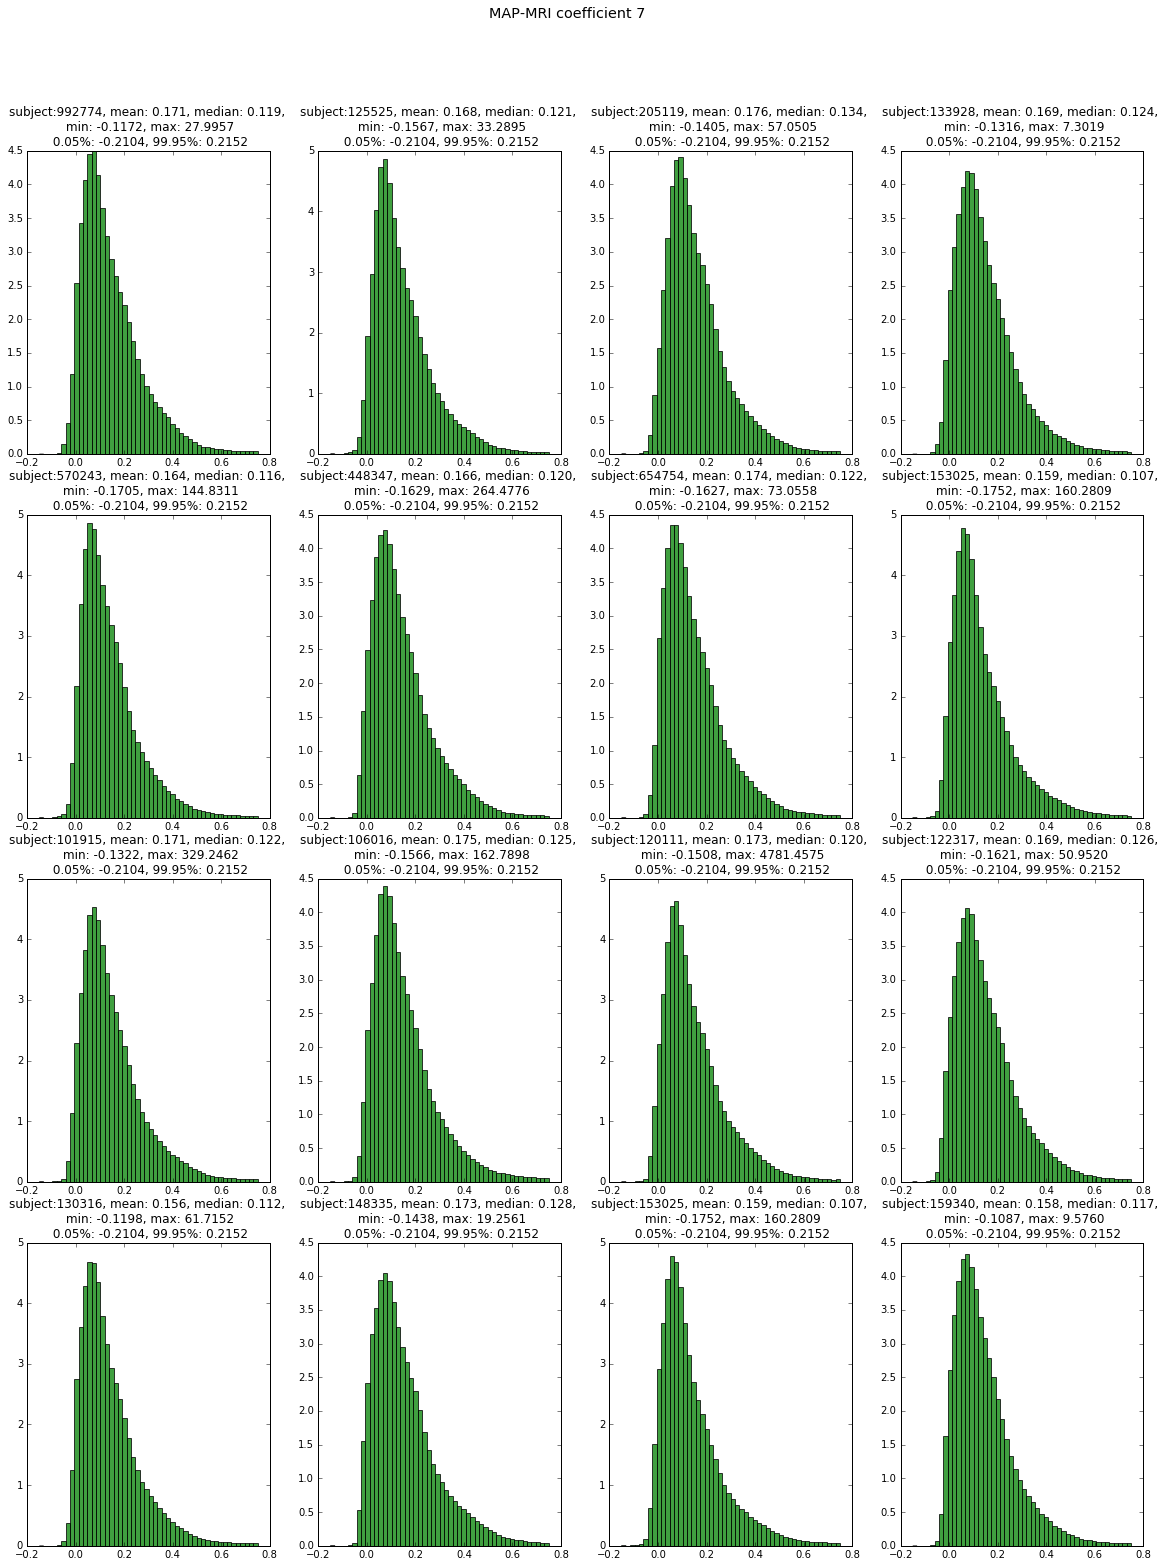

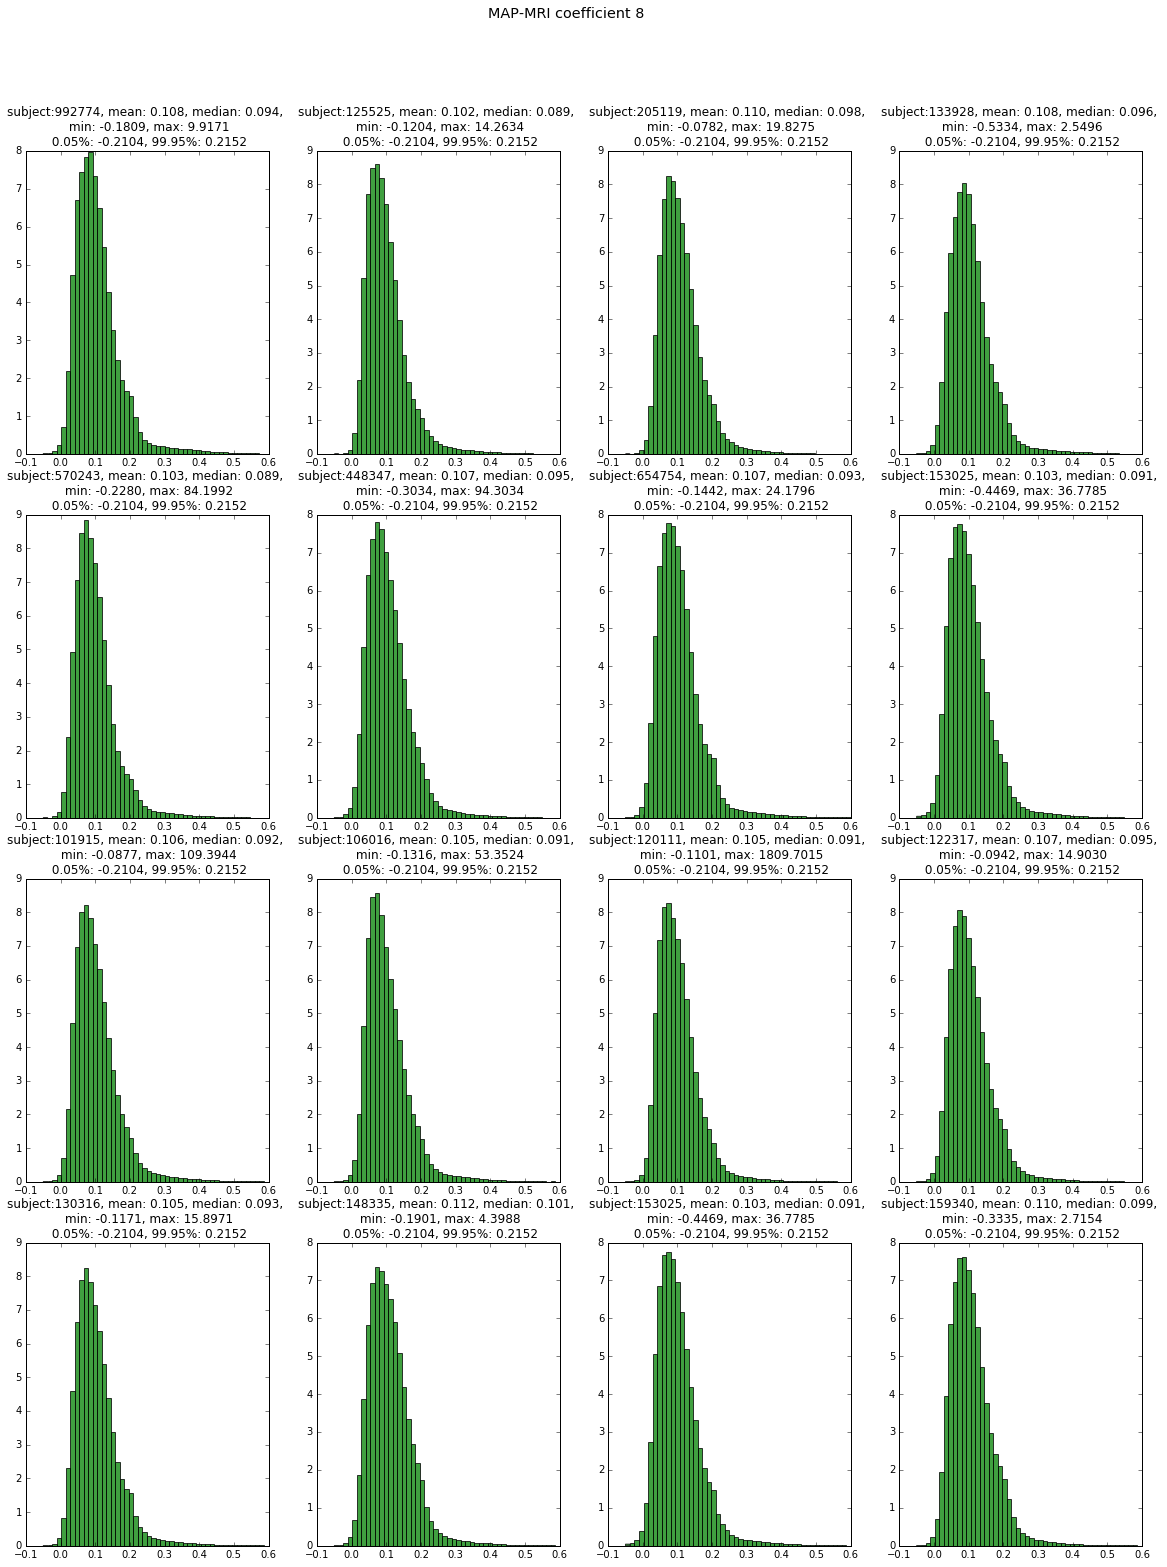

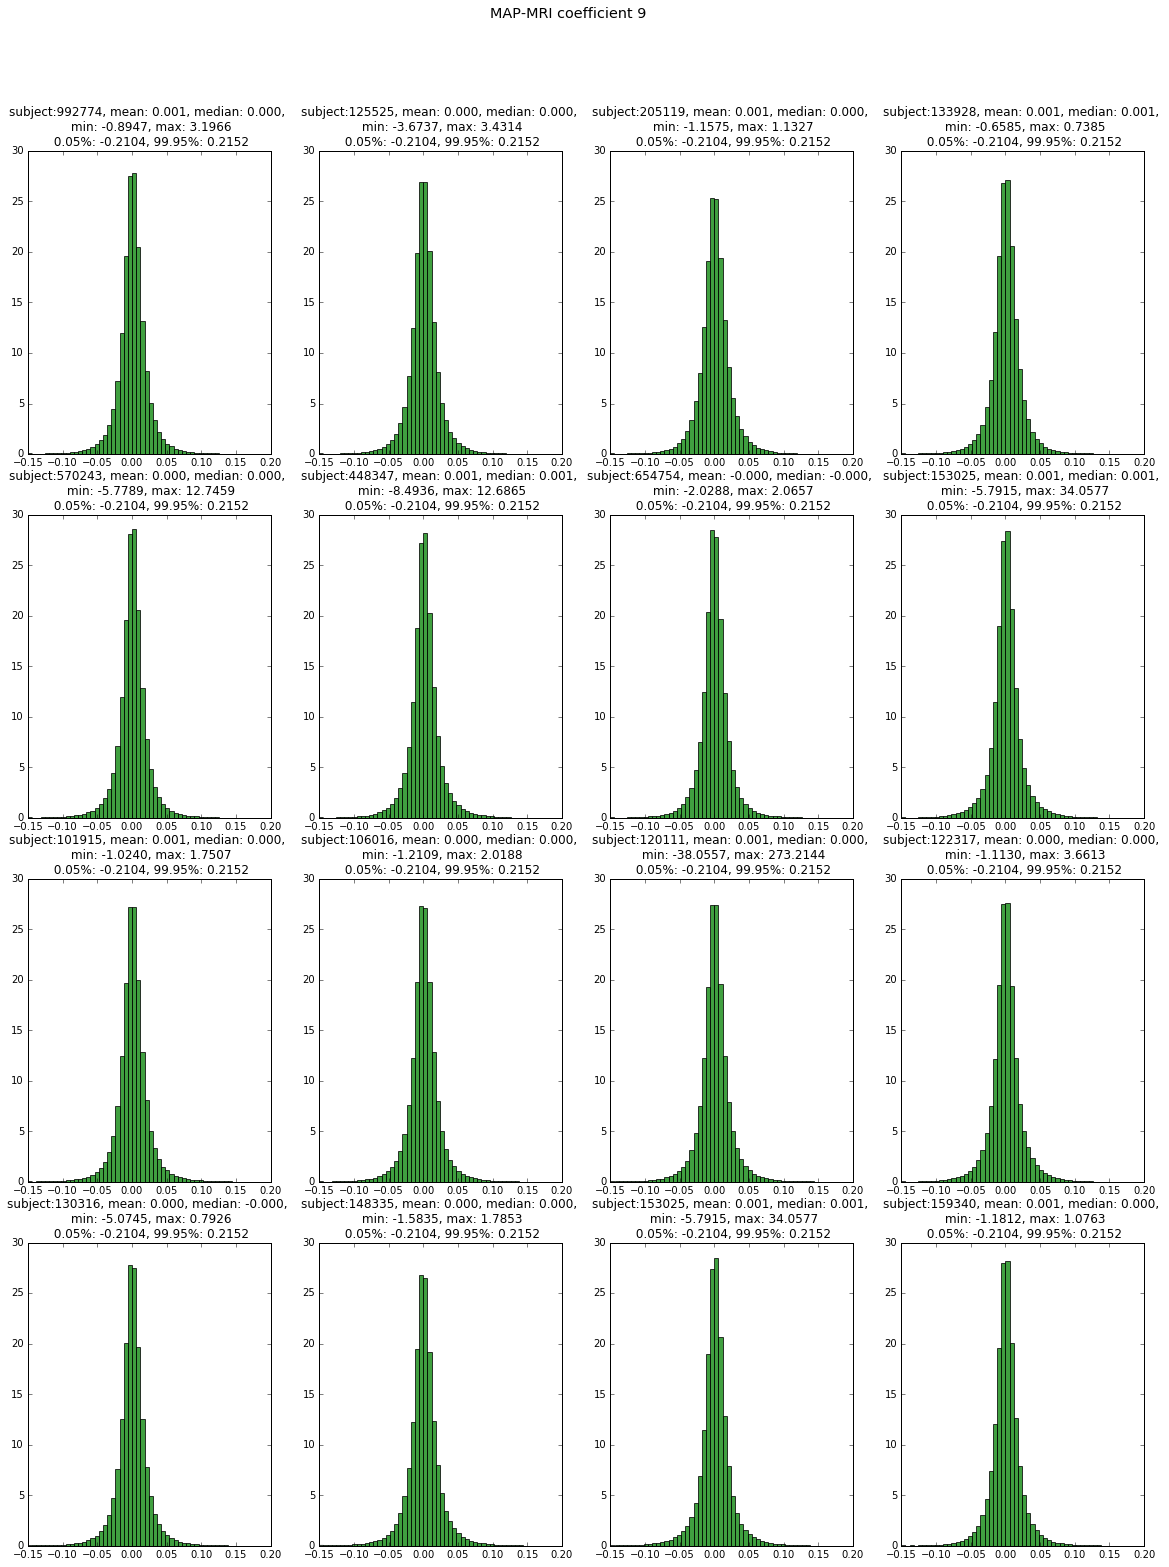

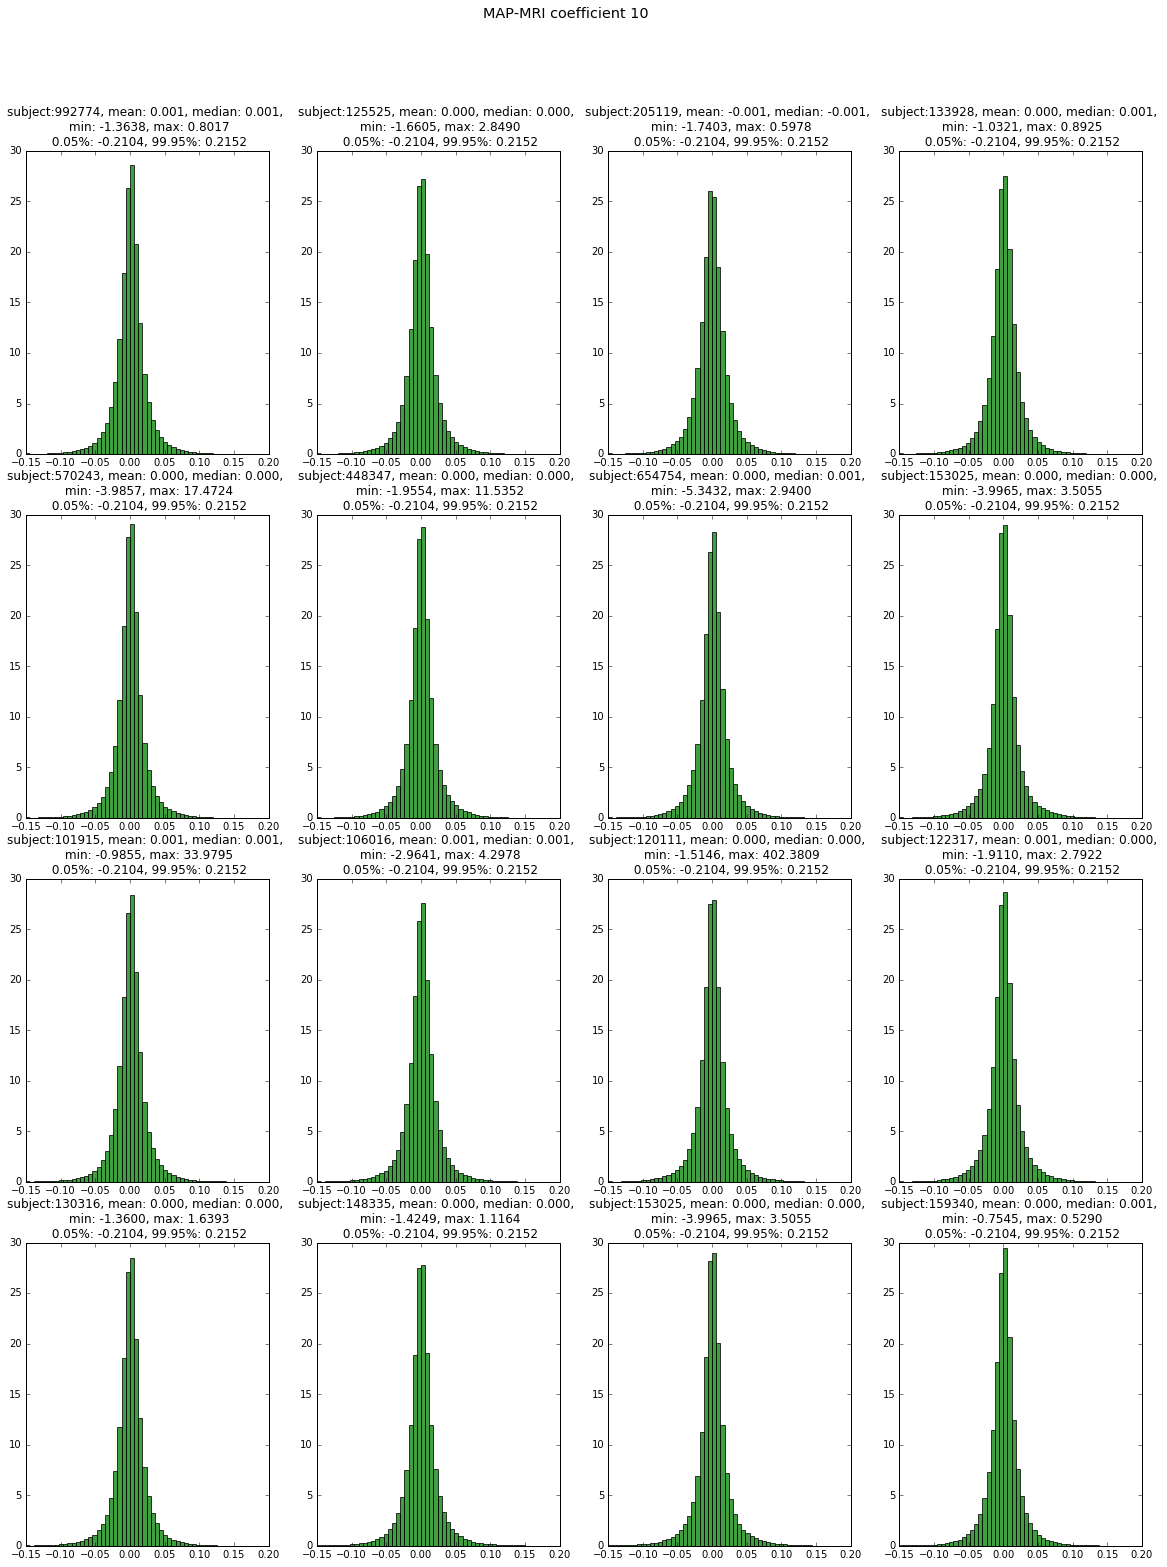

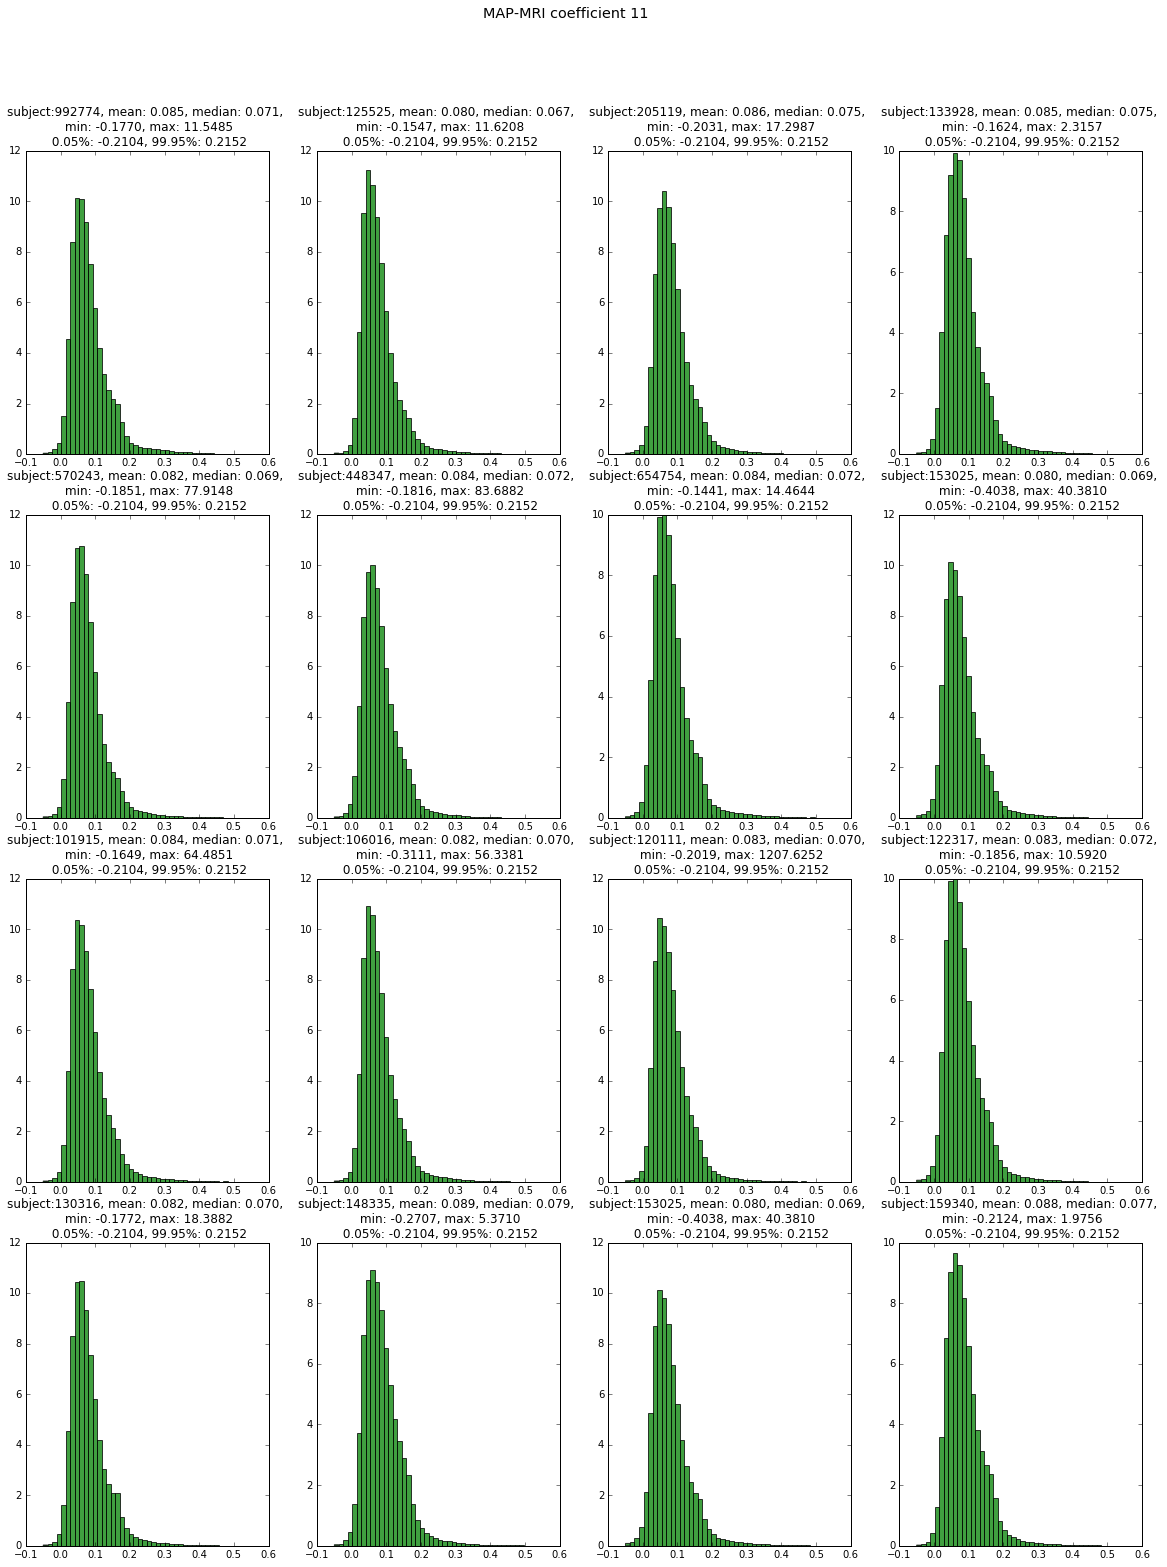

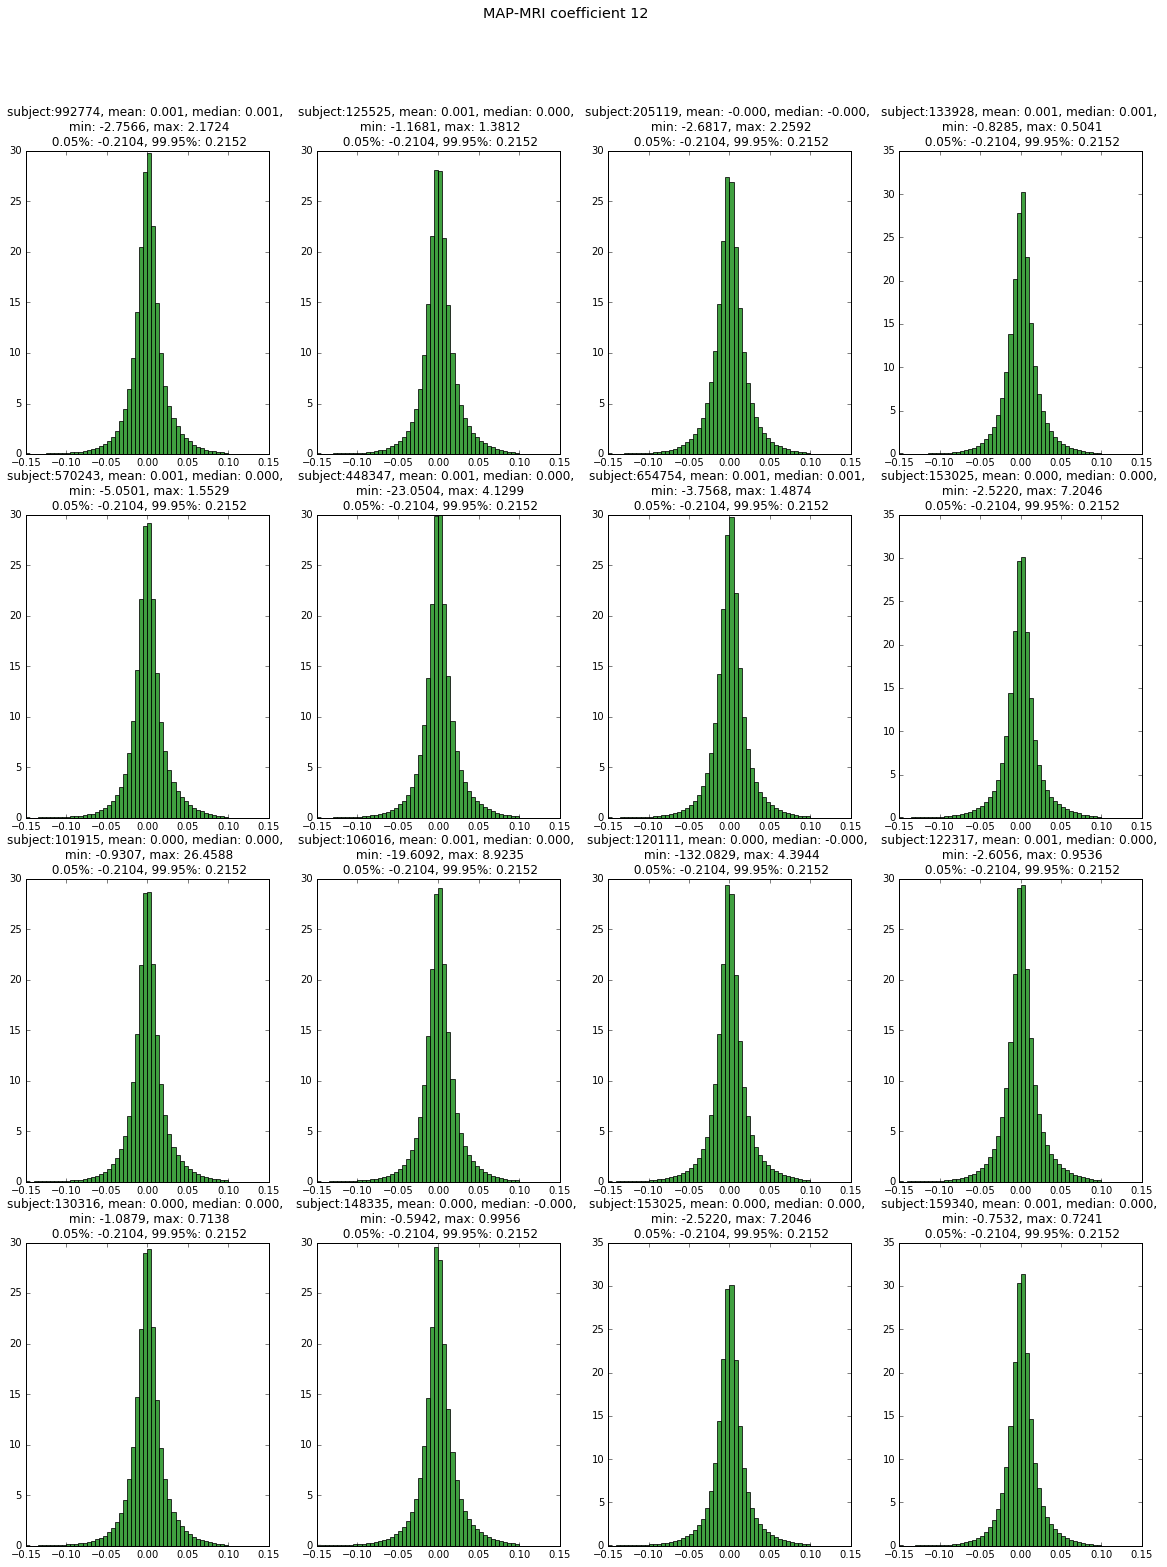

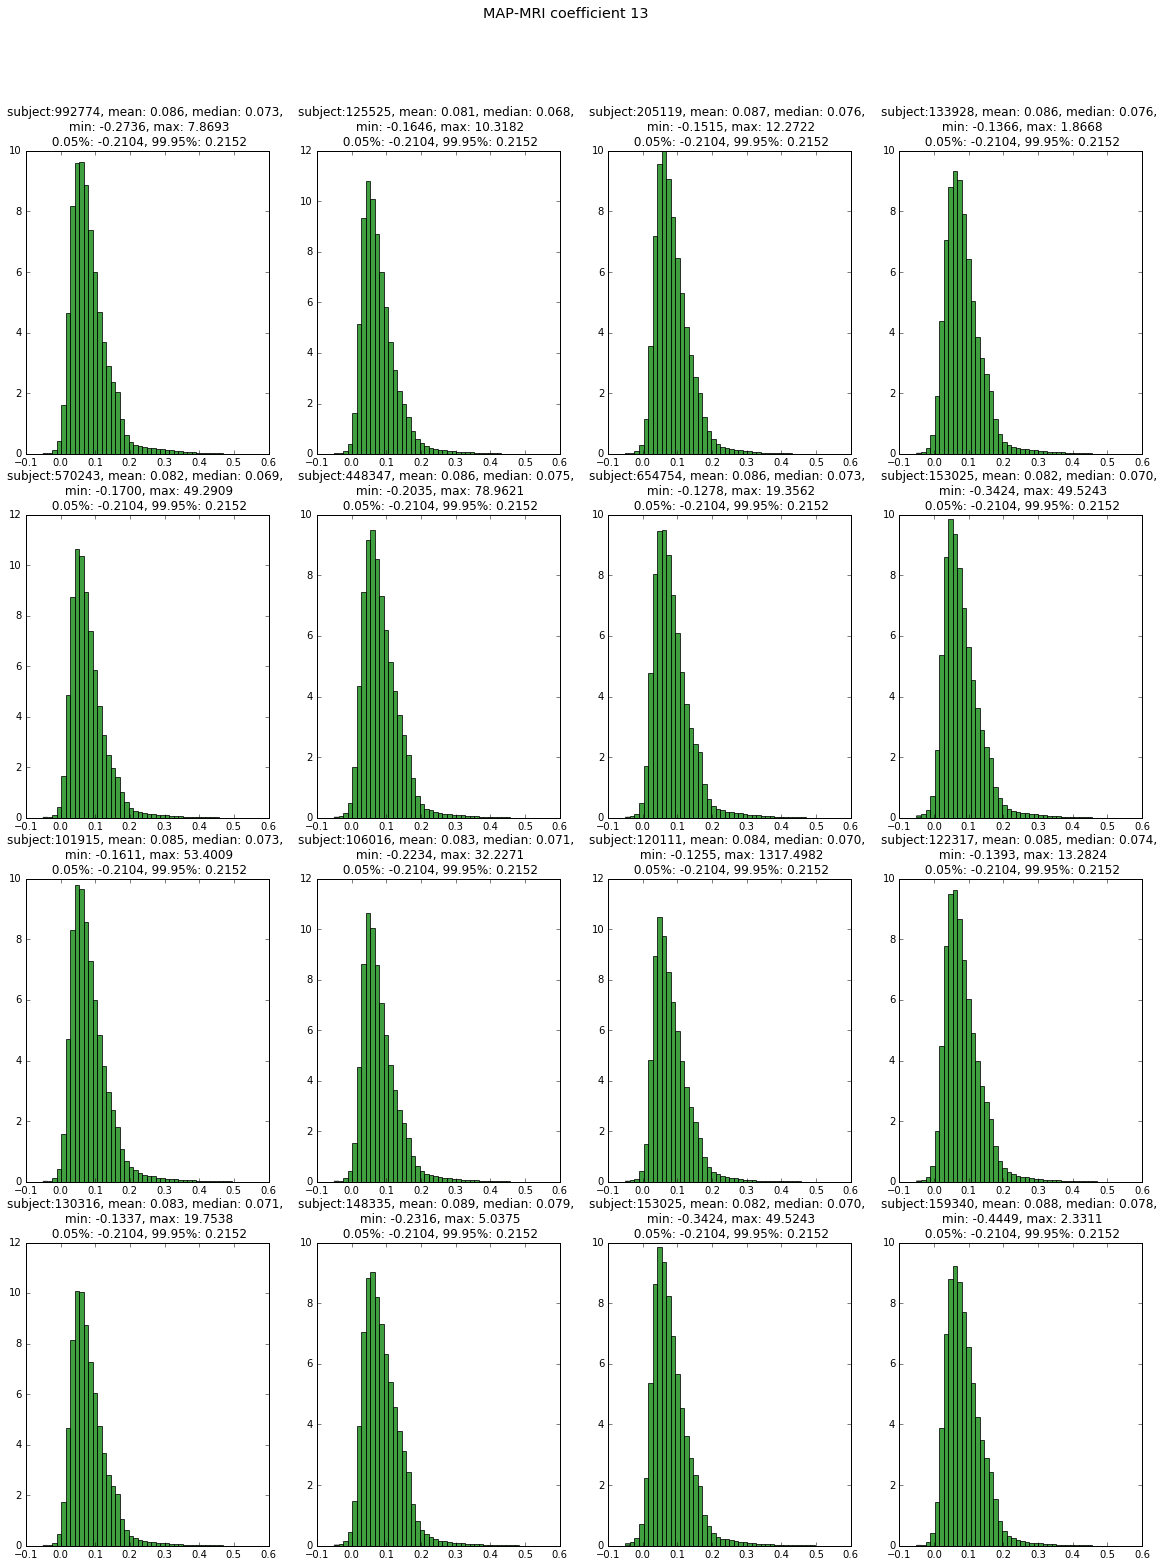

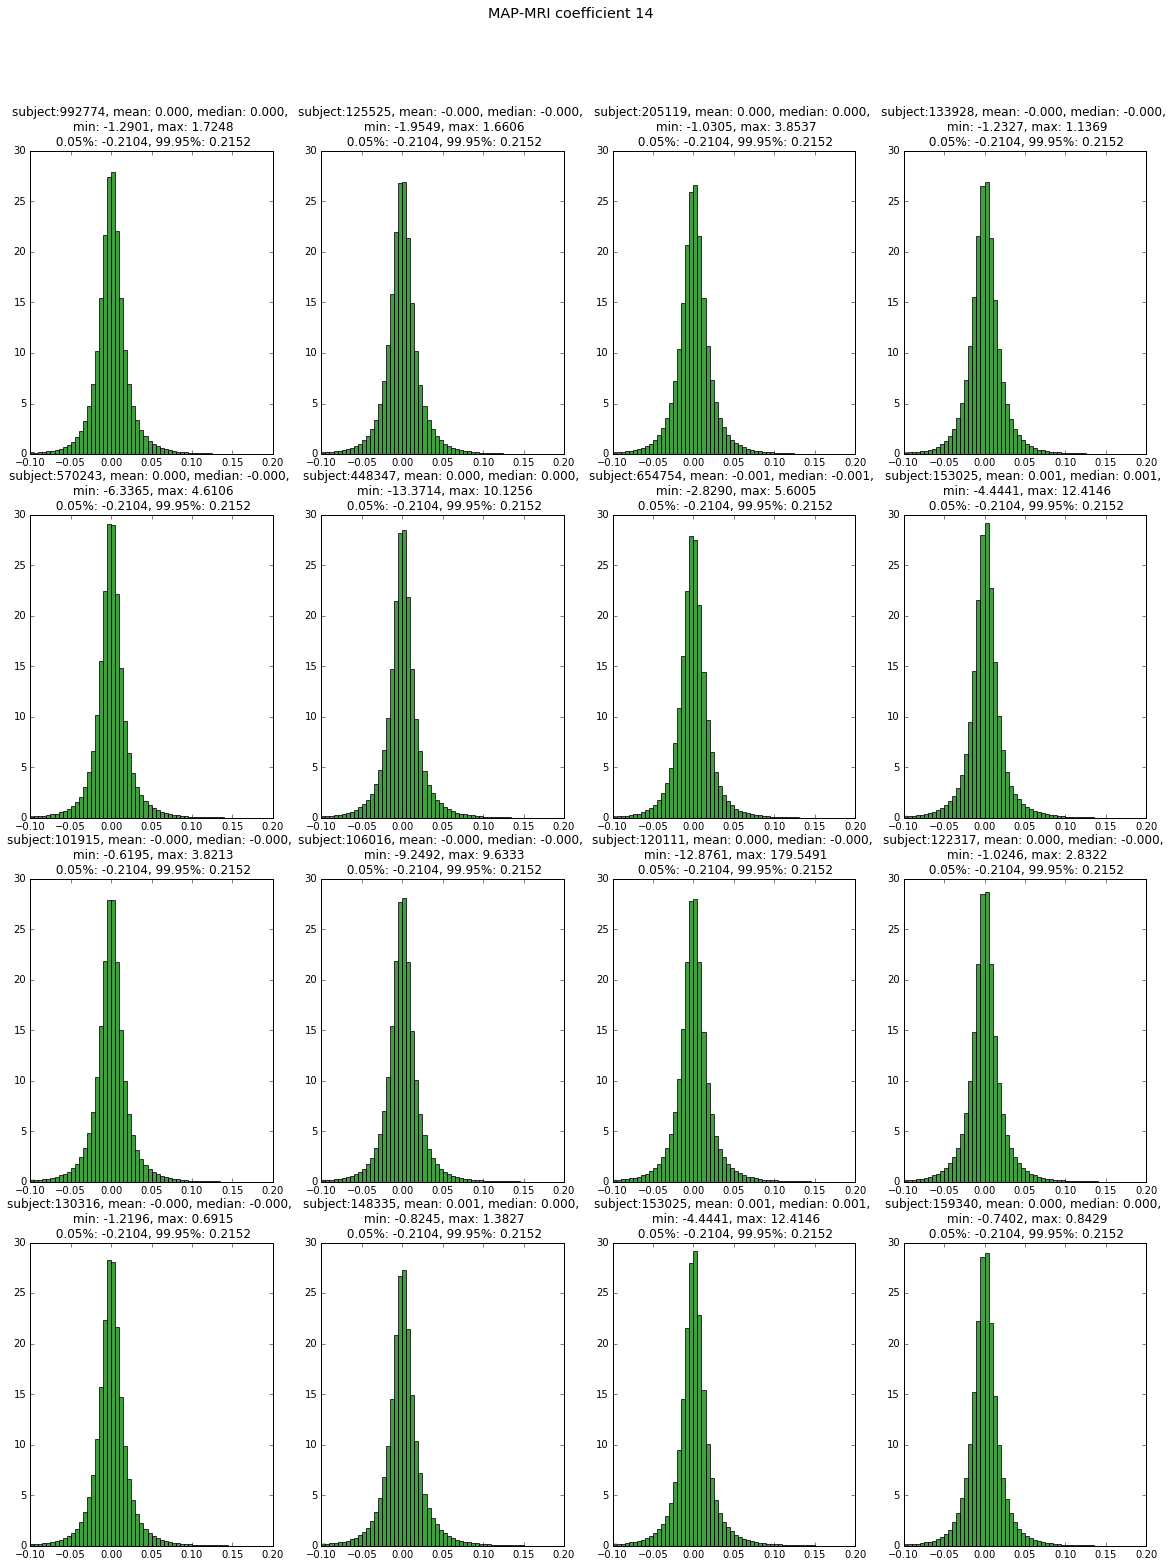

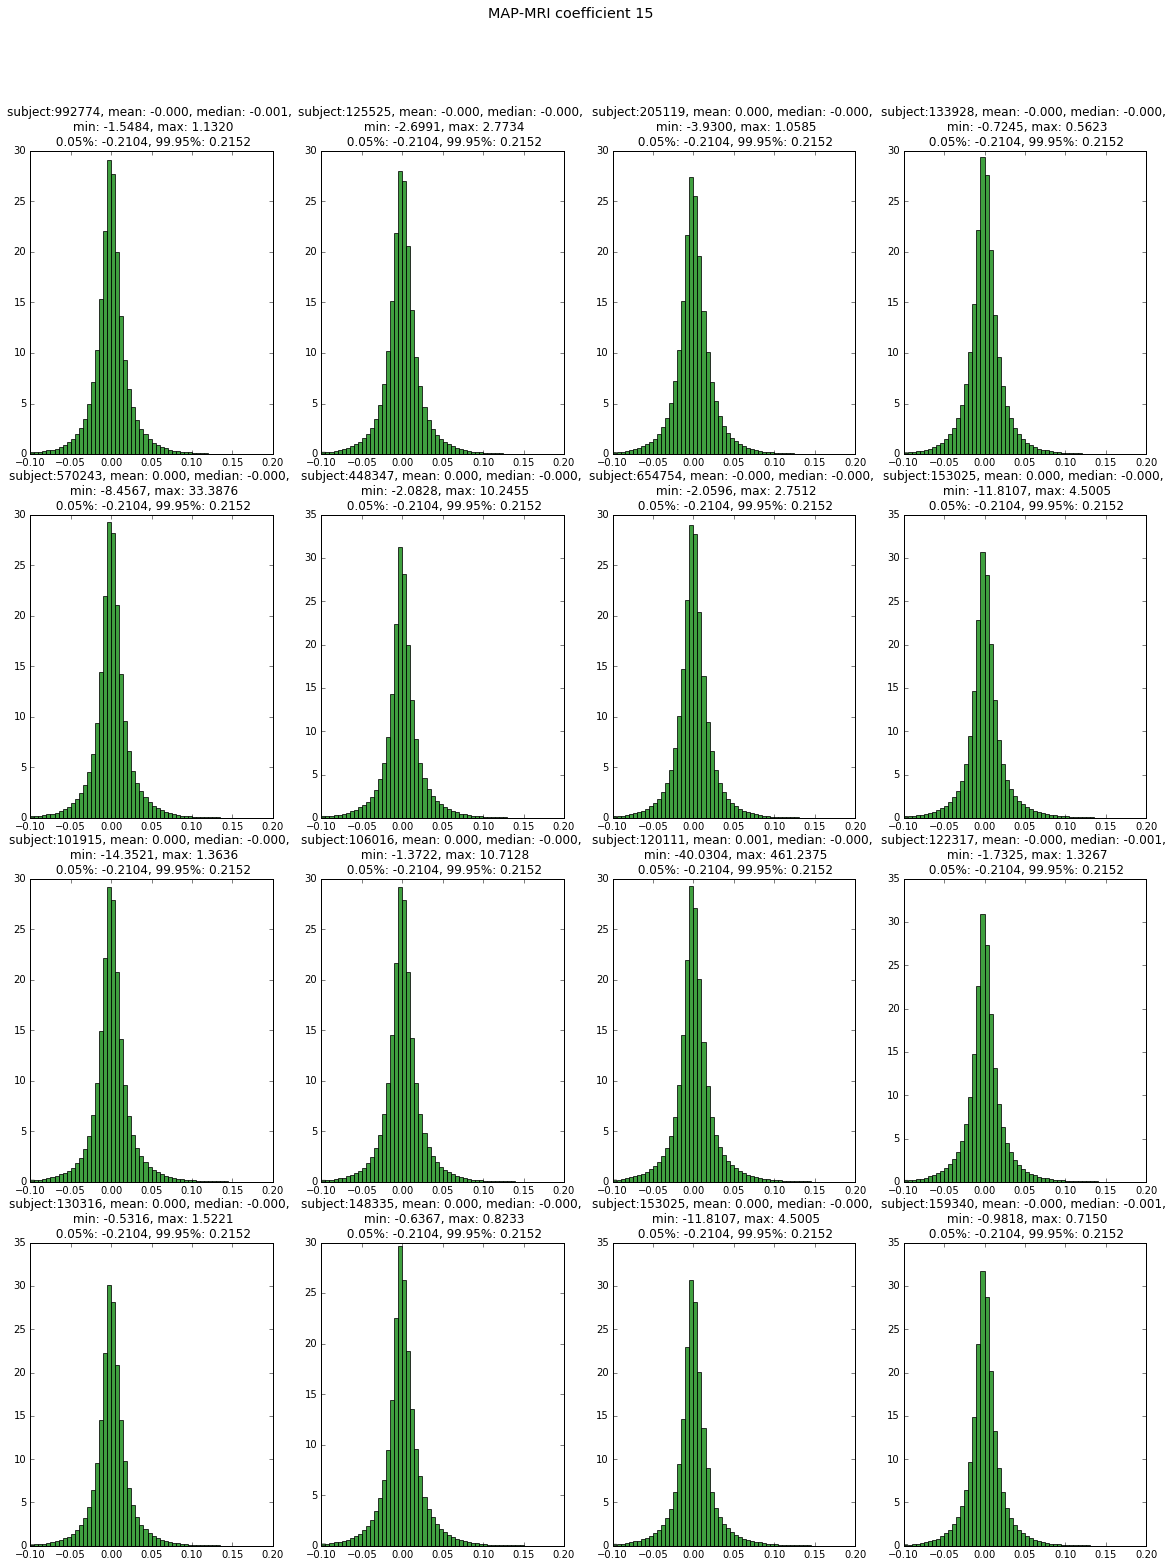

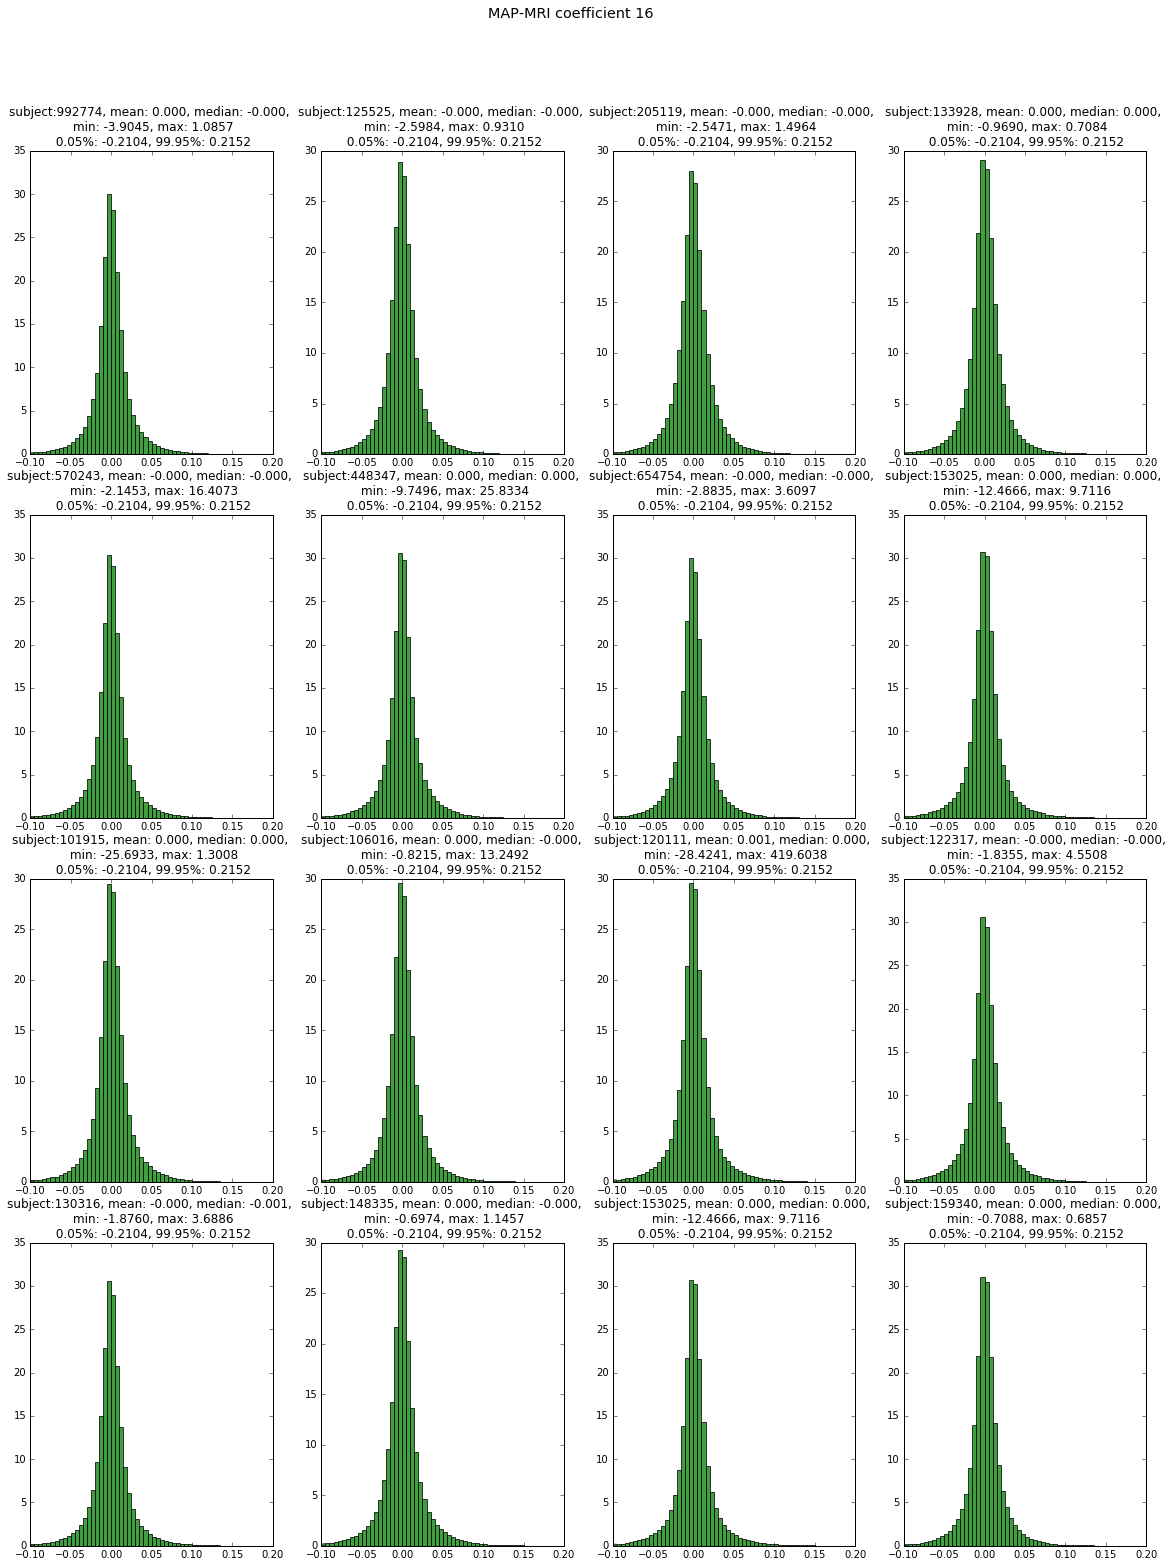

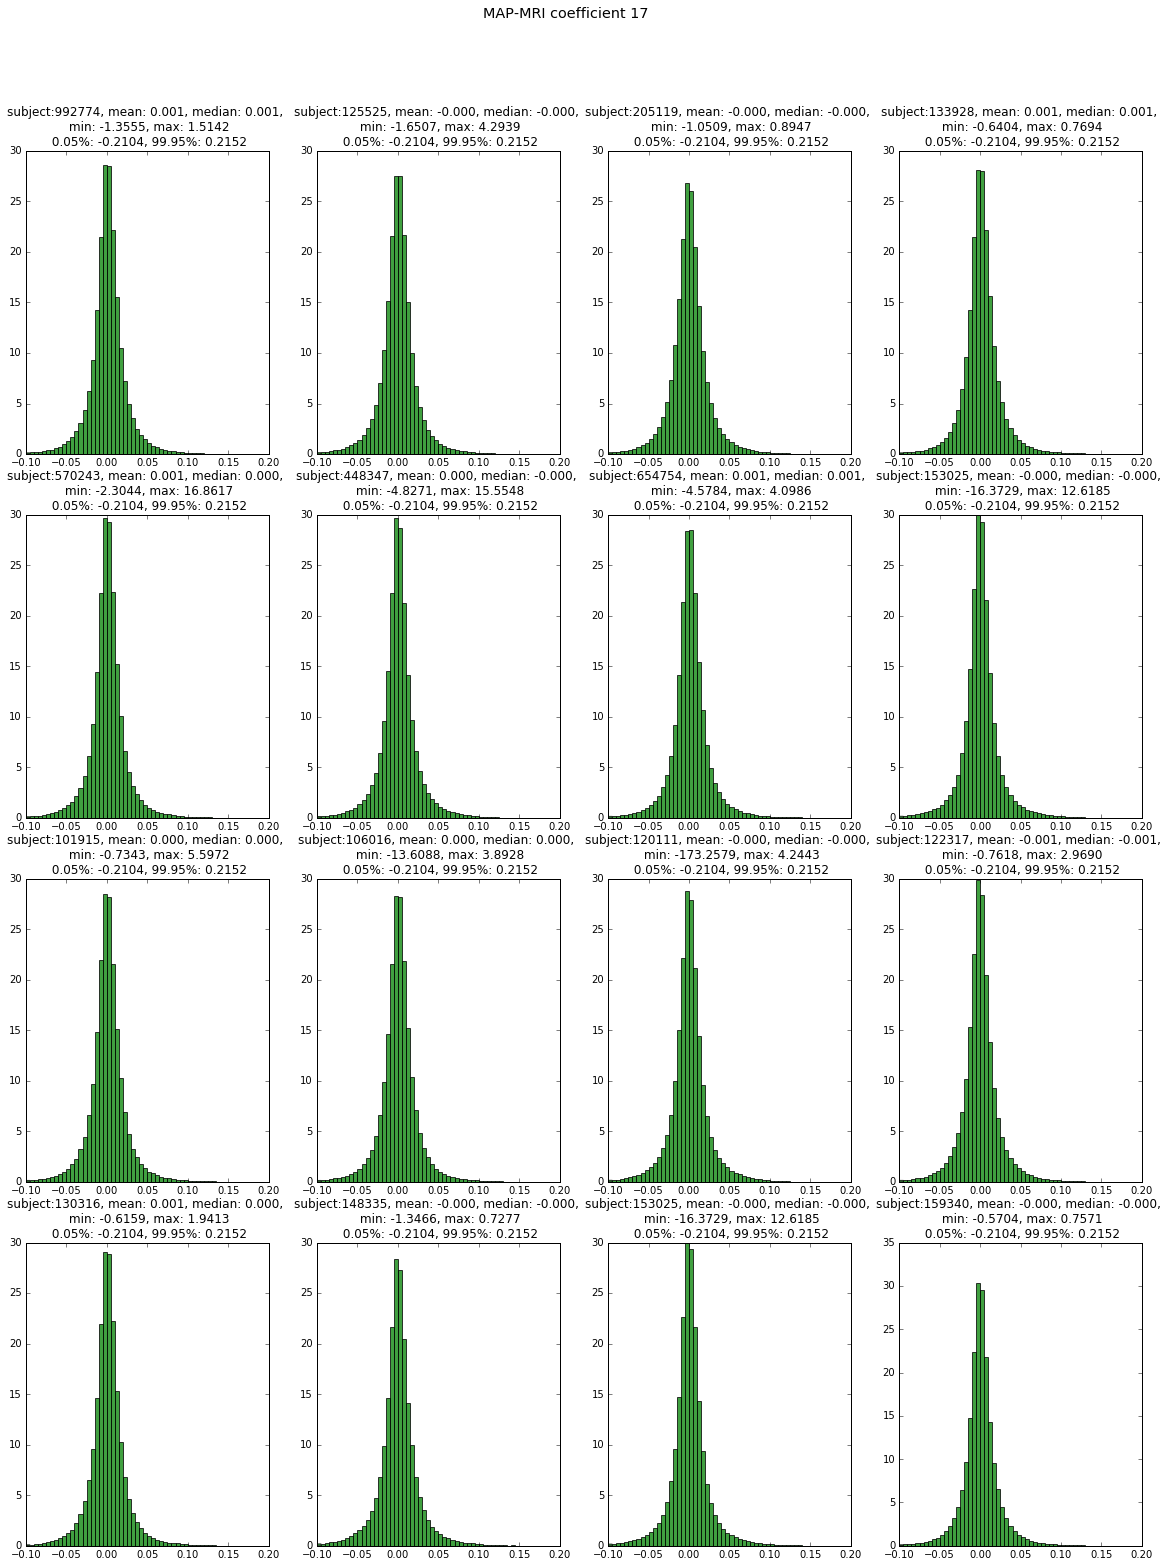

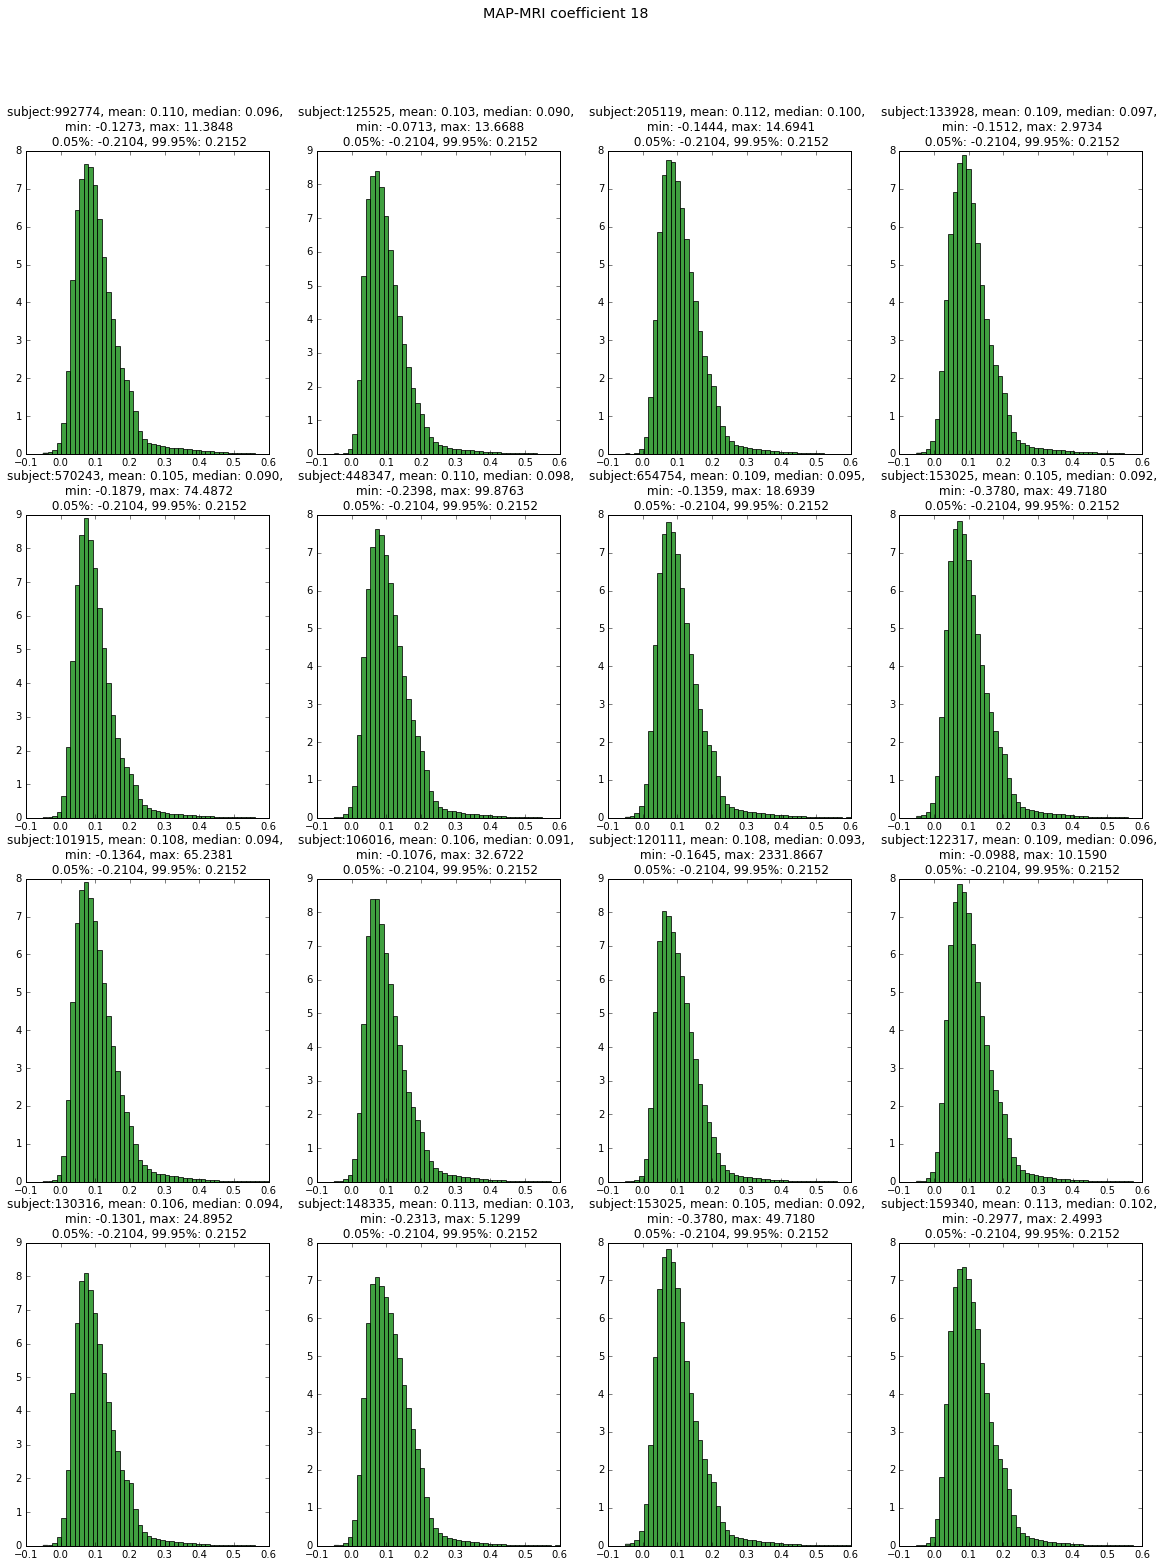

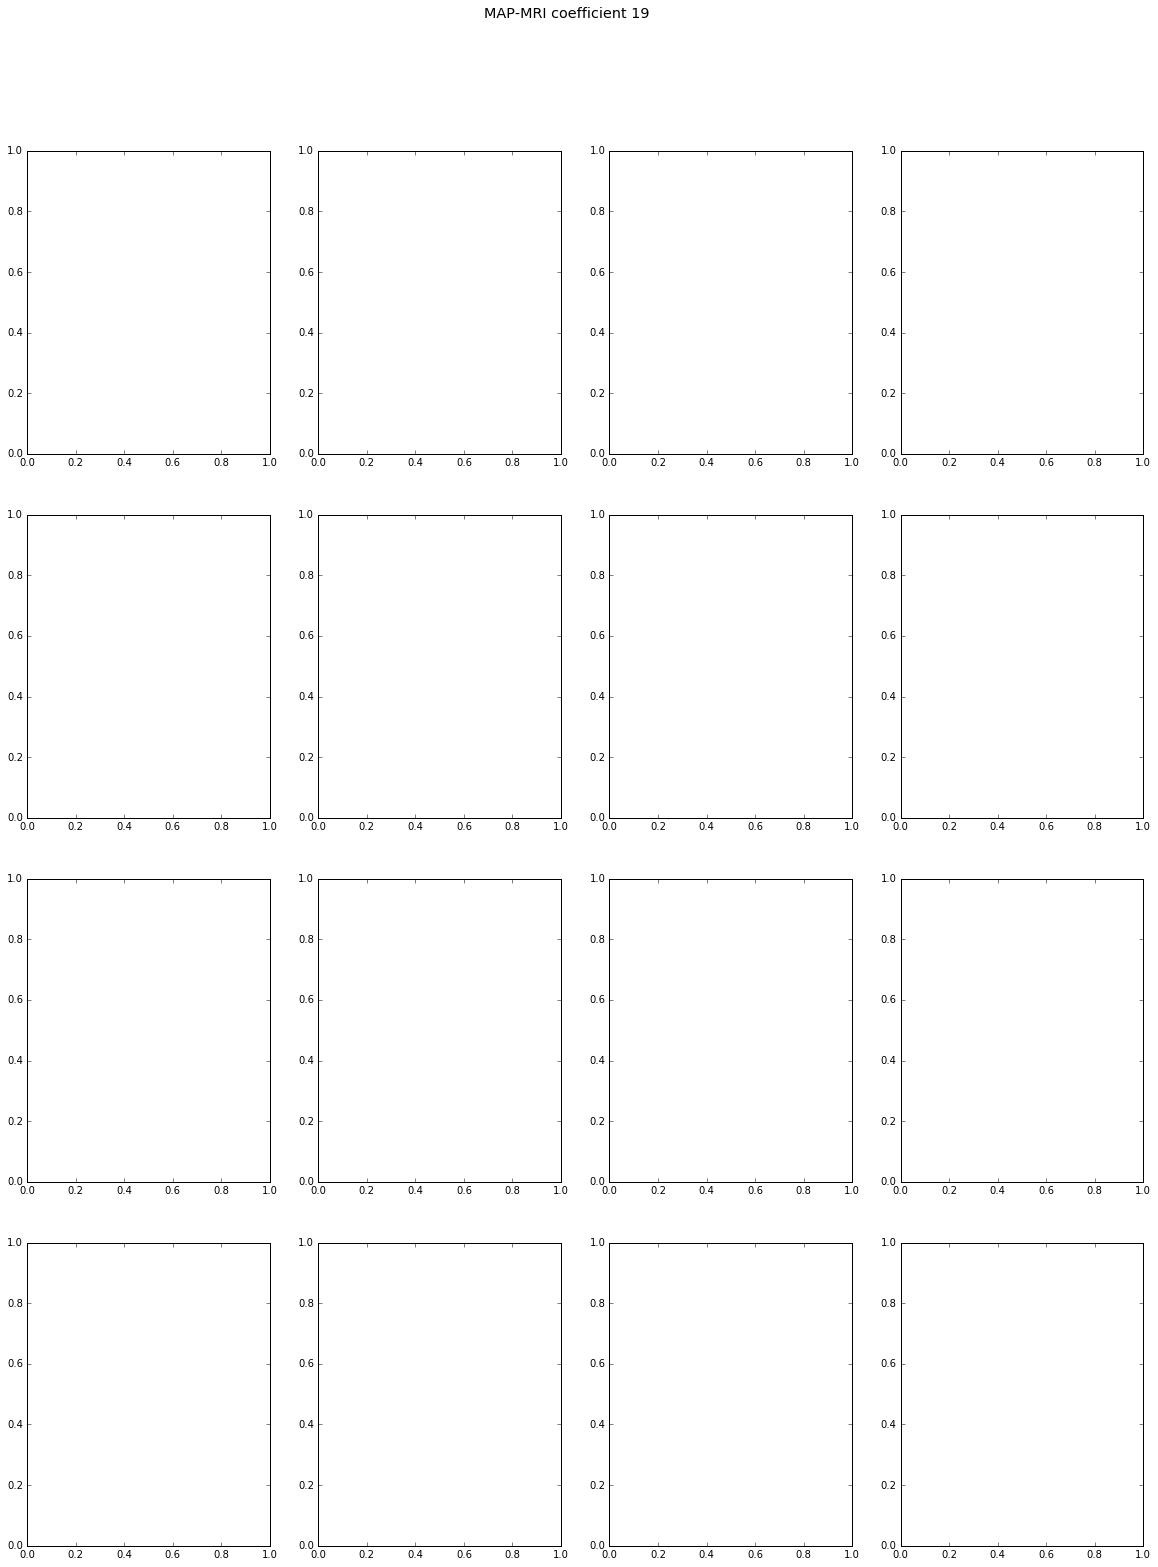

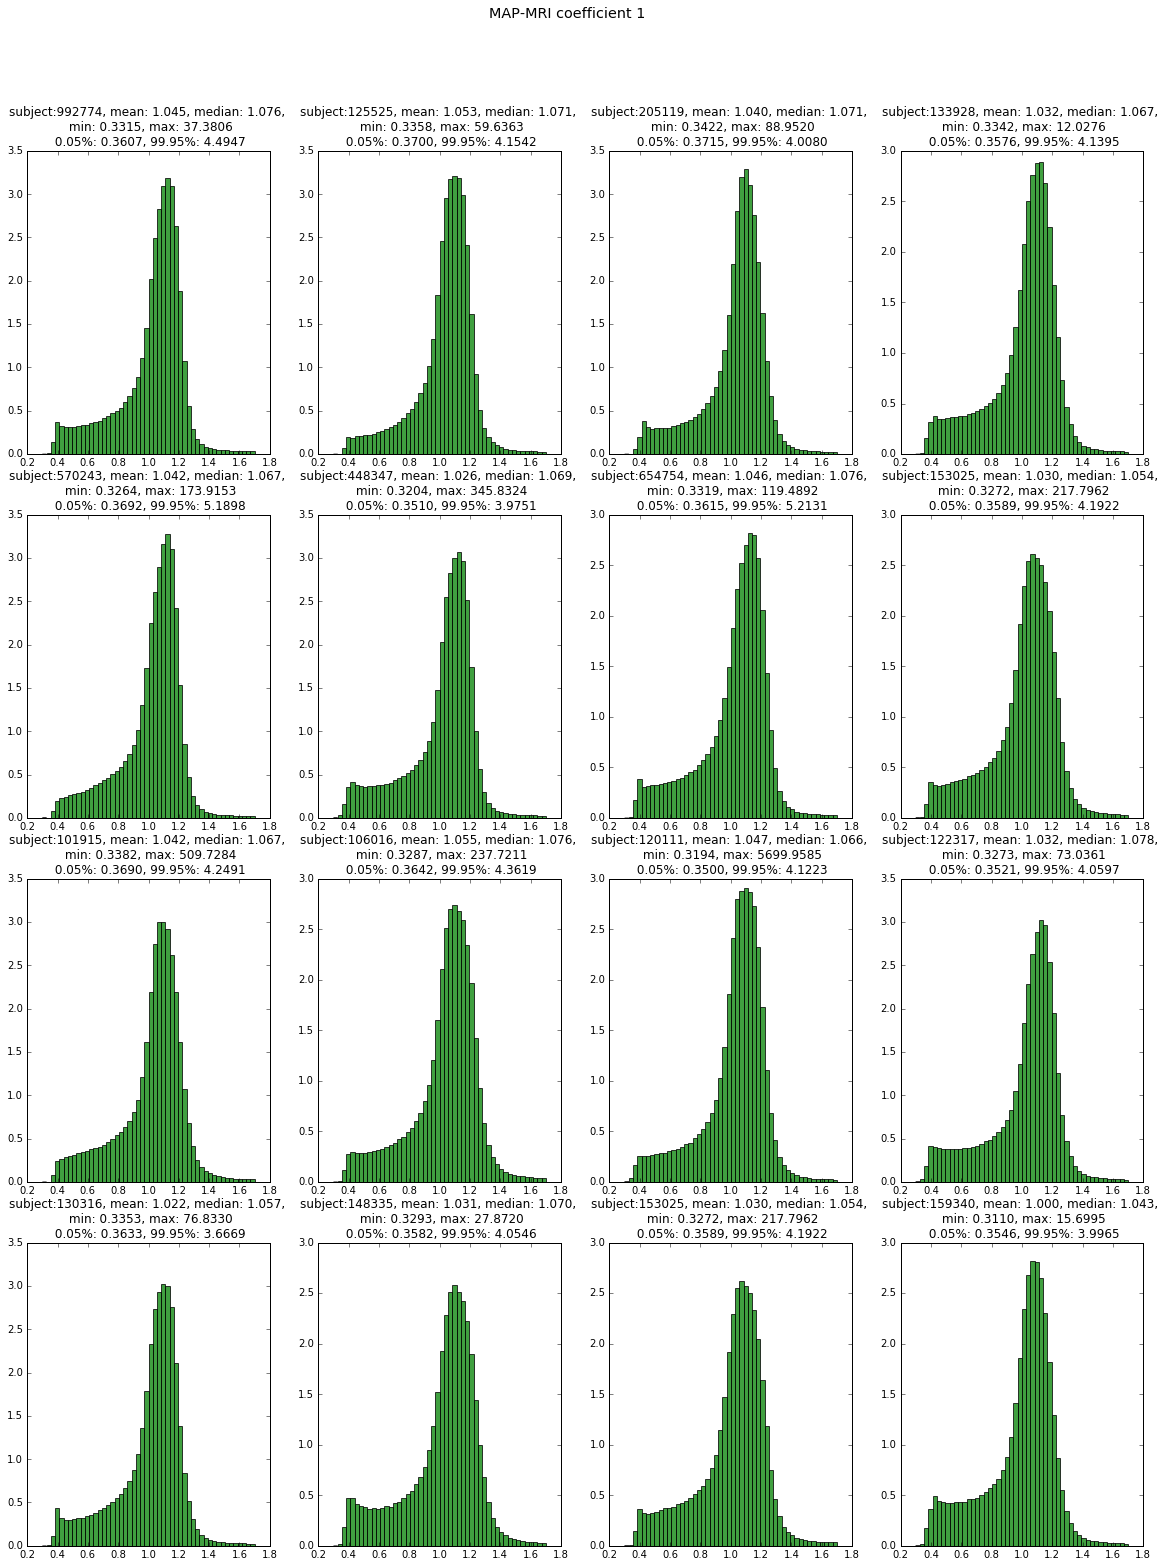

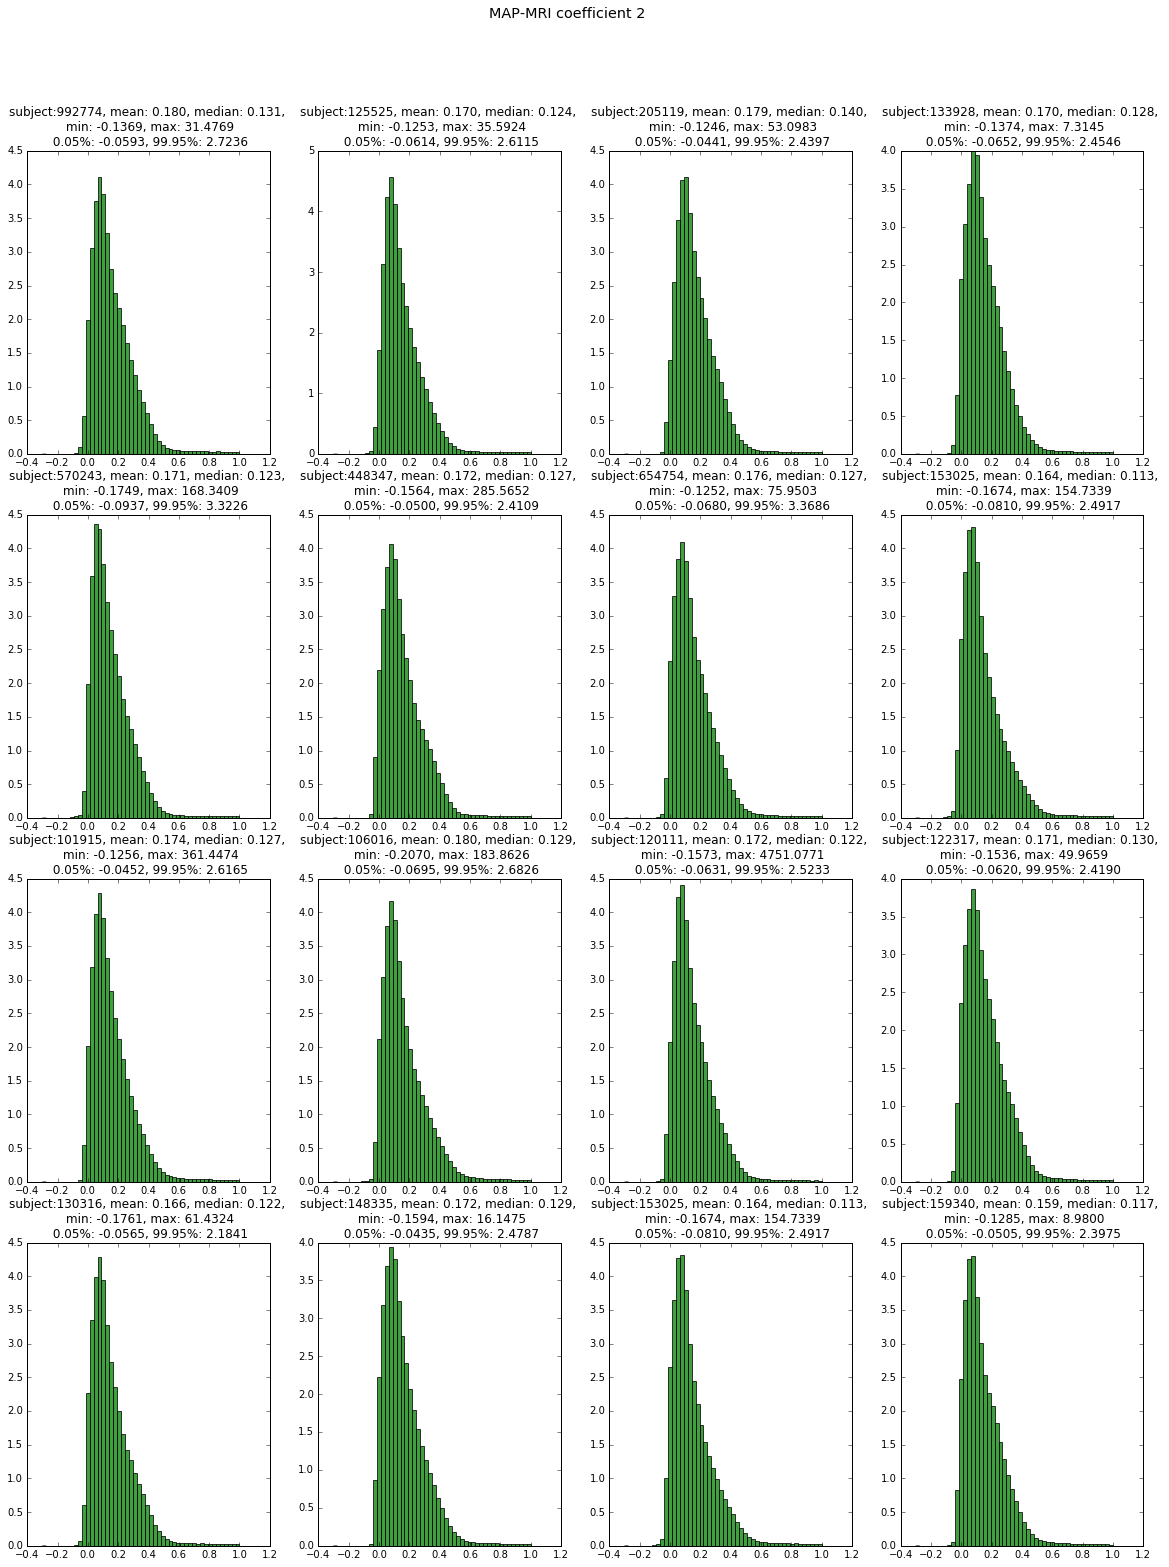

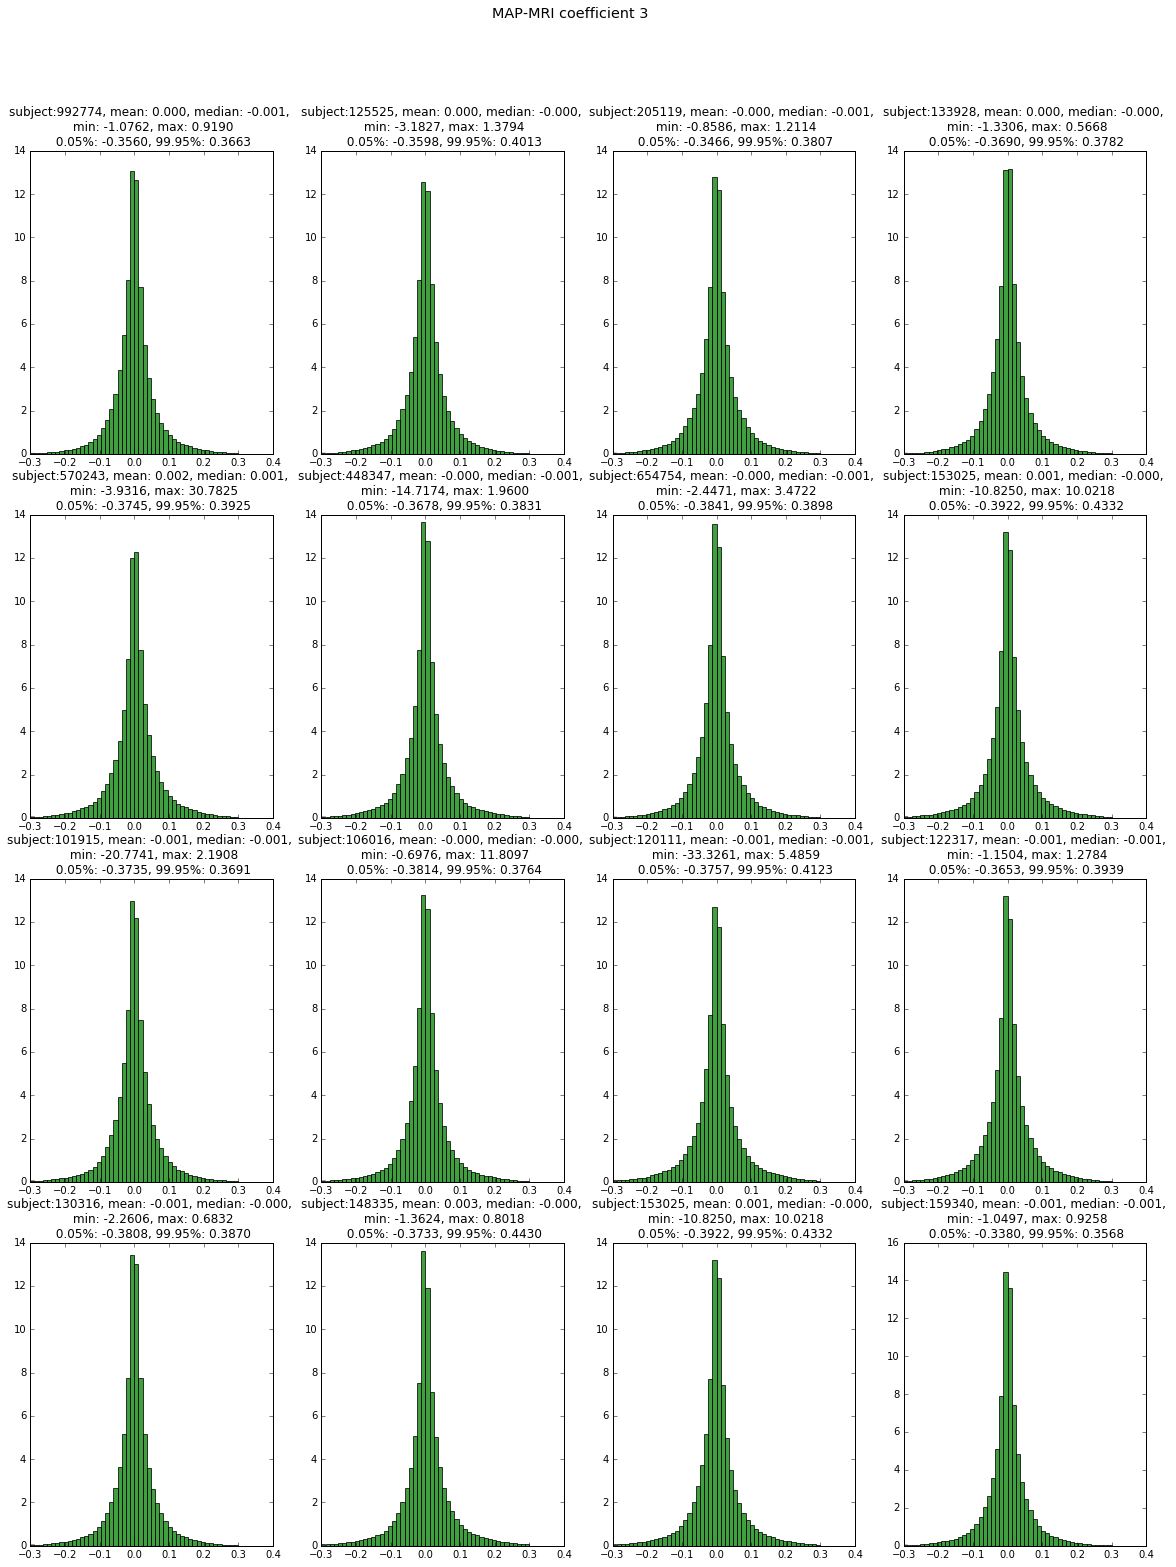

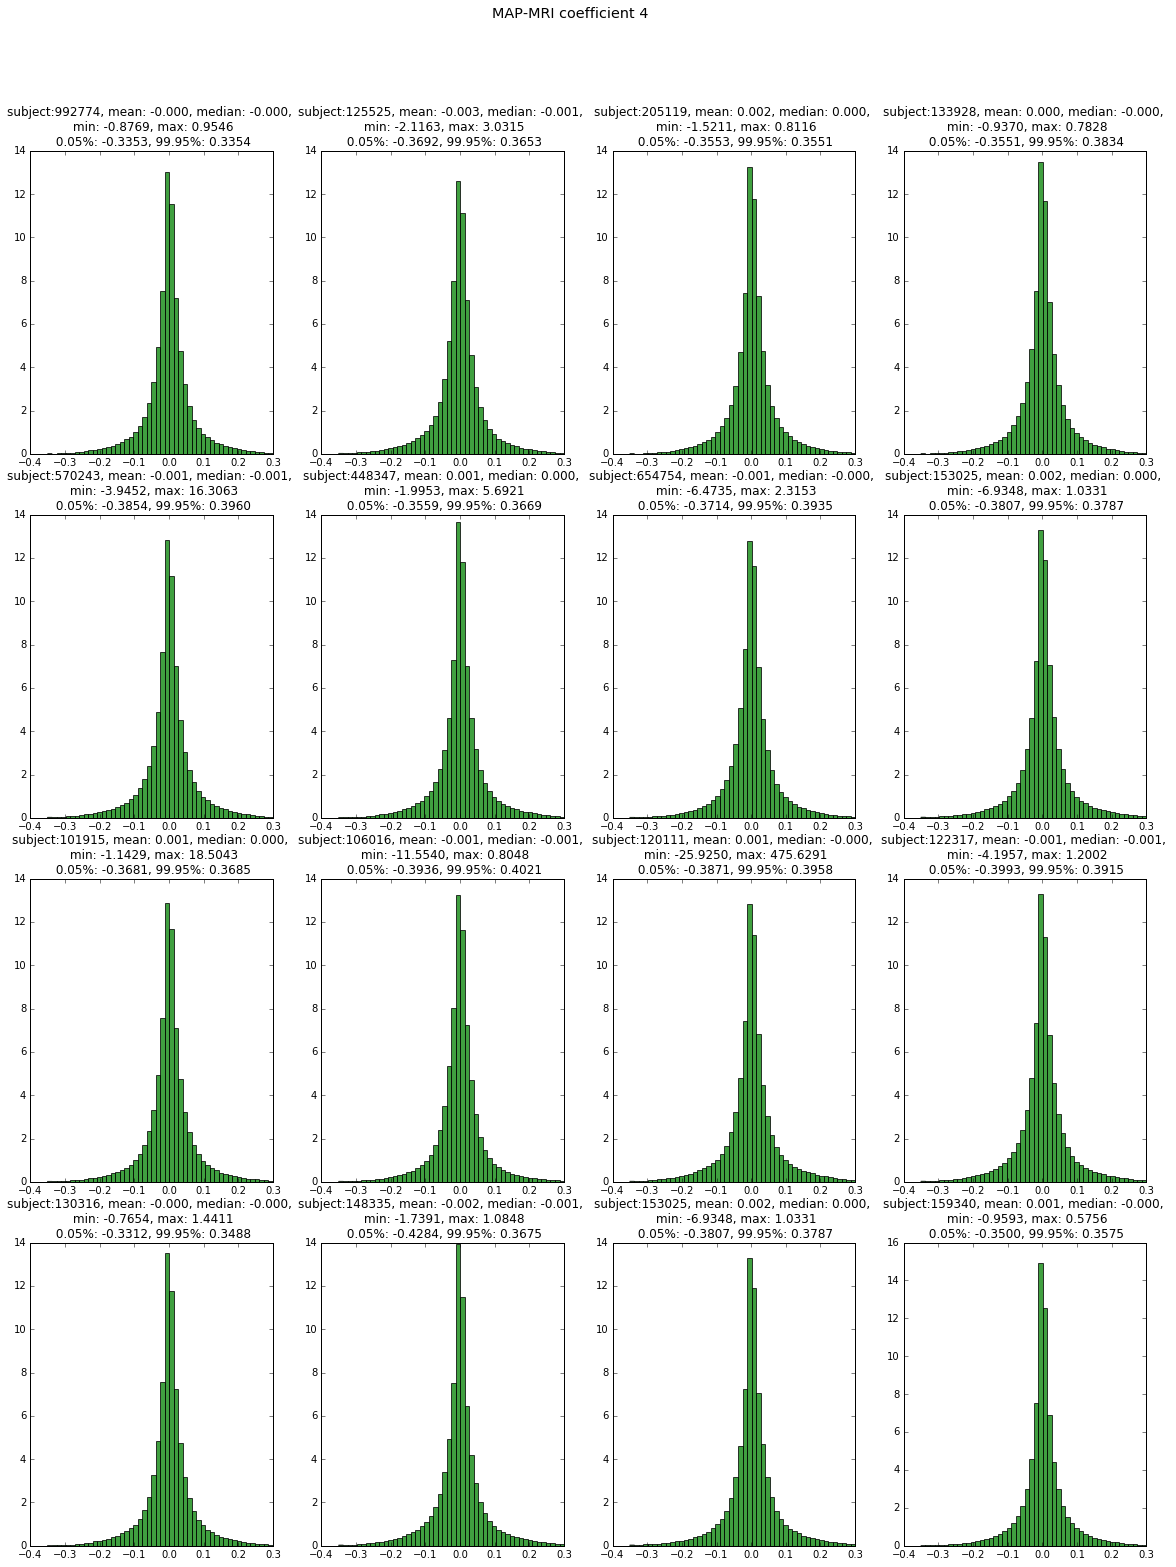

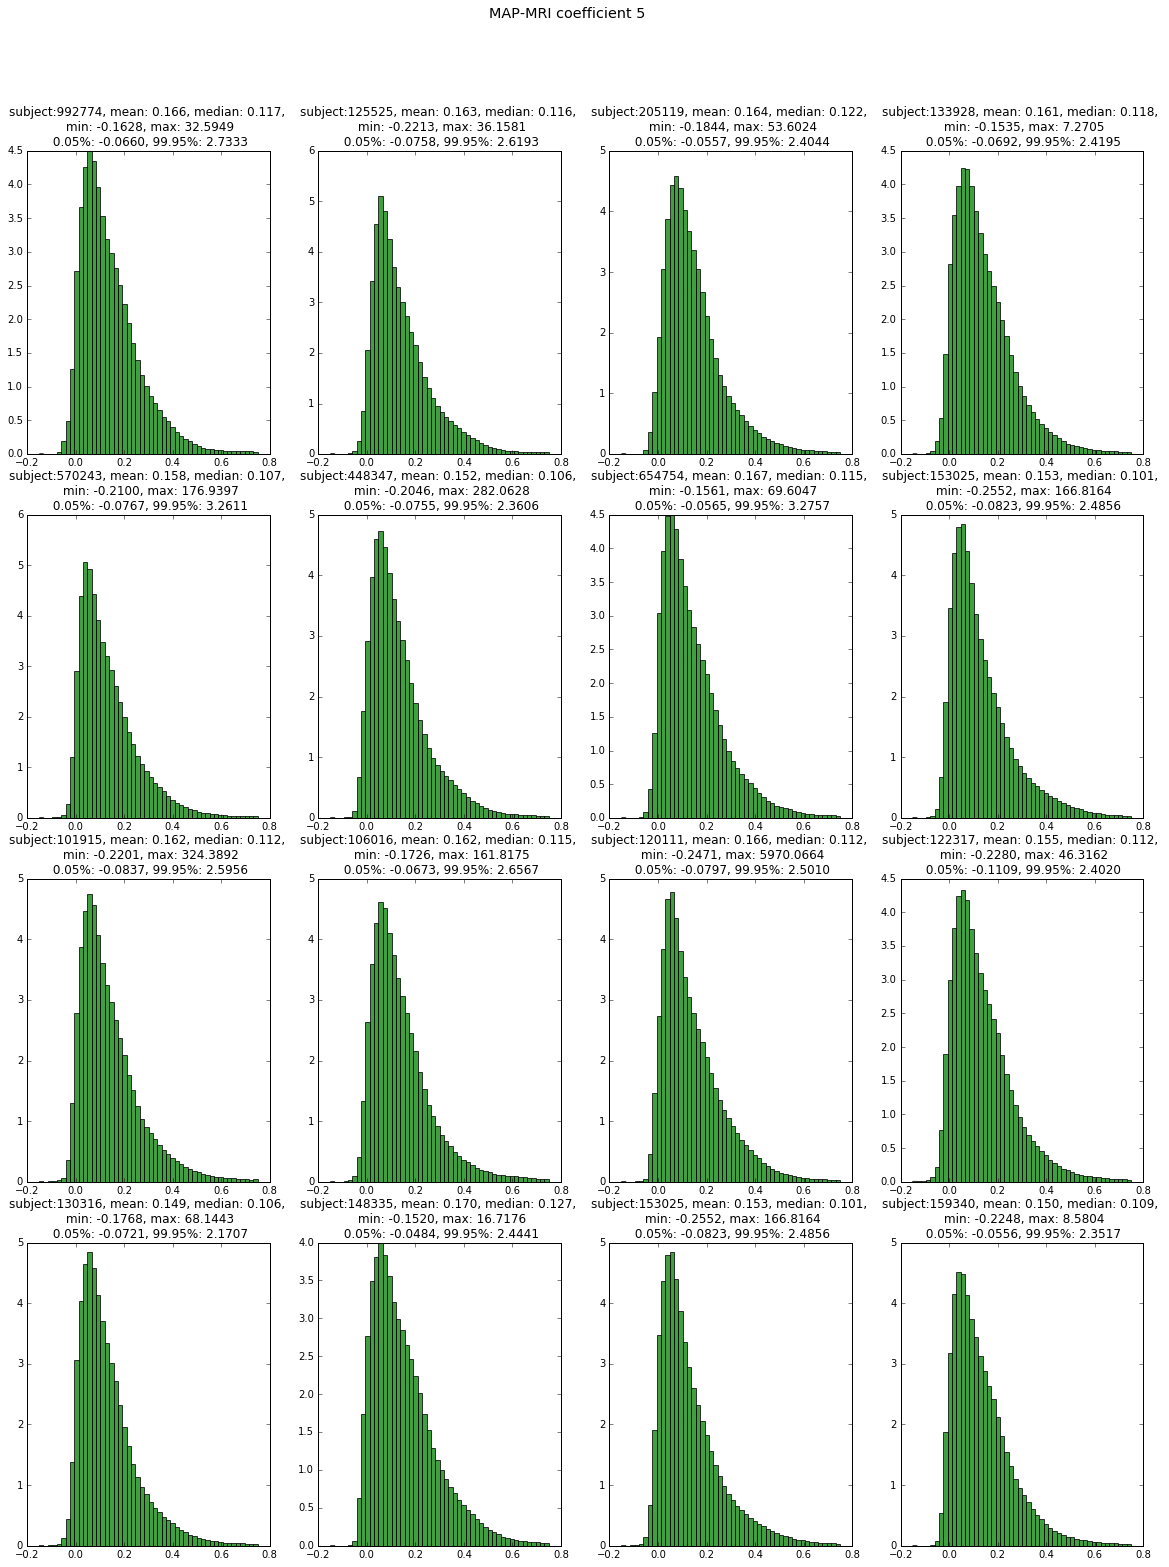

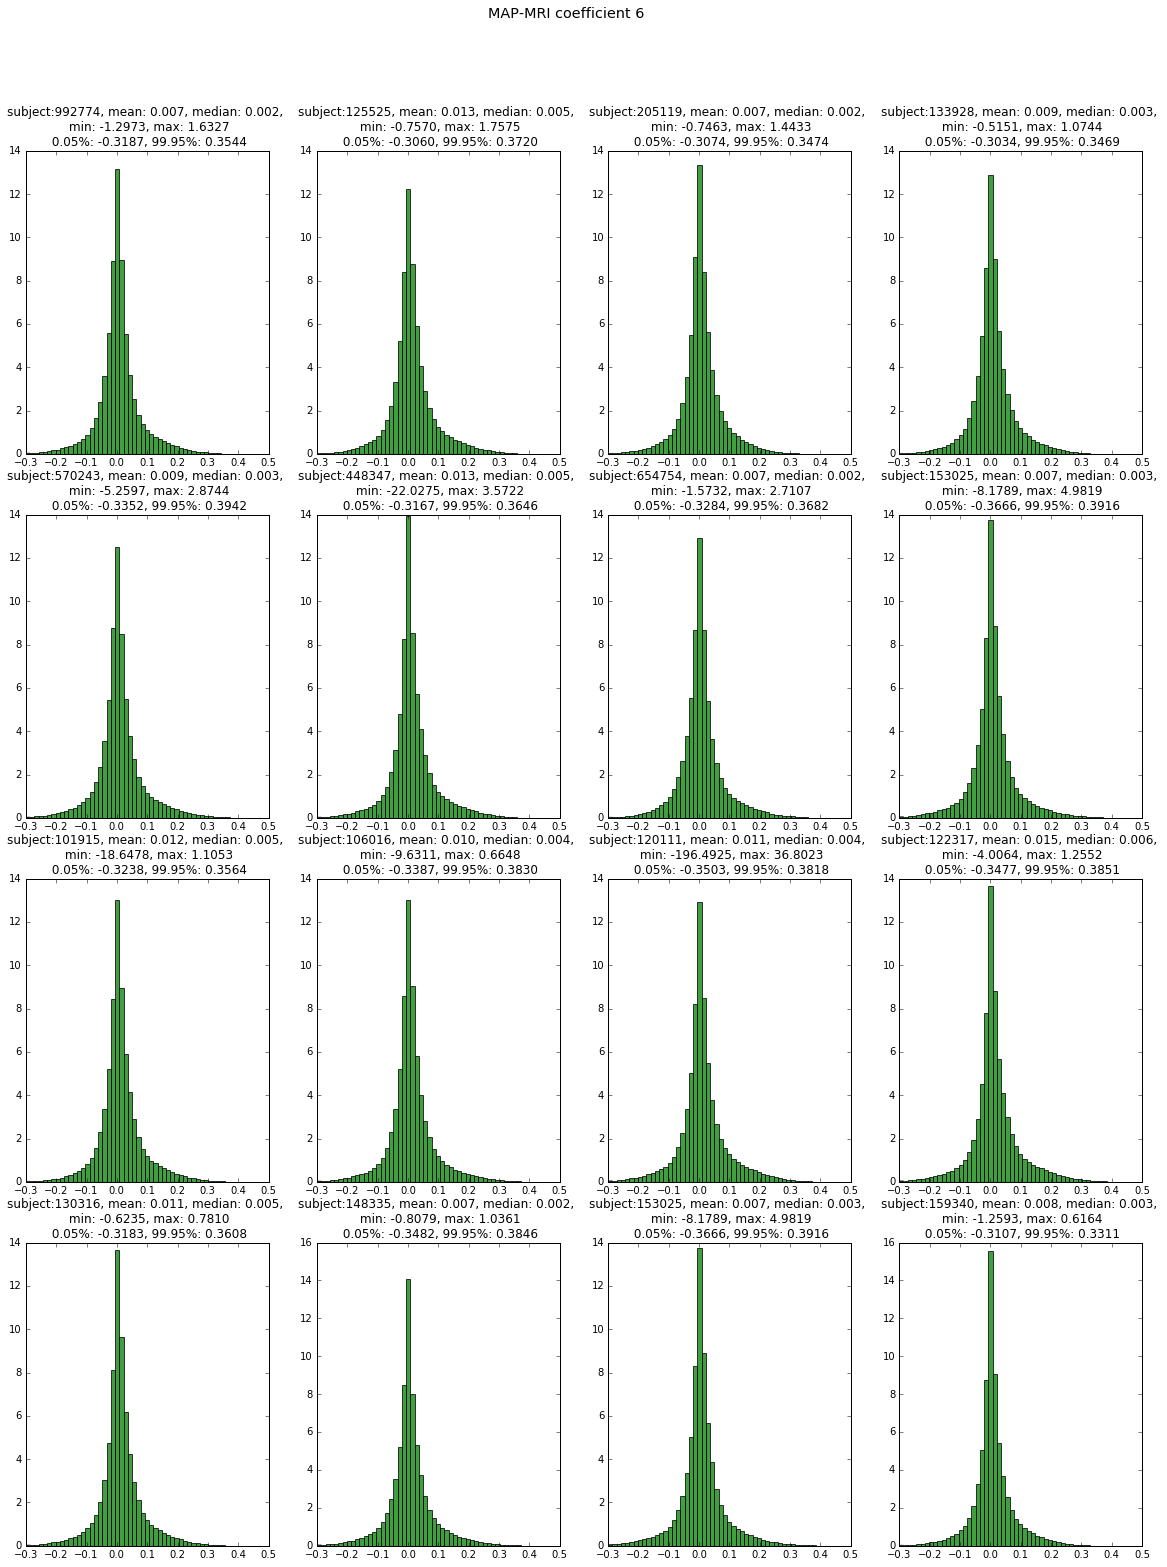

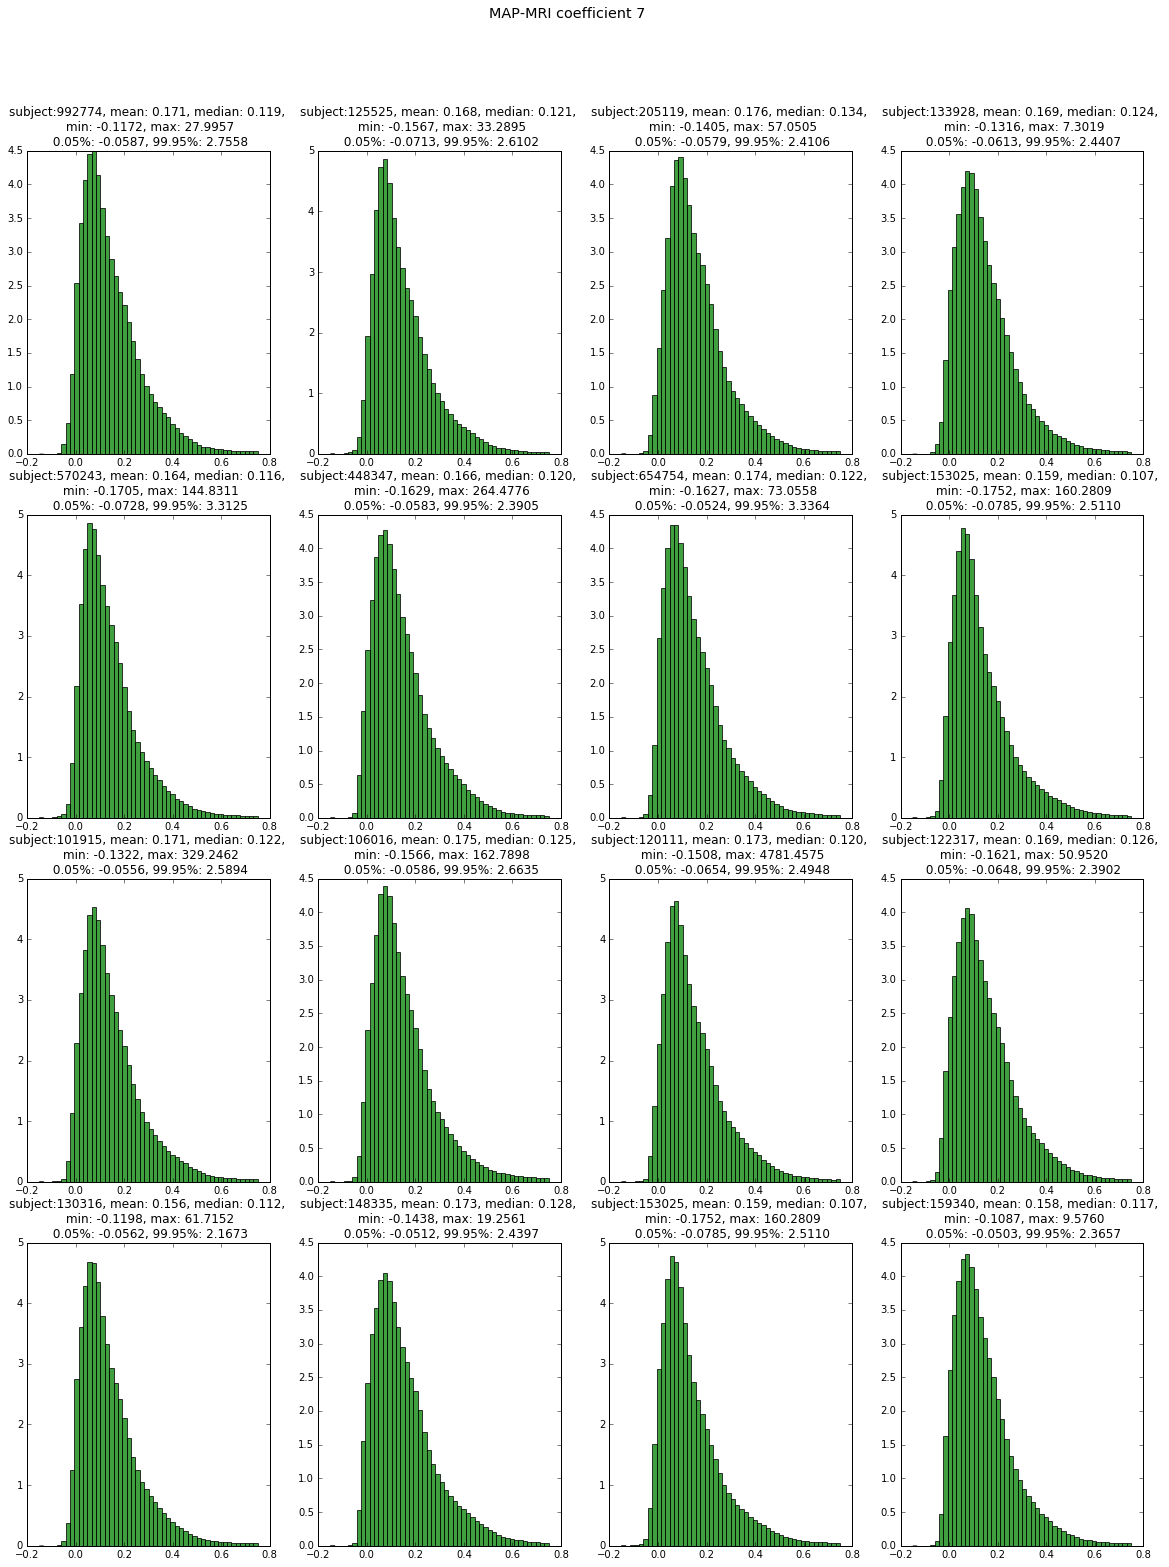

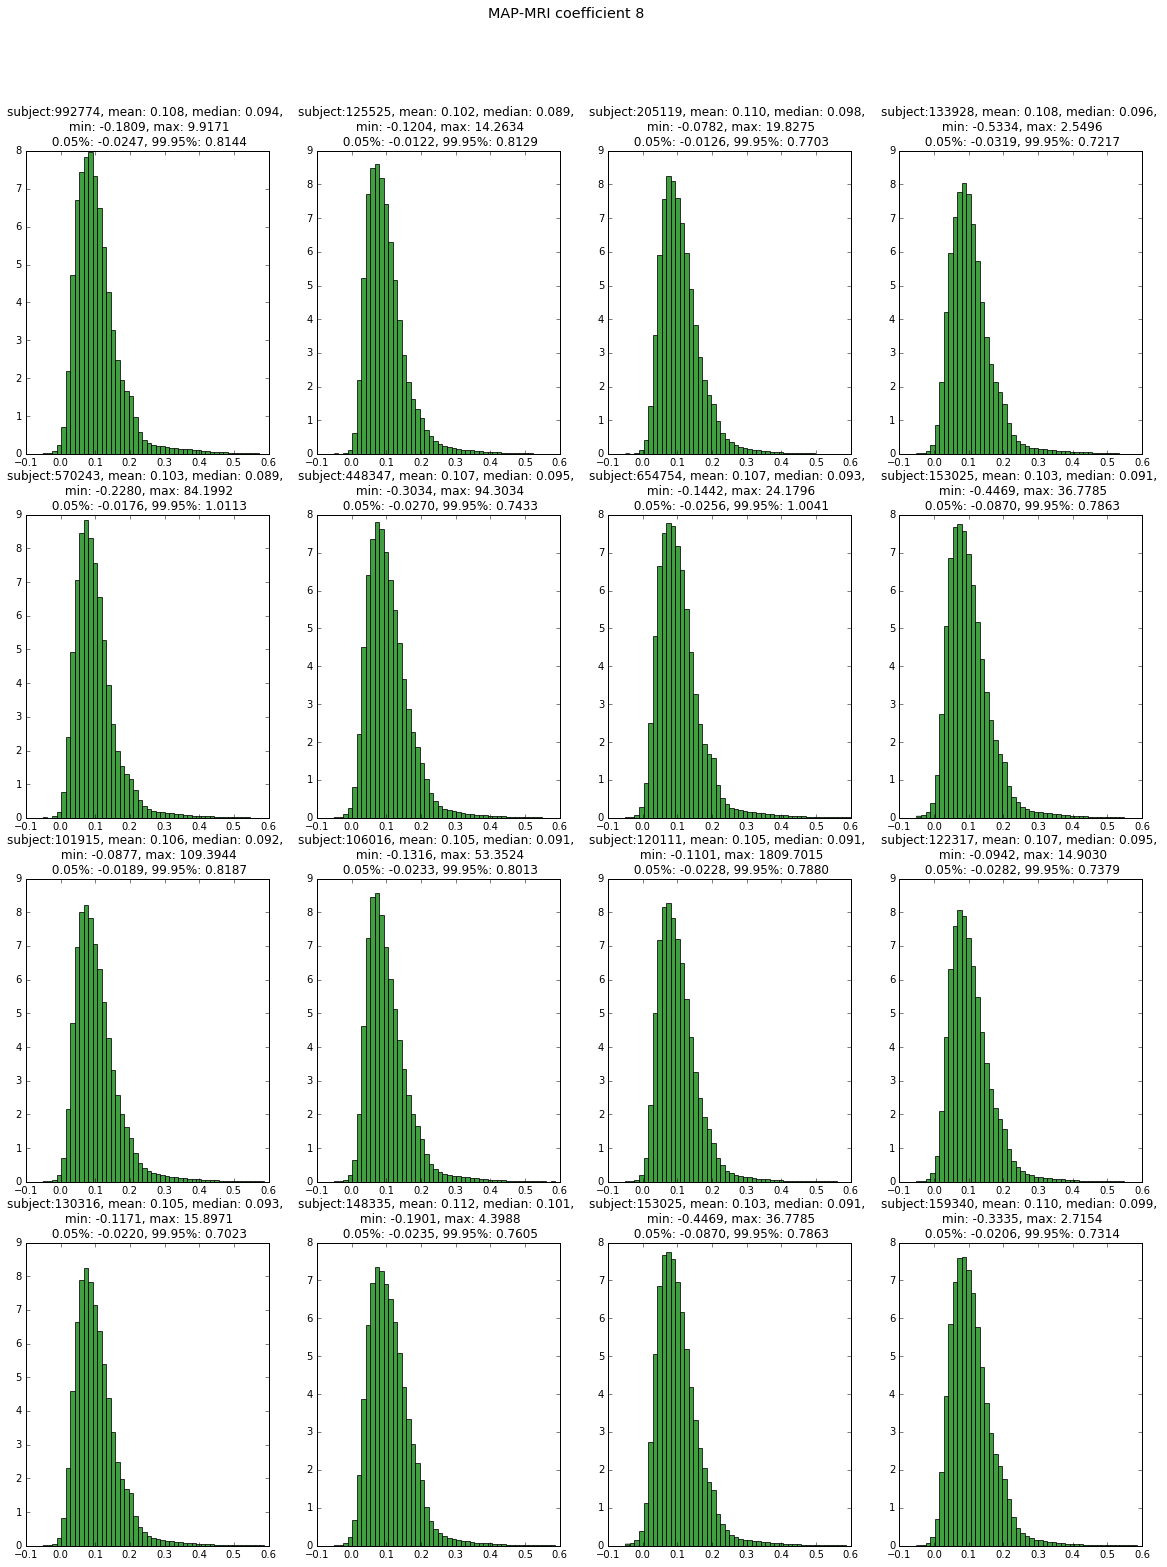

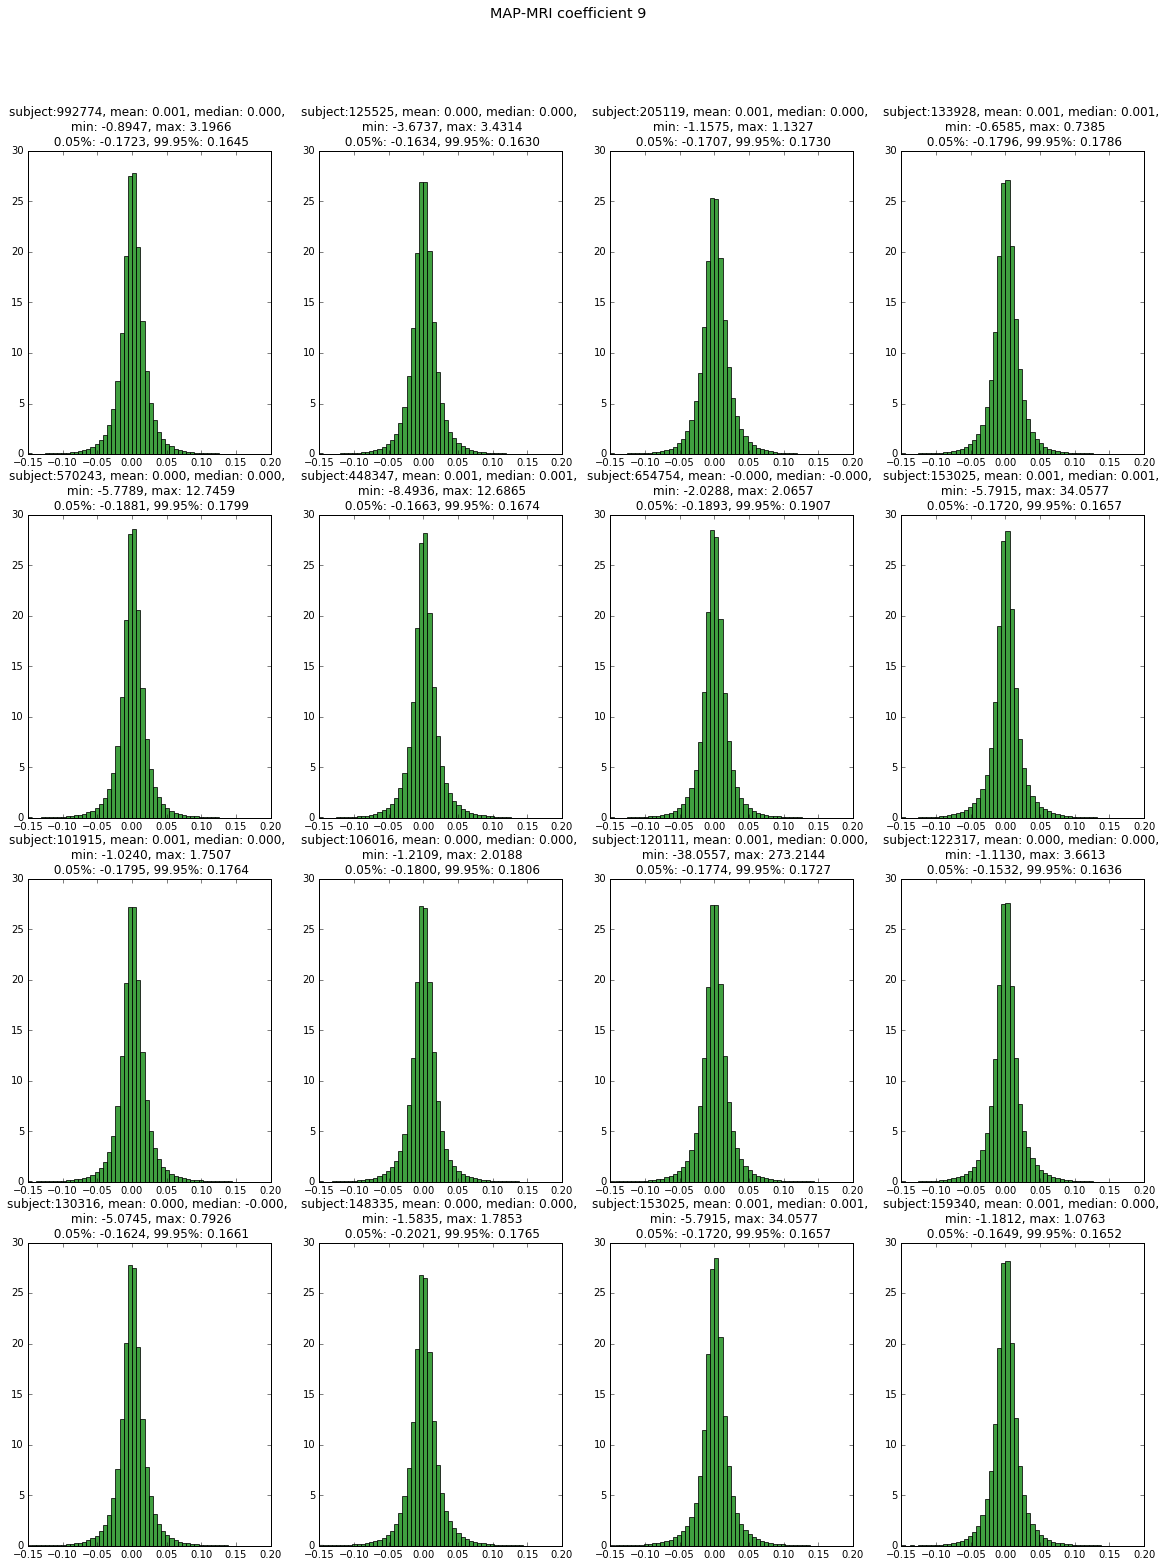

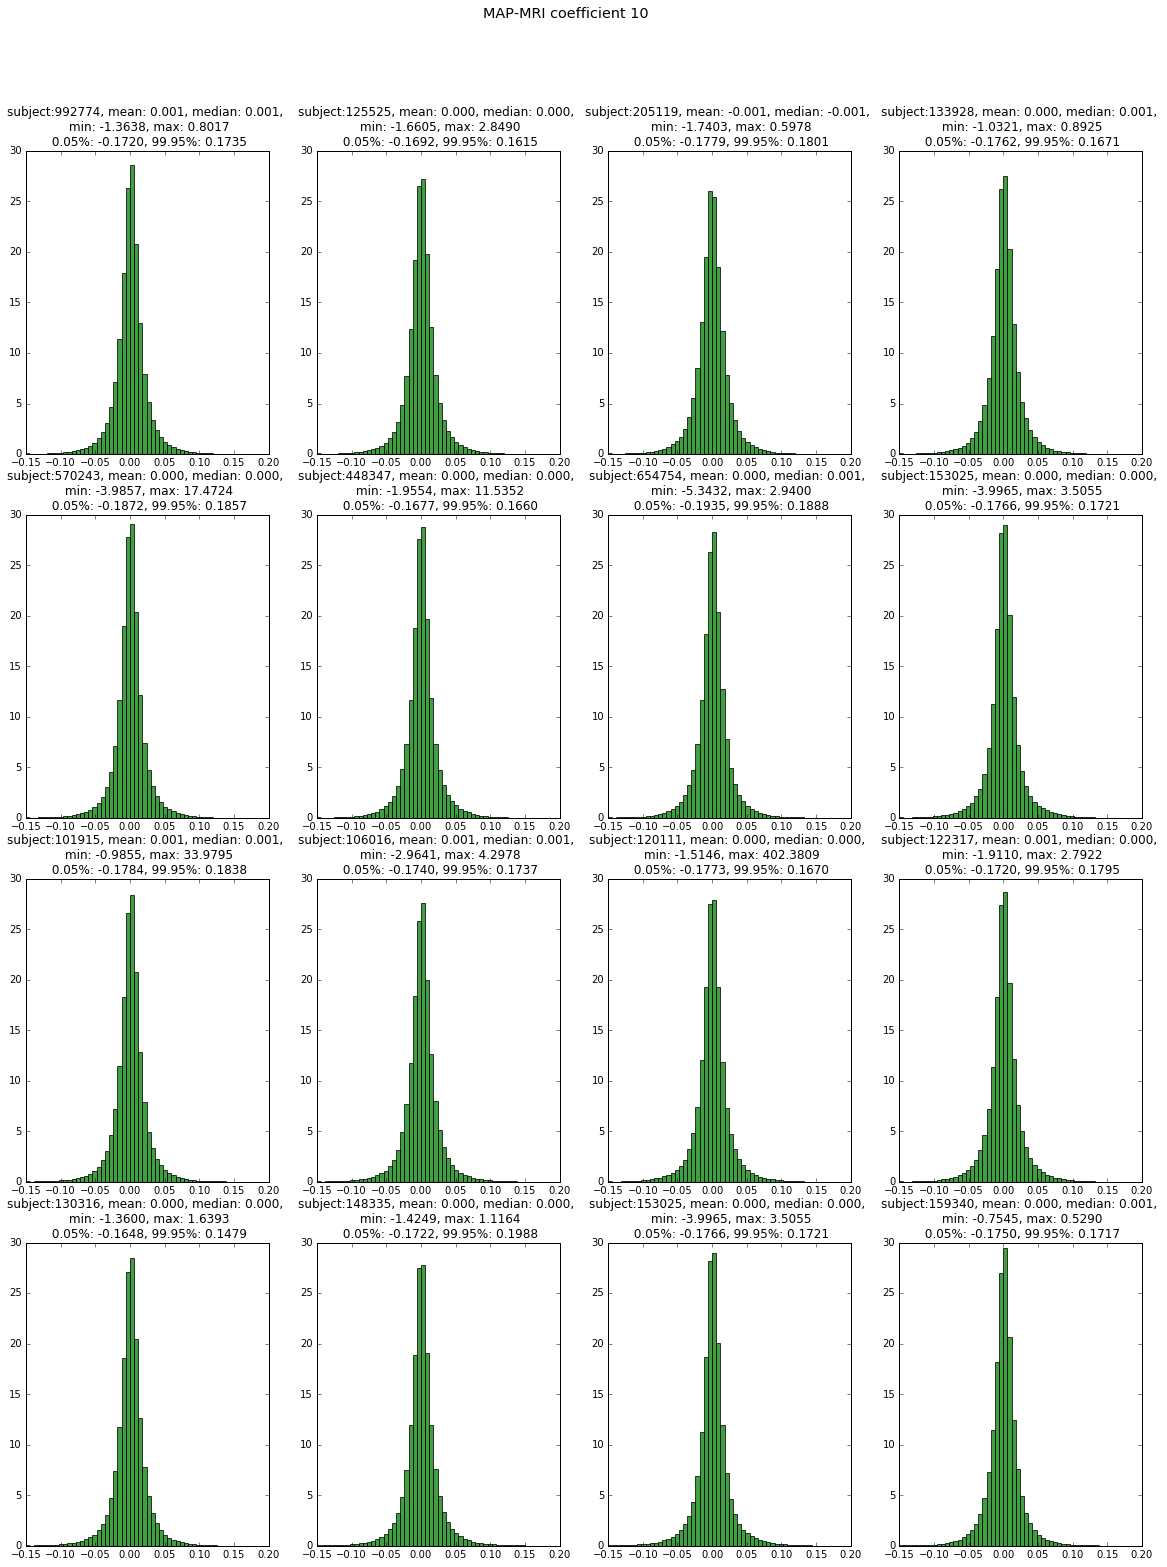

KeyboardInterrupt: 

In [167]:
# Visualise the histograms of each ground truth MAP coefficient for different subjects:

# set-up
data_dir = "/Users/ryutarotanno/tmp/MAP/HCP_map_v2/"
subj_list = ['992774', '125525', '205119', '133928', '570243', '448347', '654754', '153025',
             '101915', '106016', '120111', '122317', '130316', '148335', '153025', '159340',
             '162733', '163129', '178950', '188347', '189450', '199655', '211720', '280739',
             '106319', '117122', '133827', '140824', '158540', '196750', '205826', '366446']
subpath="/T1w/Diffusion/"
no_channels=22
gt_header="h4_all_{:02d}.nii"
series=range(1,no_channels+3)
range_list=[(0.3,1.7),(-0.3,1.0),(-0.3, 0.3),(-0.35, 0.3),(-0.15, 0.75),(-0.3, 0.4),(-0.15, 0.75),(-0.05, 0.6),
            (-0.15, 0.15),(-0.15,0.15),(-0.05, 0.6),(-0.15,0.1),(-0.05, 0.6),(-0.1,0.15),(-0.1,0.15),(-0.1,0.15),
            (-0.1,0.15),(-0.05, 0.6),(-0.15, 0.15),(-0.05, 0.6),(-0.15, 0.15),(-0.05, 0.6)]

# parameters:
for ch_idx in range(2,24):
#     ch_idx=5  # channel index at least 2 and at most 23
    num_subjects=16
    ncols=4
    nrows=num_subjects/ncols
    width = 20
    height = 25

    fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(width,height))
    fig.suptitle("MAP-MRI coefficient {}".format(ch_idx-1), fontsize="x-large")

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            idx=i*ncols+j
            img,_=load_series_nii(data_dir+subj_list[idx]+subpath+gt_header, series, dtype='float32', is_print=False)
            brain_mask = img[...,0]==0
            v_ch=img[...,ch_idx]
            mean=np.mean(v_ch[brain_mask])
            median=np.median(v_ch[brain_mask])
            minim =np.min(v_ch[brain_mask]) 
            maxim =np.max(v_ch[brain_mask]) 
            perc_005= np.percentile(v_ch[brain_mask],0.05)
            perc_9995= np.percentile(v_ch[brain_mask],99.95)

            n, bins, patches = col.hist(v_ch[brain_mask], bins=50, range=range_list[ch_idx-2],normed=1, facecolor='g', alpha=0.75)
            #n, bins, patches = col.hist(v_ch[brain_mask], bins=50, normed=1, facecolor='g', alpha=0.75)
            #col.set_xlabel('range of values')
            #col.set_ylabel('mass')
            col.set_title("subject:{}, mean: {:4.3f}, median: {:4.3f}, \n min: {:5.4f}, max: {:5.4f}\n 0.05%: {:5.4f}, 99.95%: {:5.4f}"
                          .format(subj_list[idx],mean,median,minim,maxim,perc_005,perc_9995))
    
    save_dir="/Users/ryutarotanno/tmp/MAP/figs/"
    fig.savefig(save_dir+"h4_all_{:02d}.png".format(ch_idx-1))
    print("Saving h4_all_{:02d}.png".format(ch_idx-1))

ERROR! Session/line number was not unique in database. History logging moved to new session 821
('Converting to:', 'float32')


/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: ``get_header`` is deprecated.
Please use the ``img.header`` property instead


('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
Saving h4_all_01.png
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
('Converting to:', 'float32')
Saving h4_all_02.png
('Converting to:', 'float32'

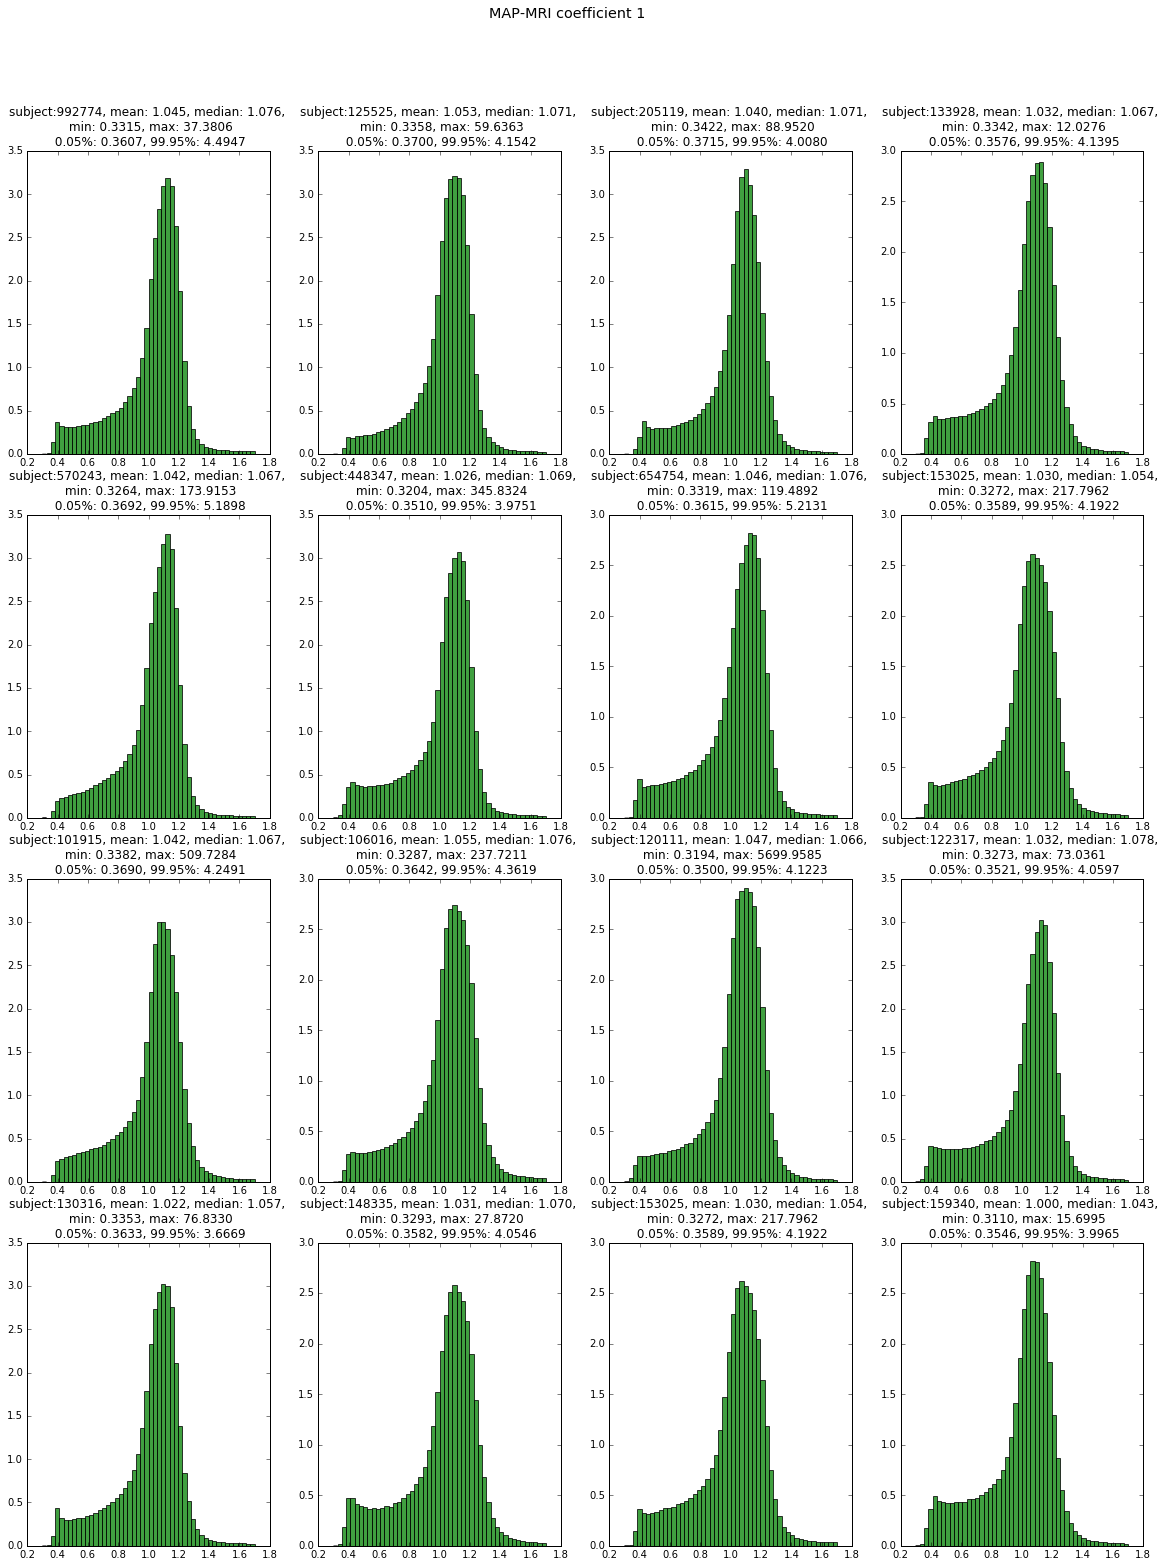

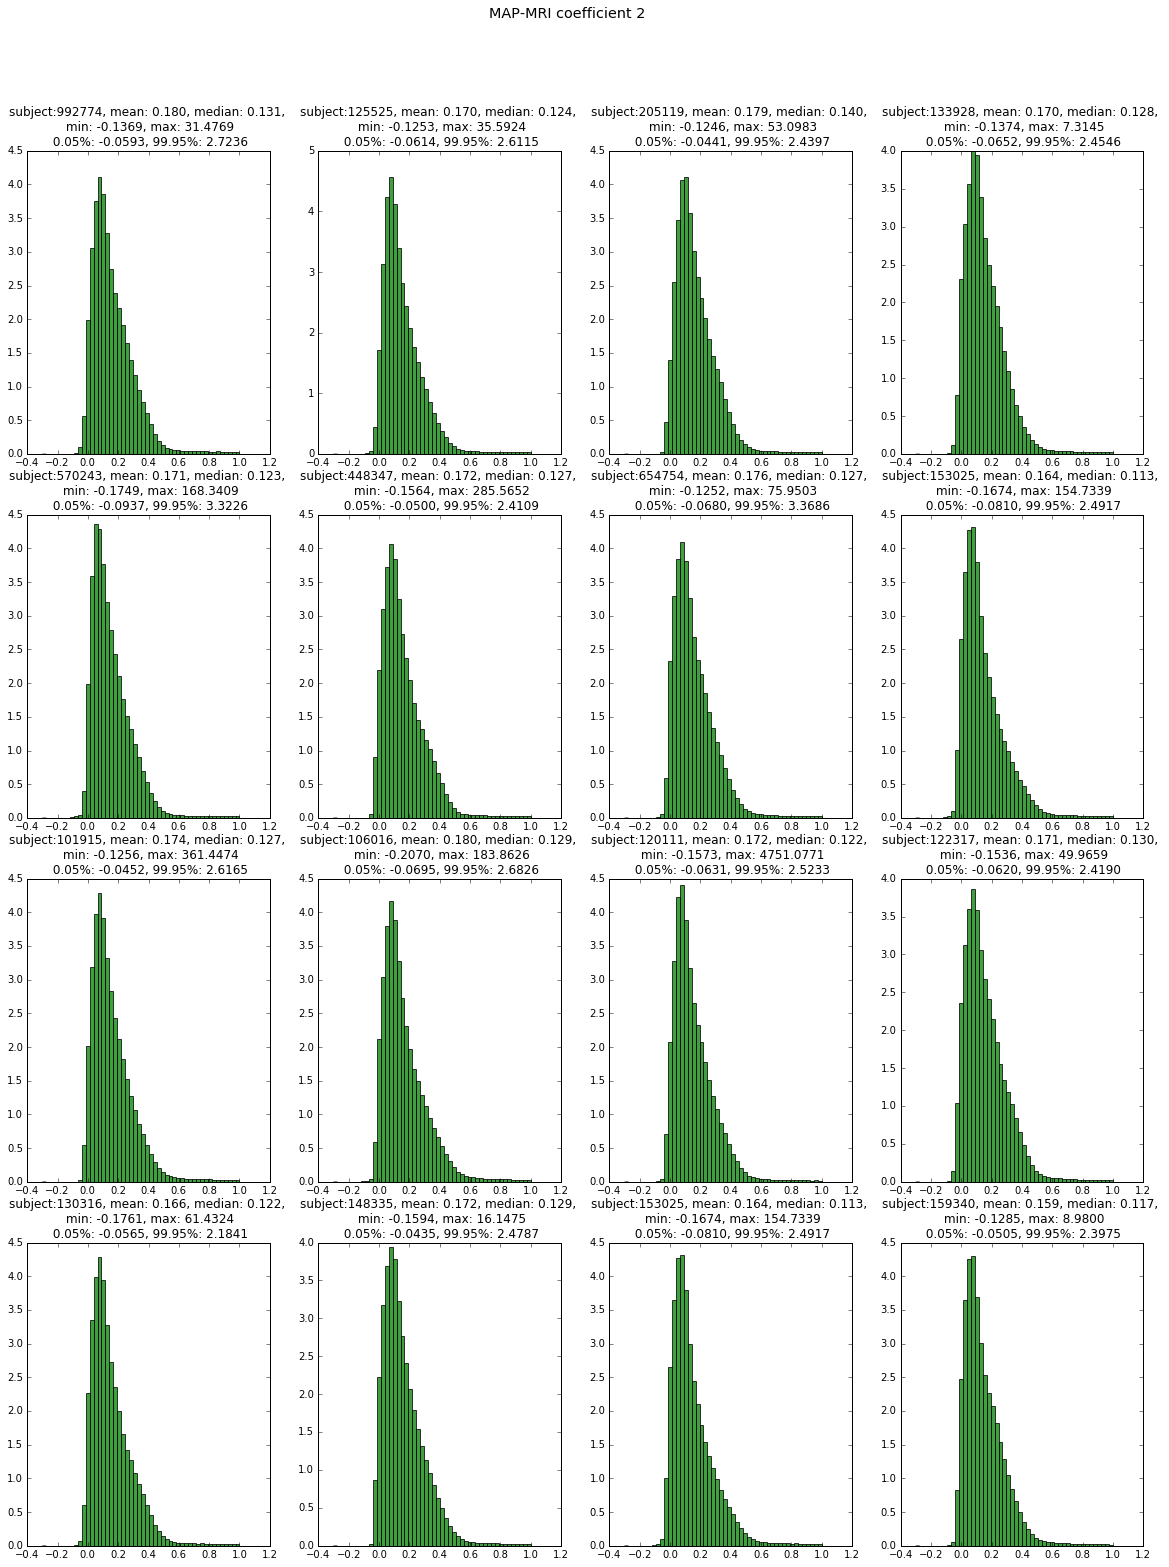

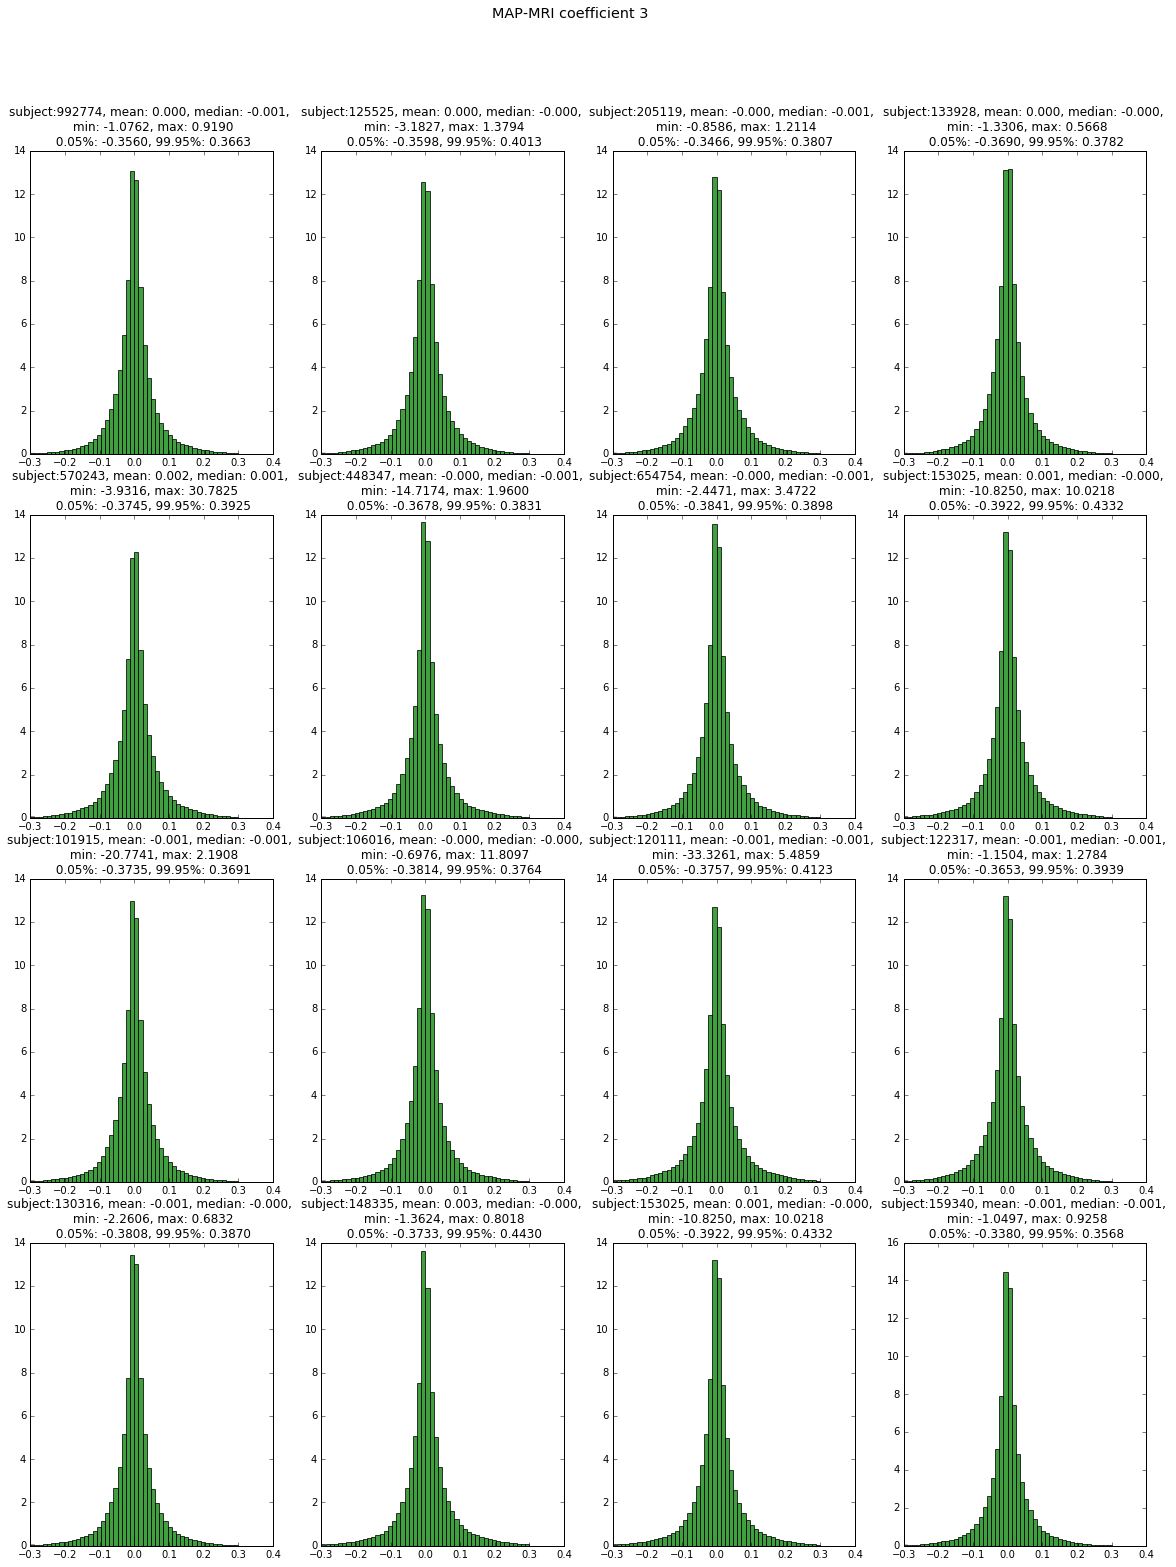

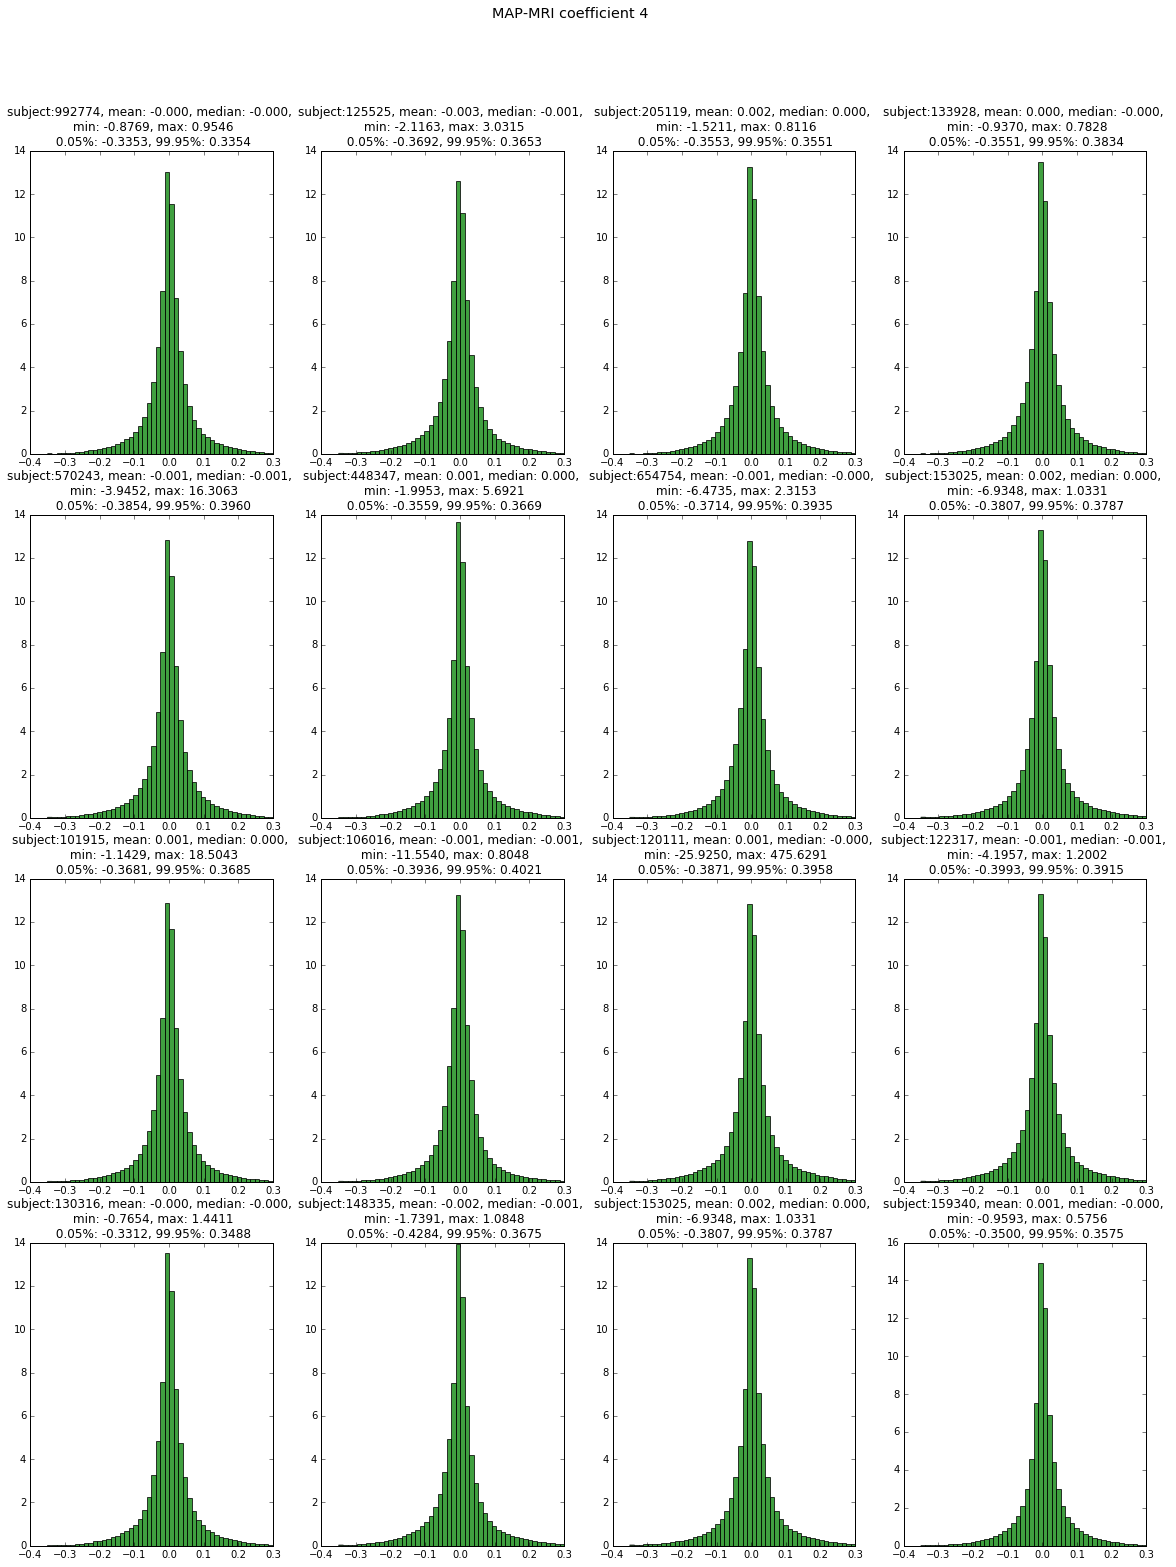

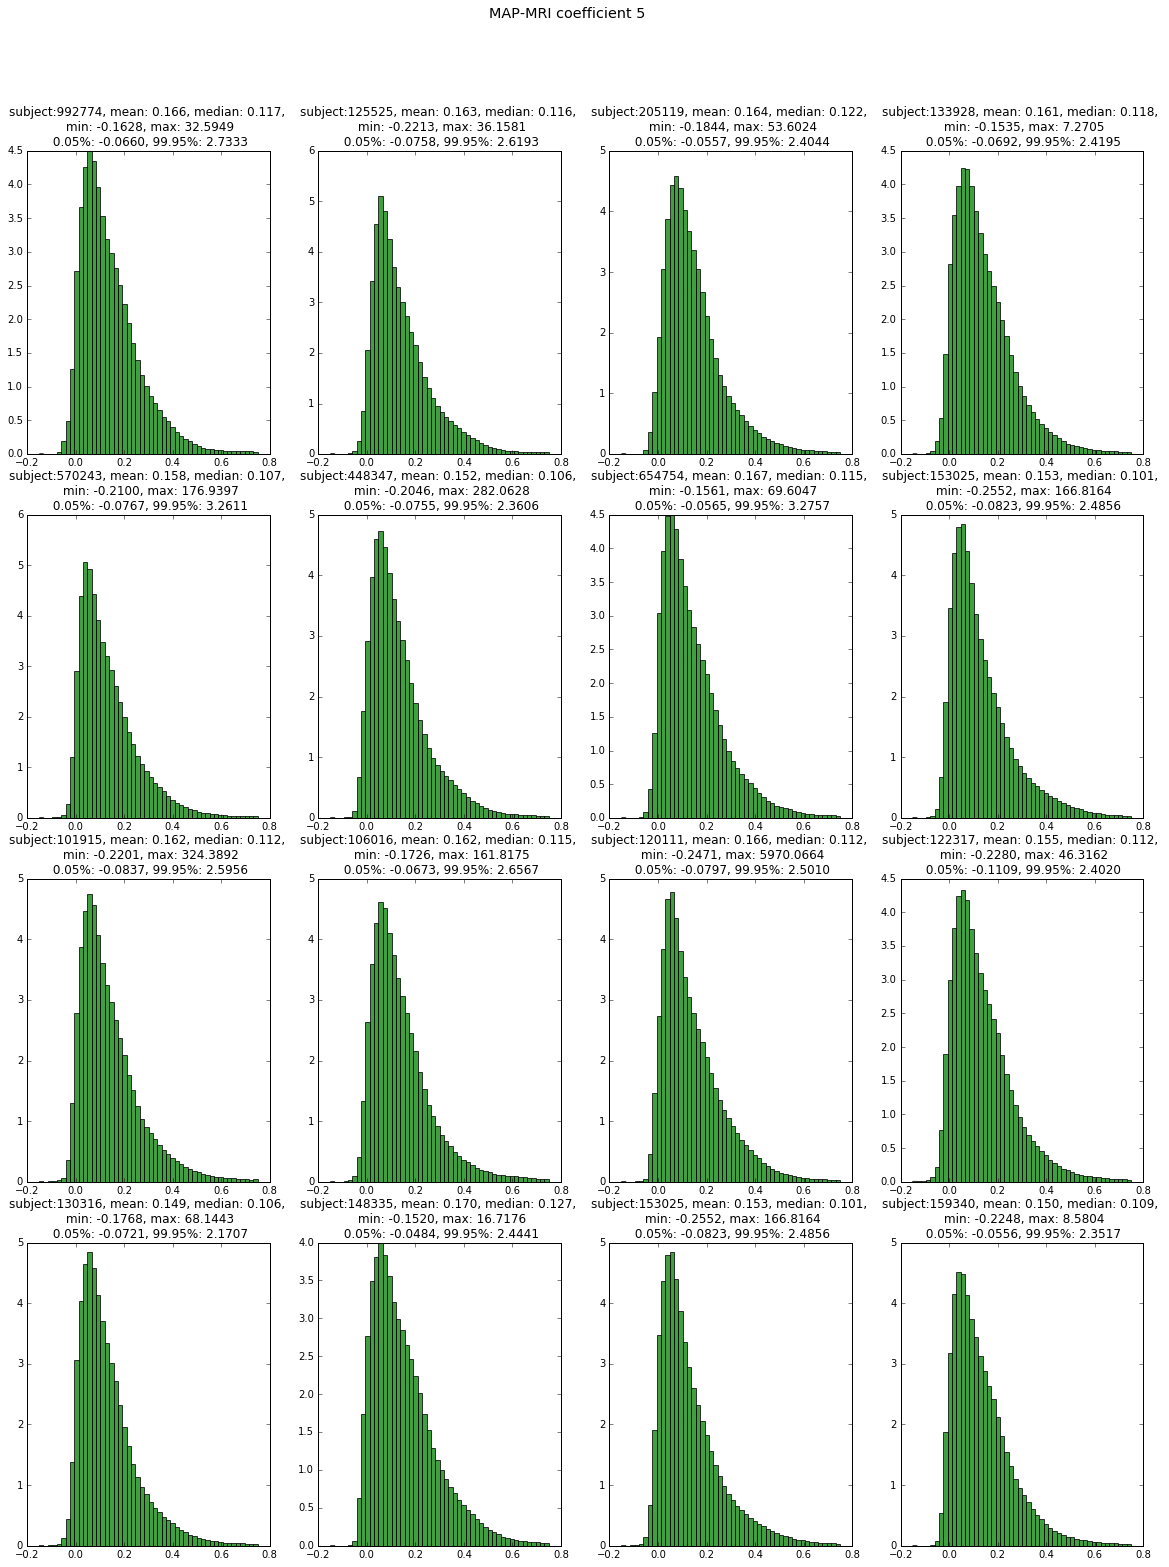

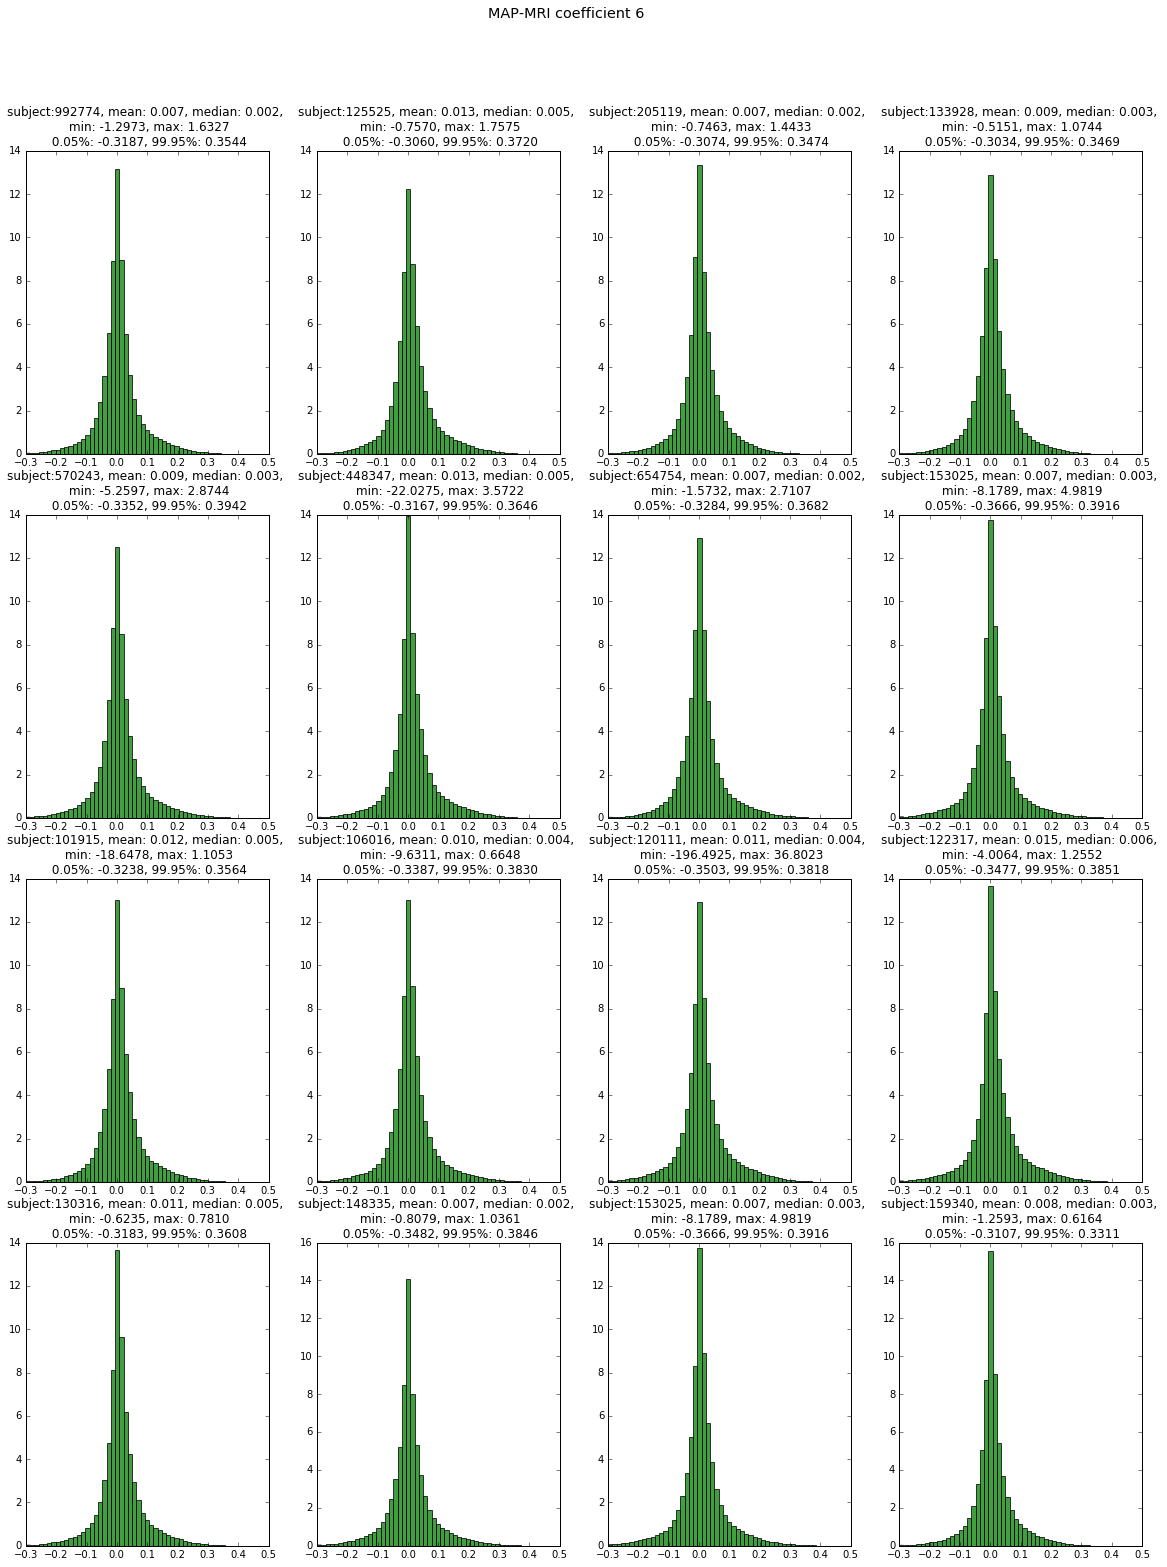

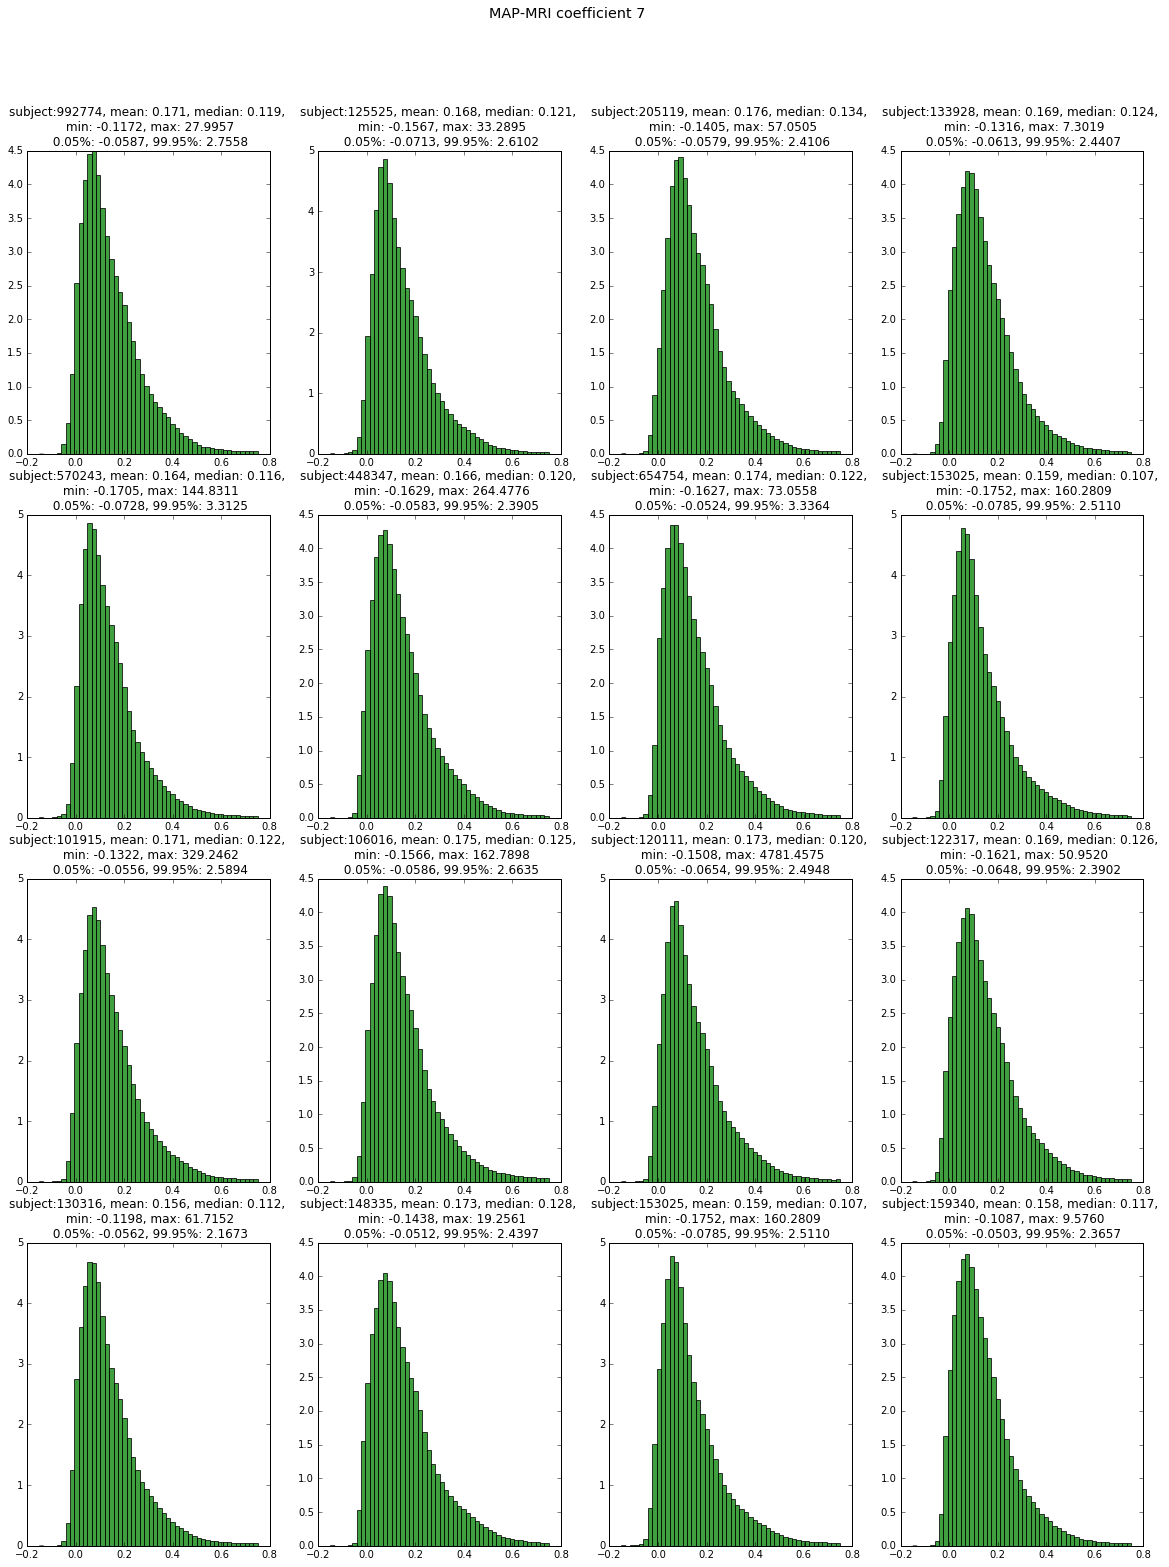

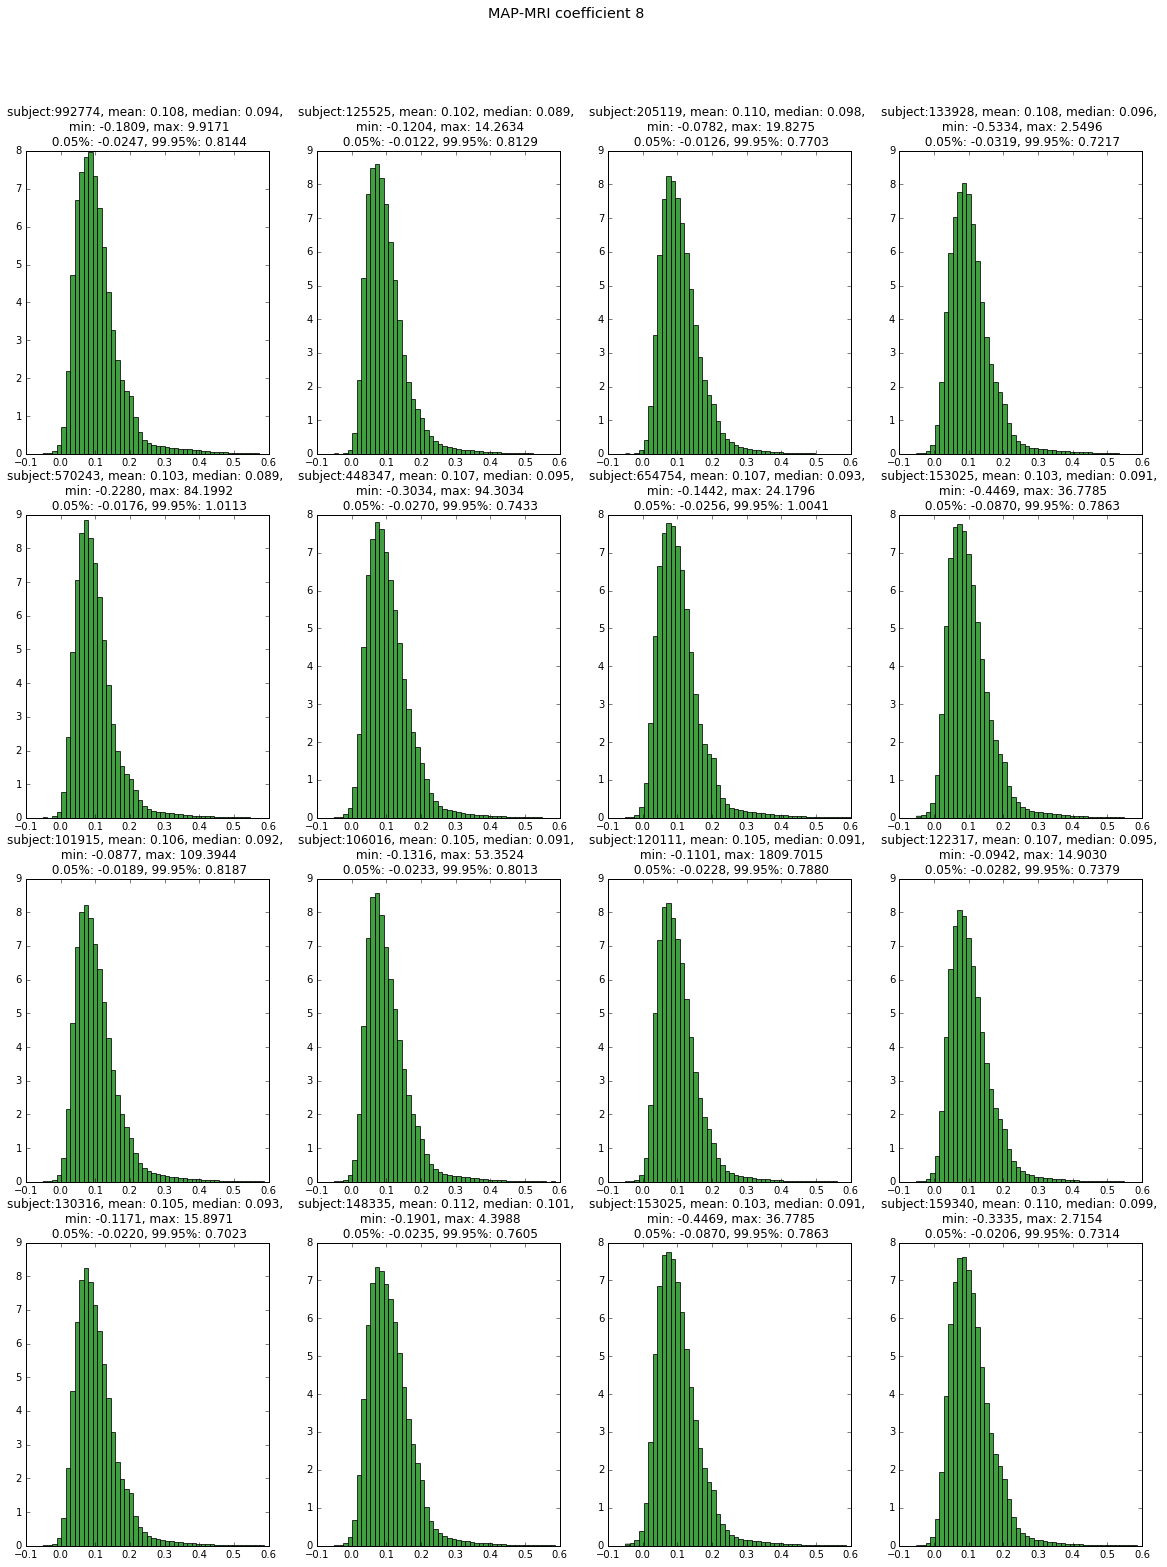

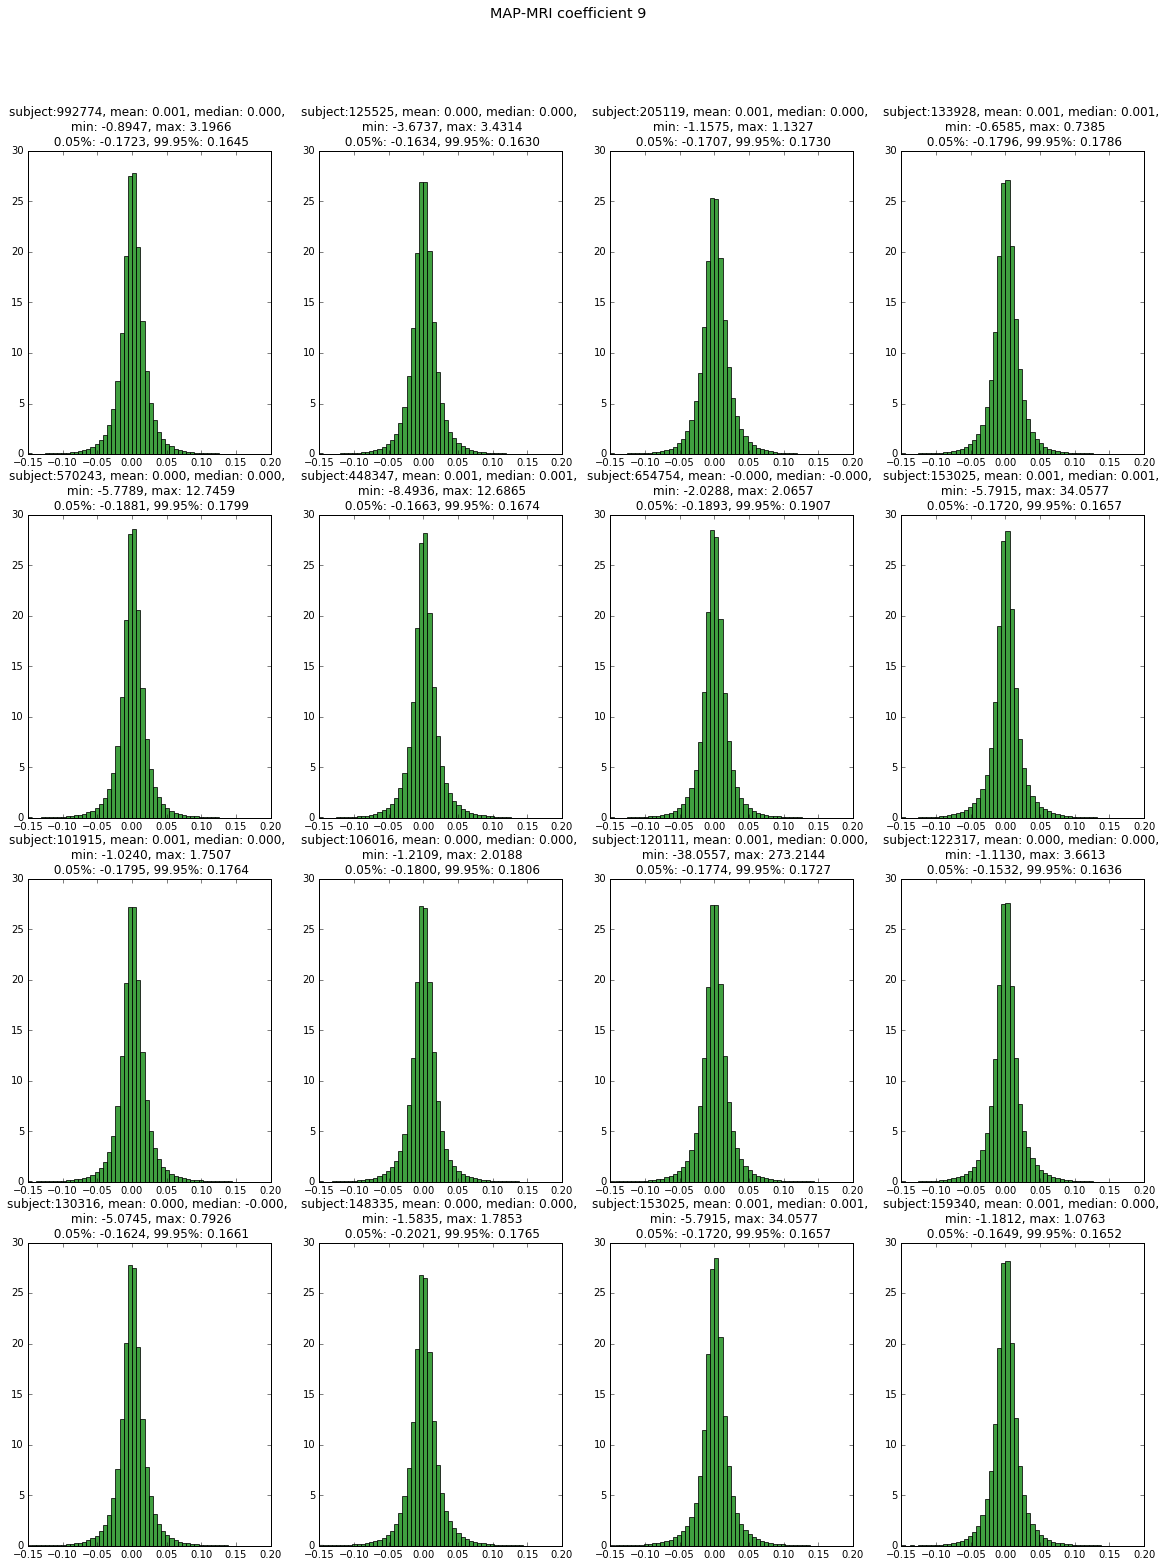

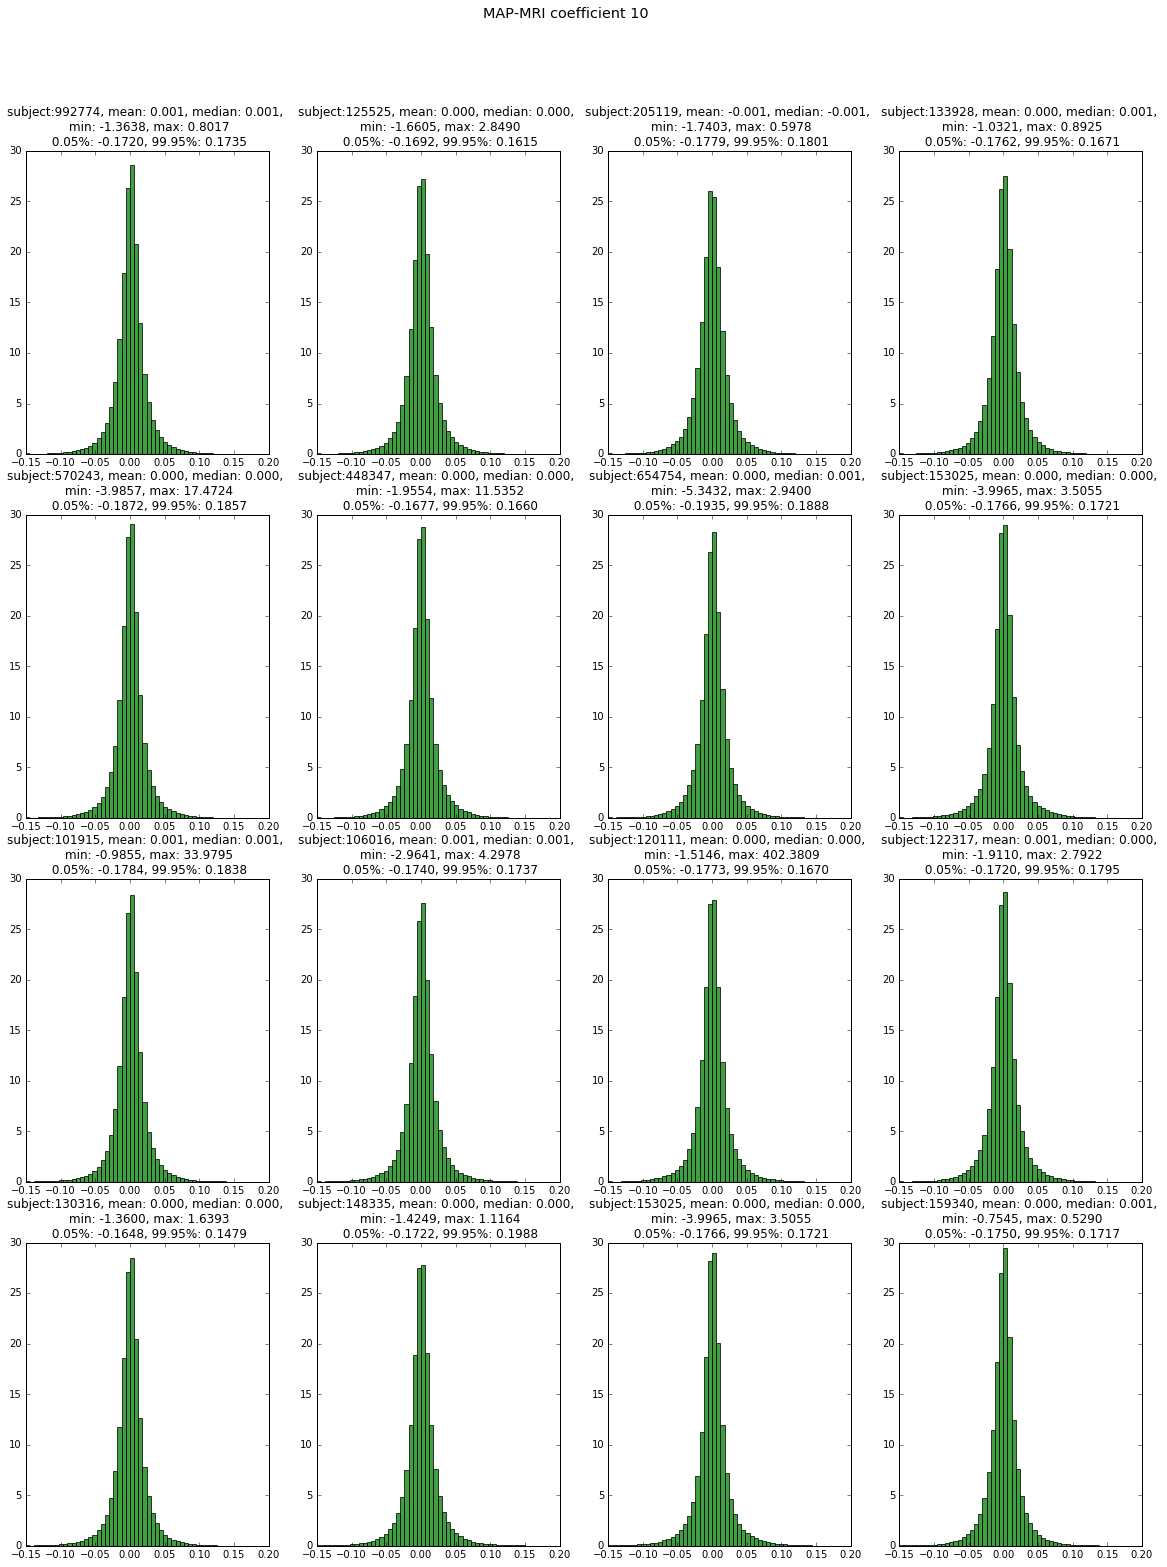

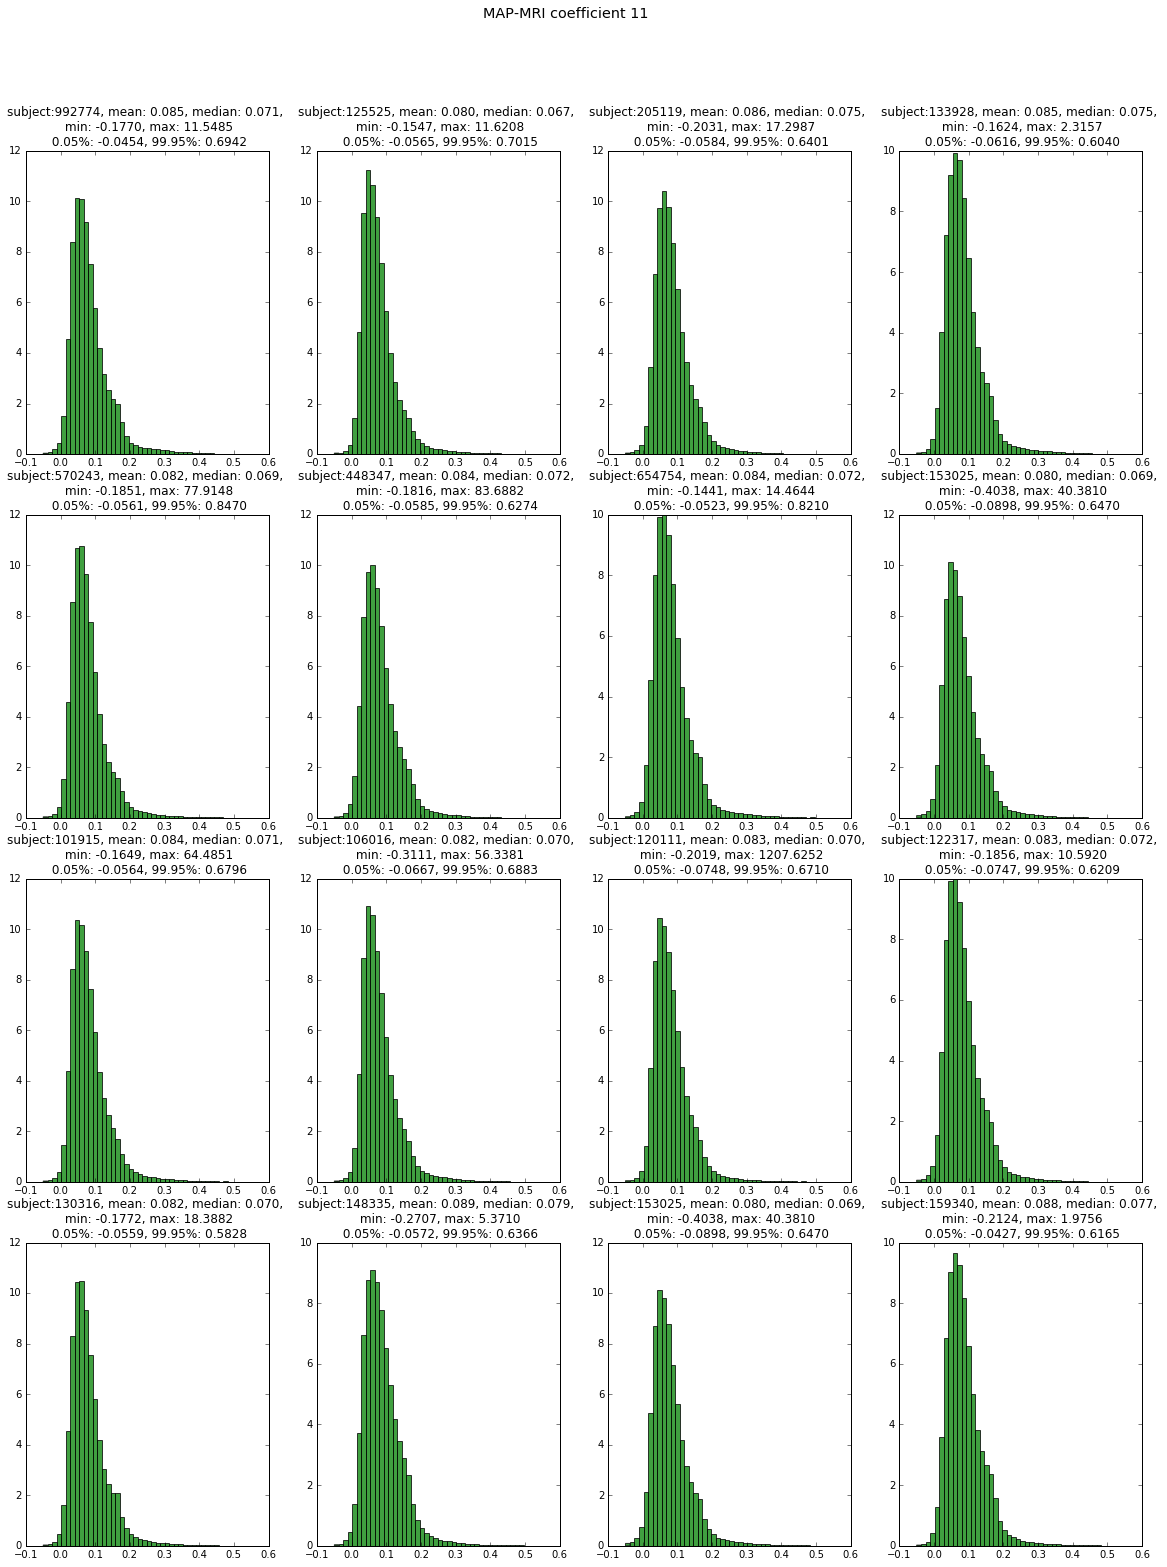

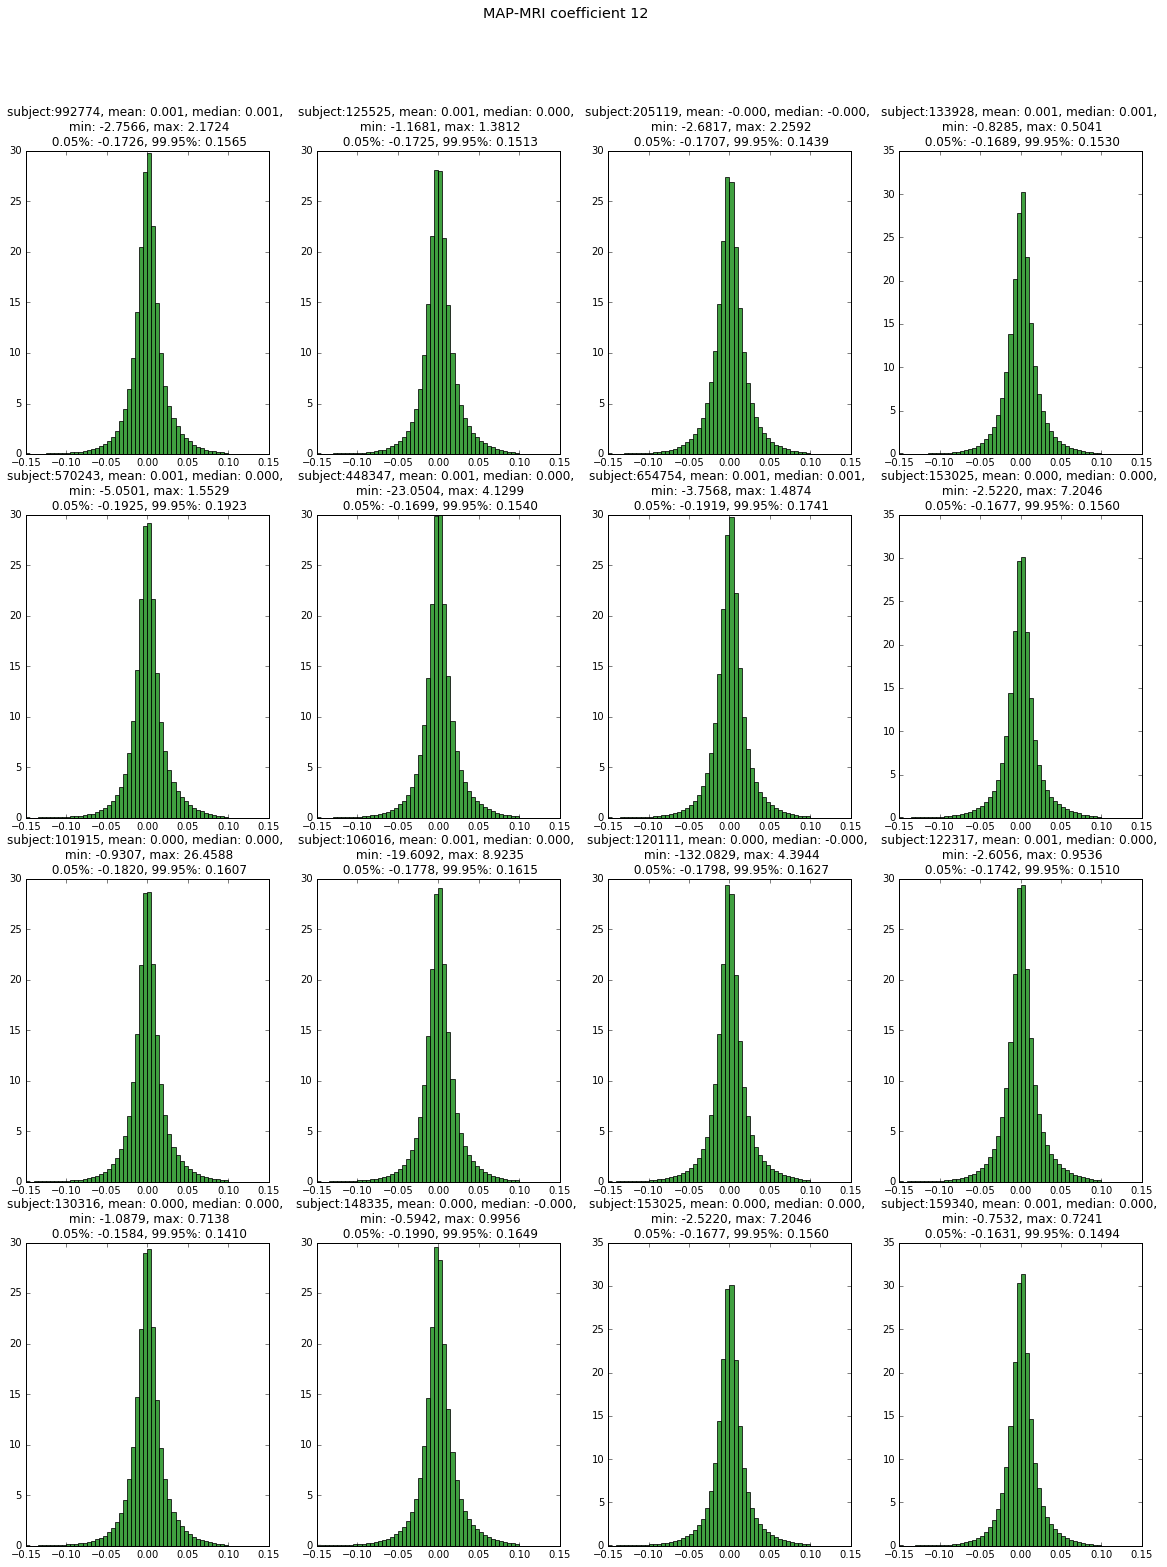

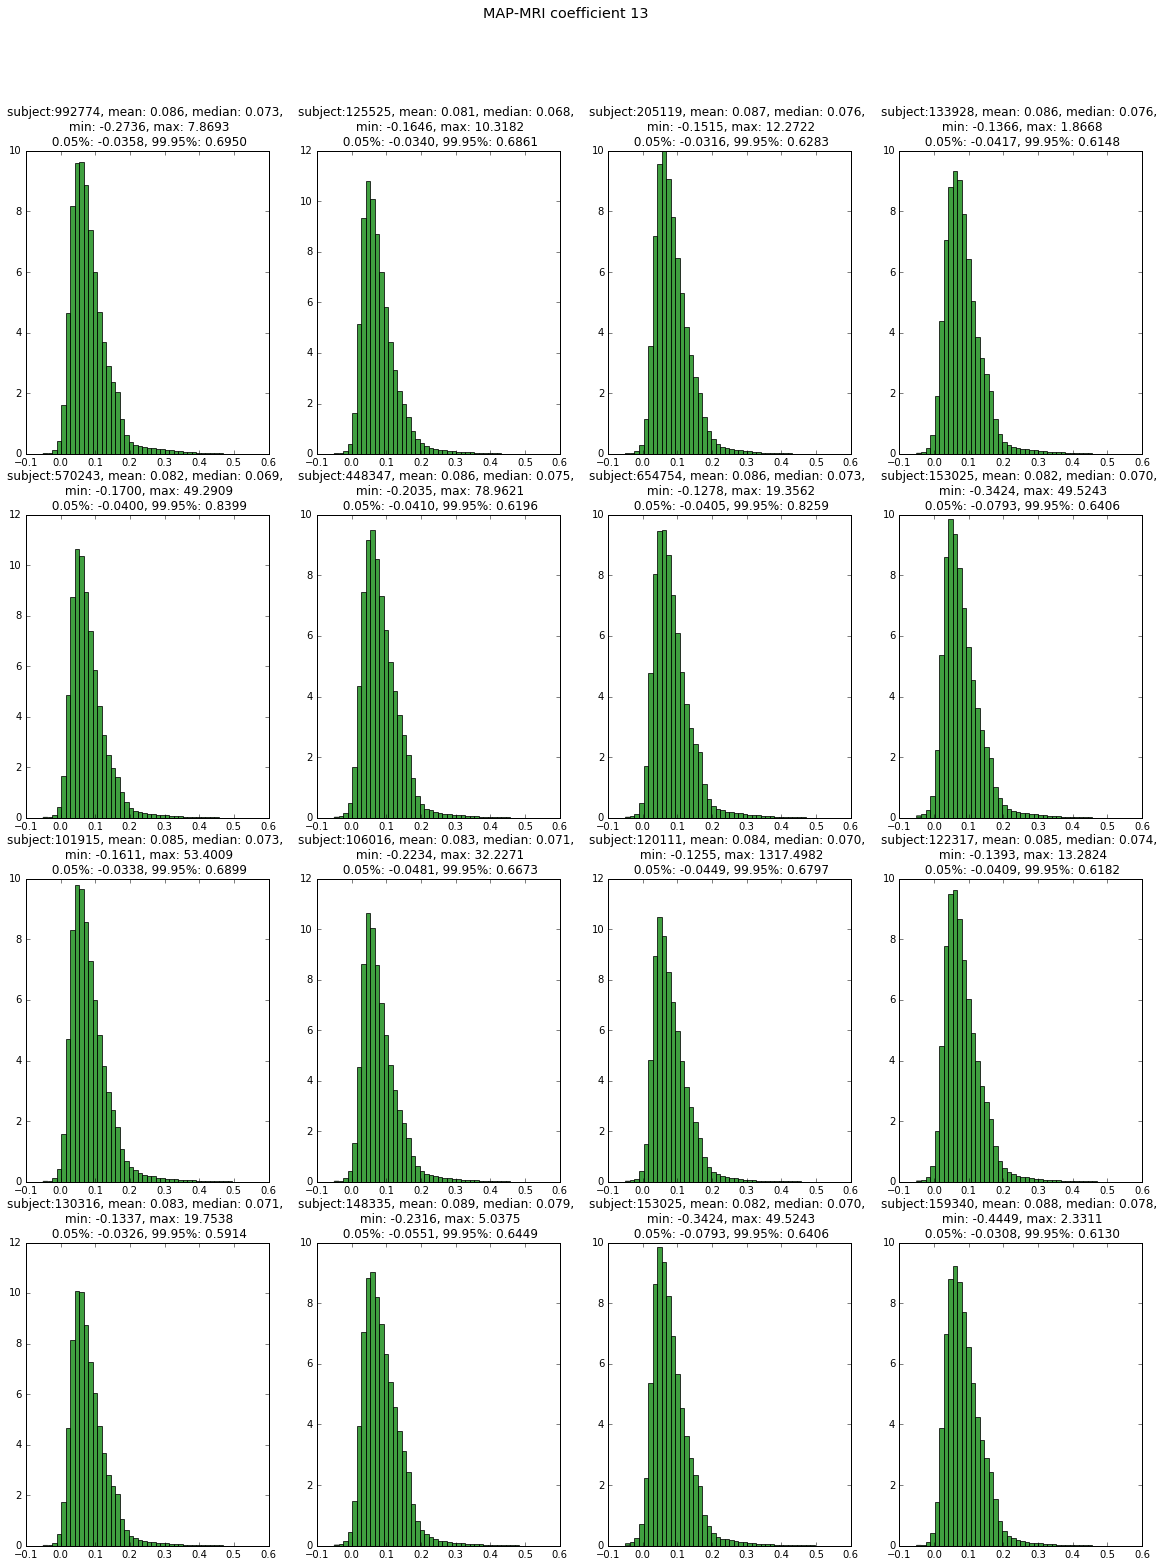

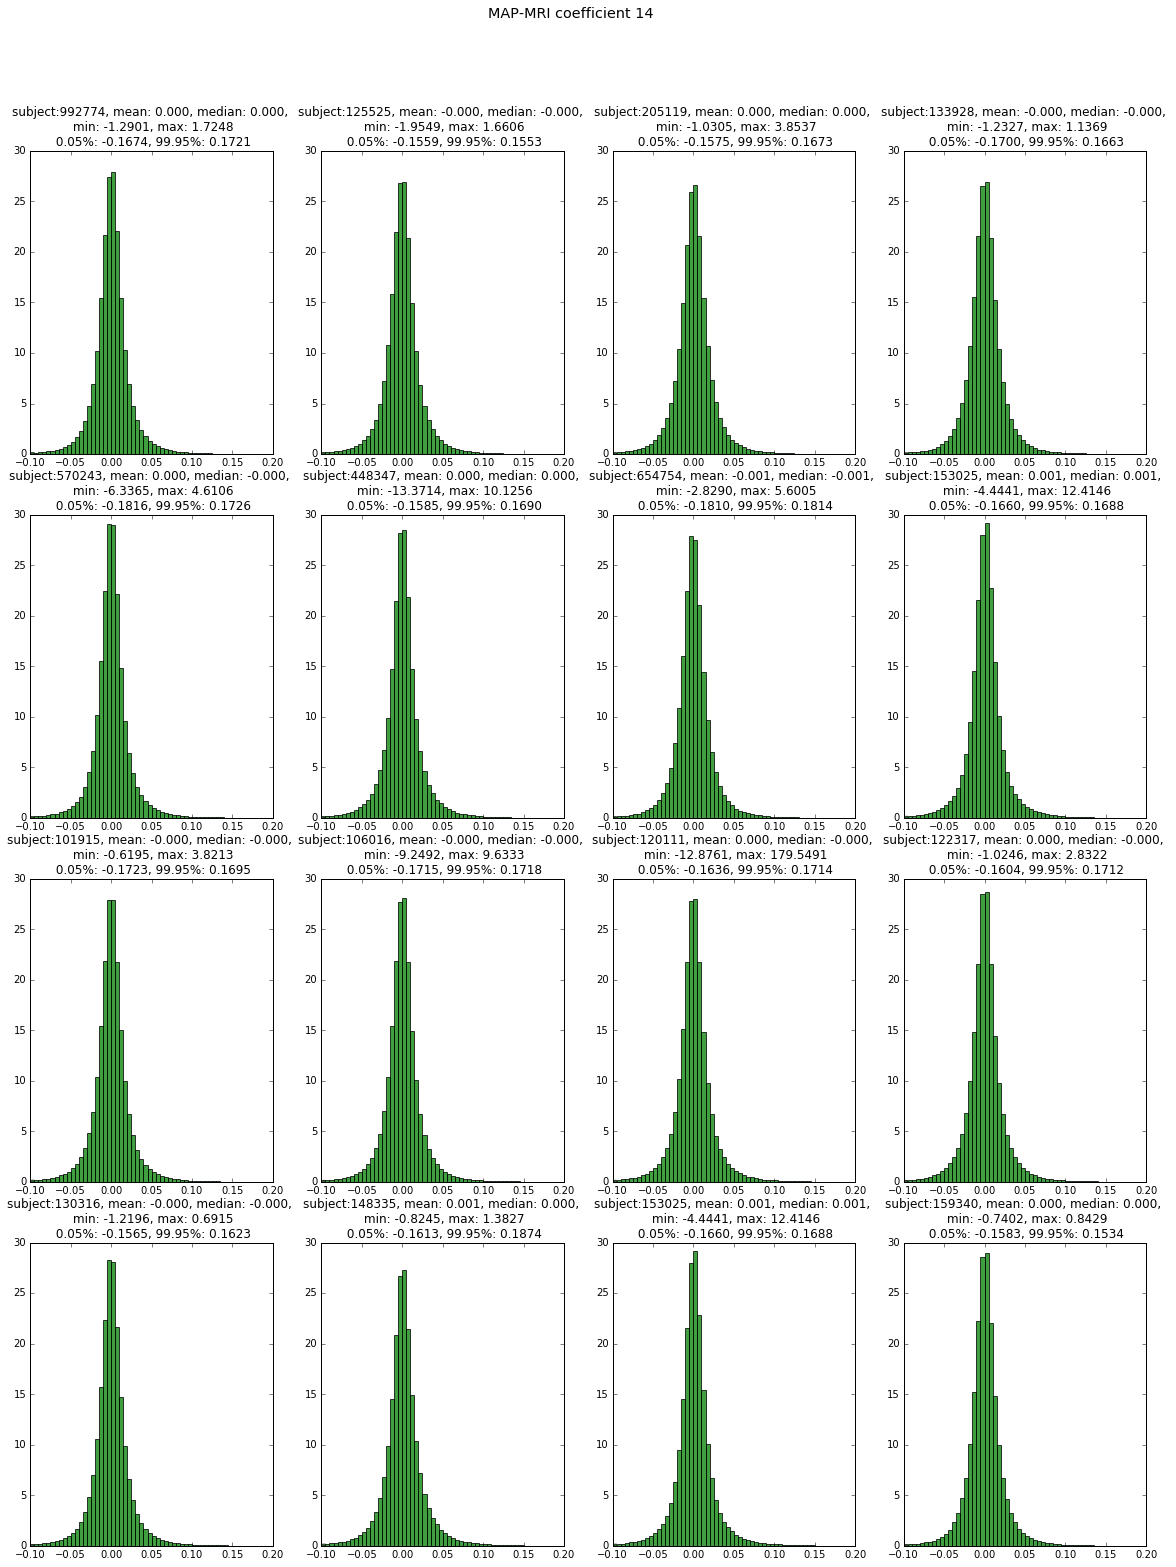

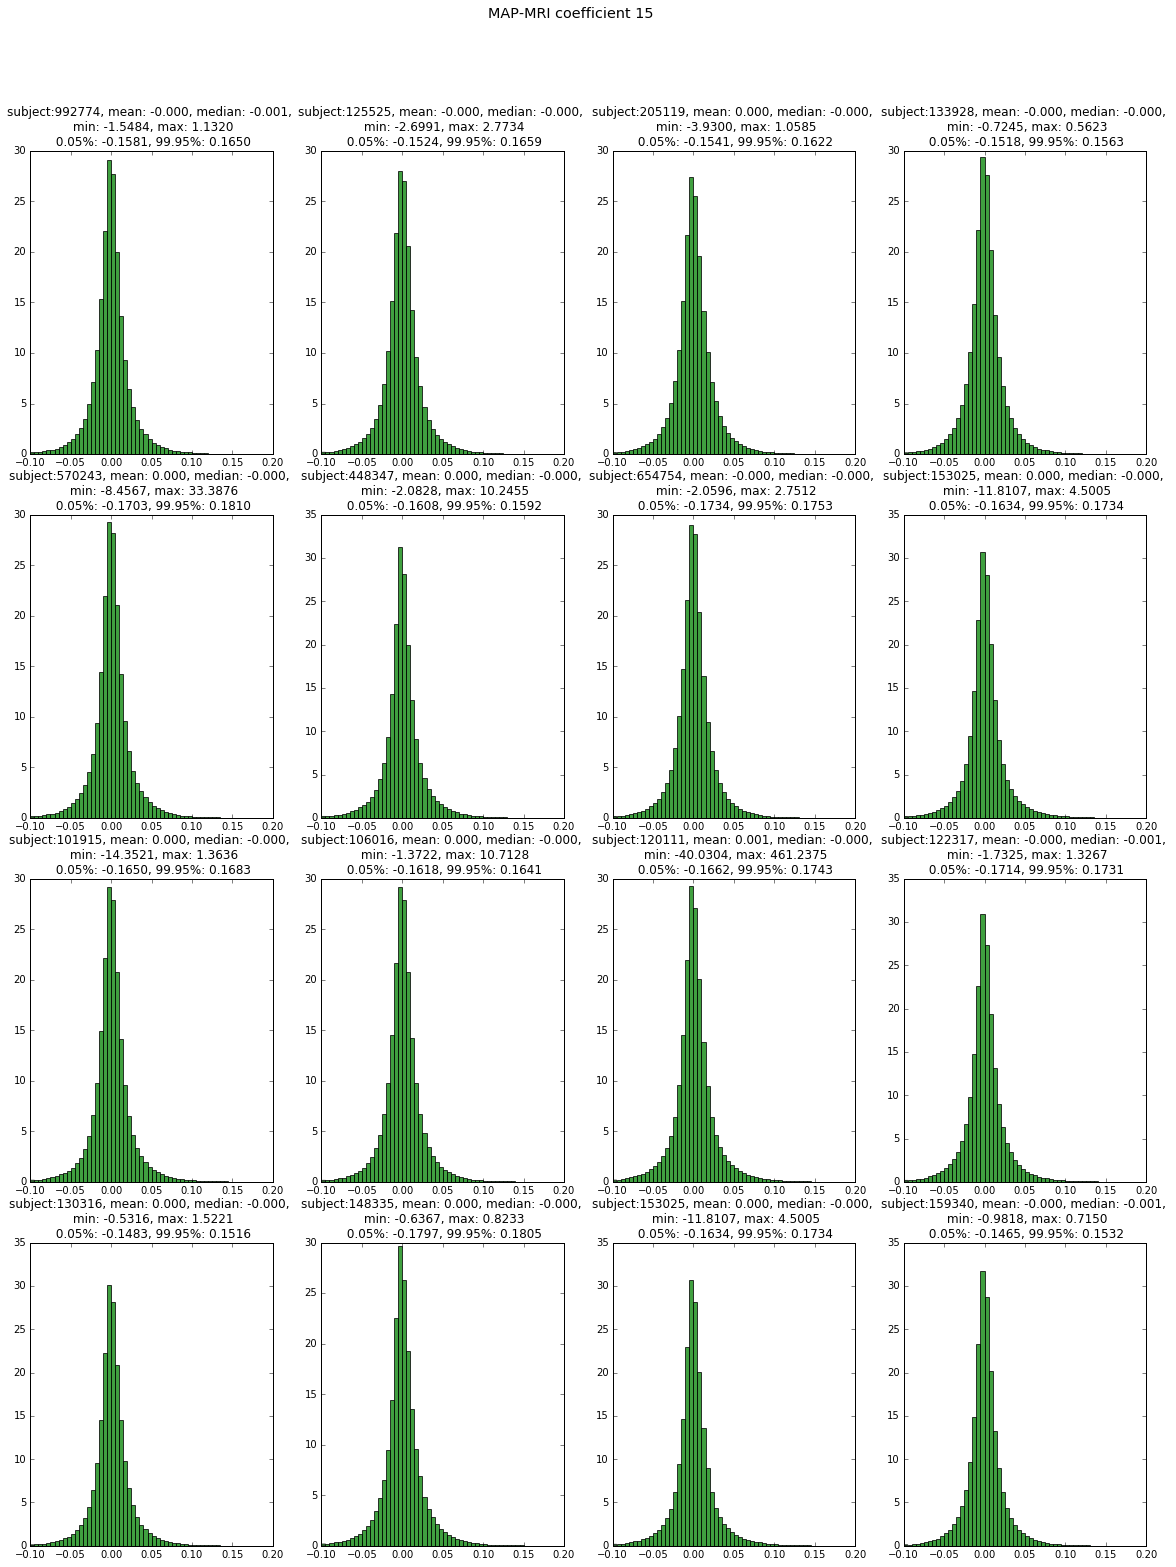

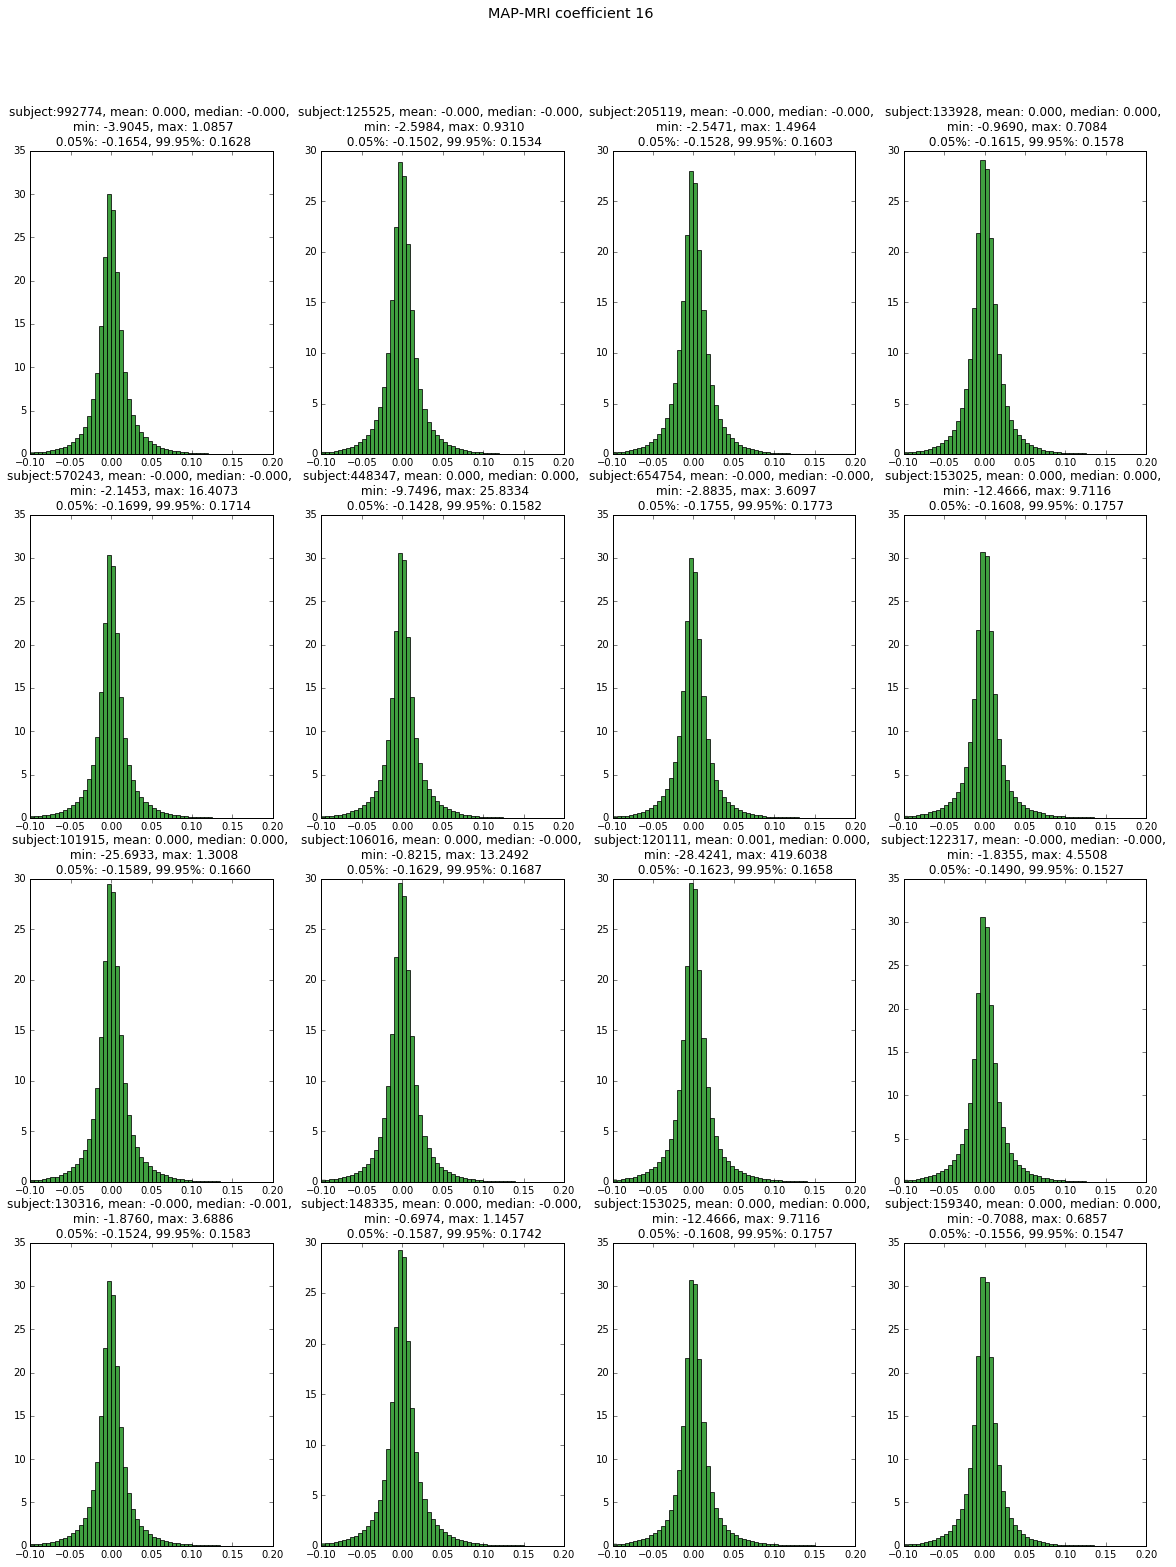

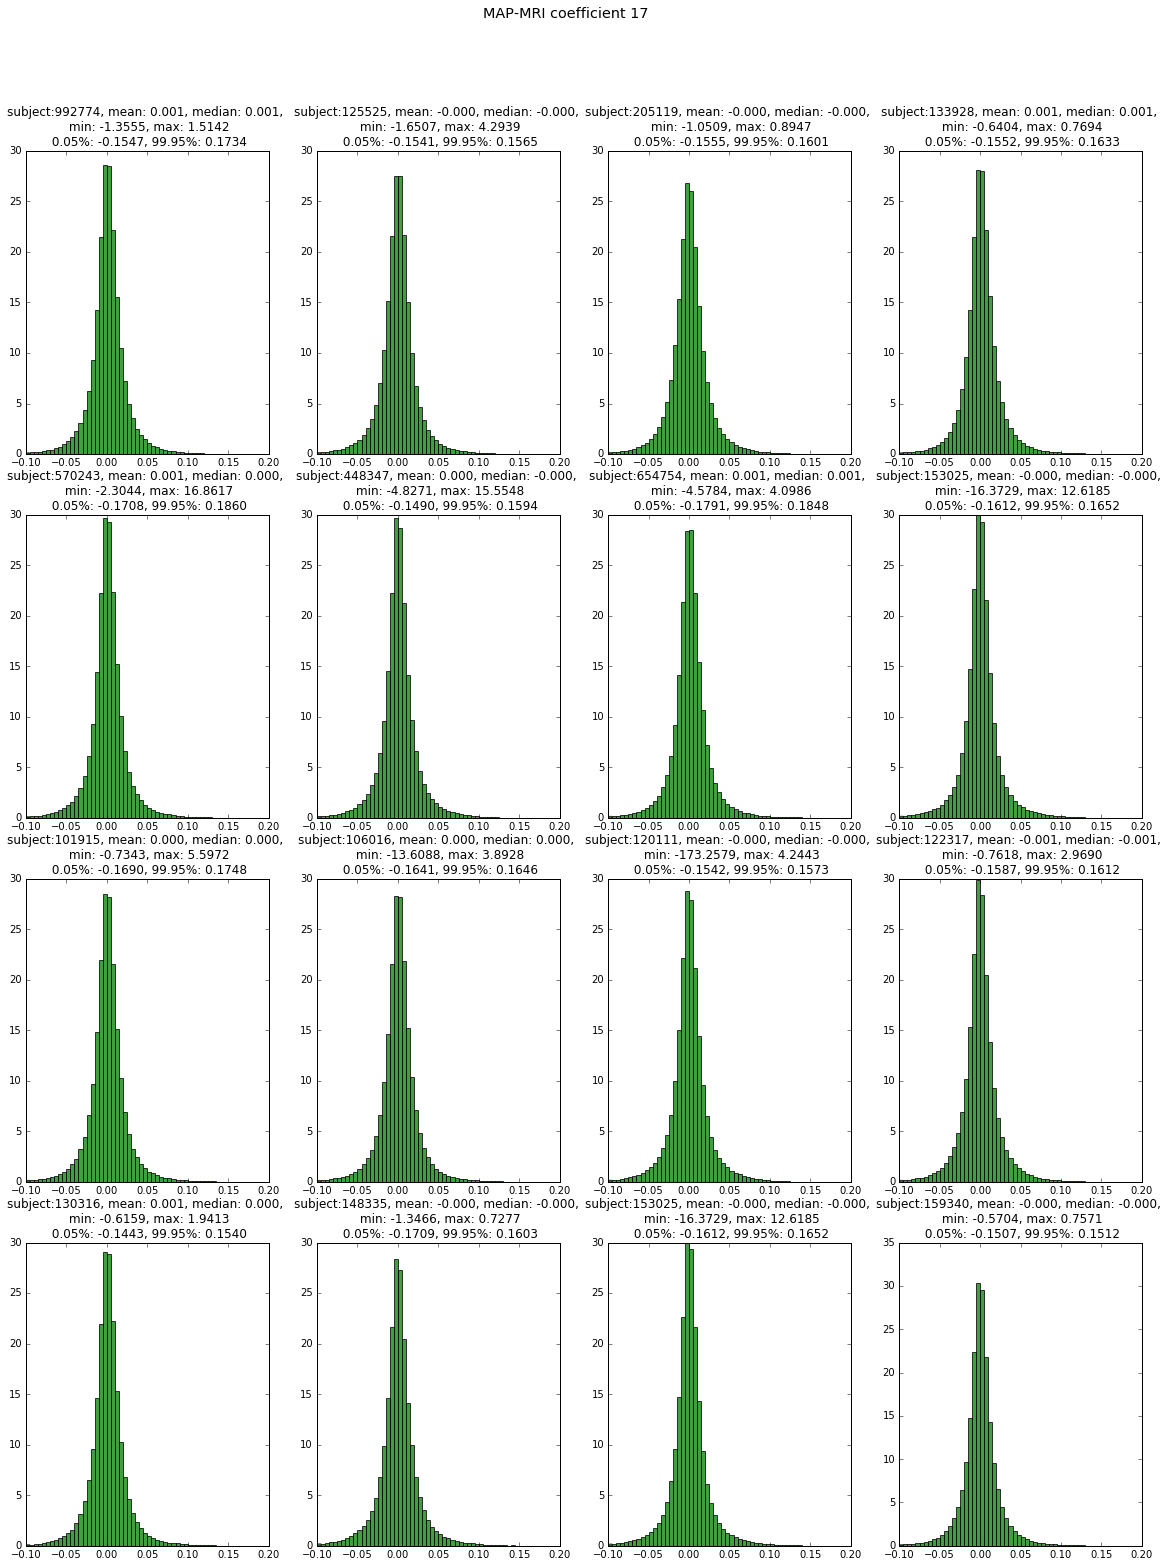

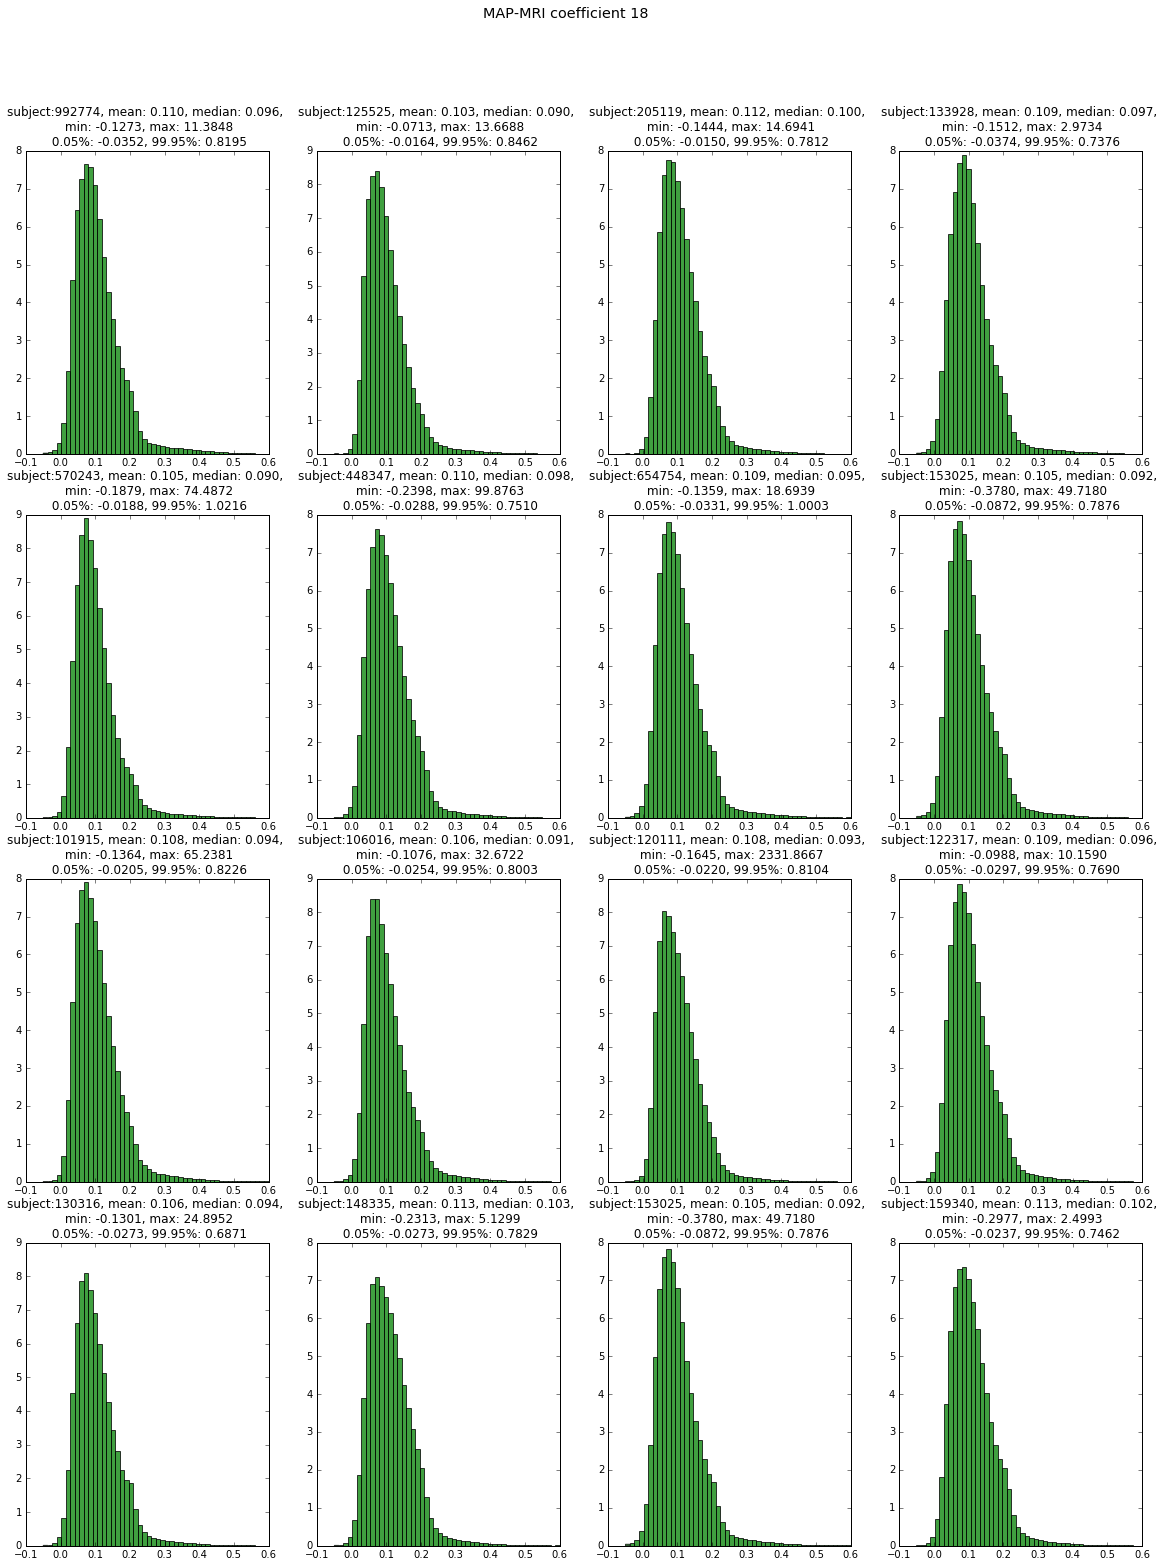

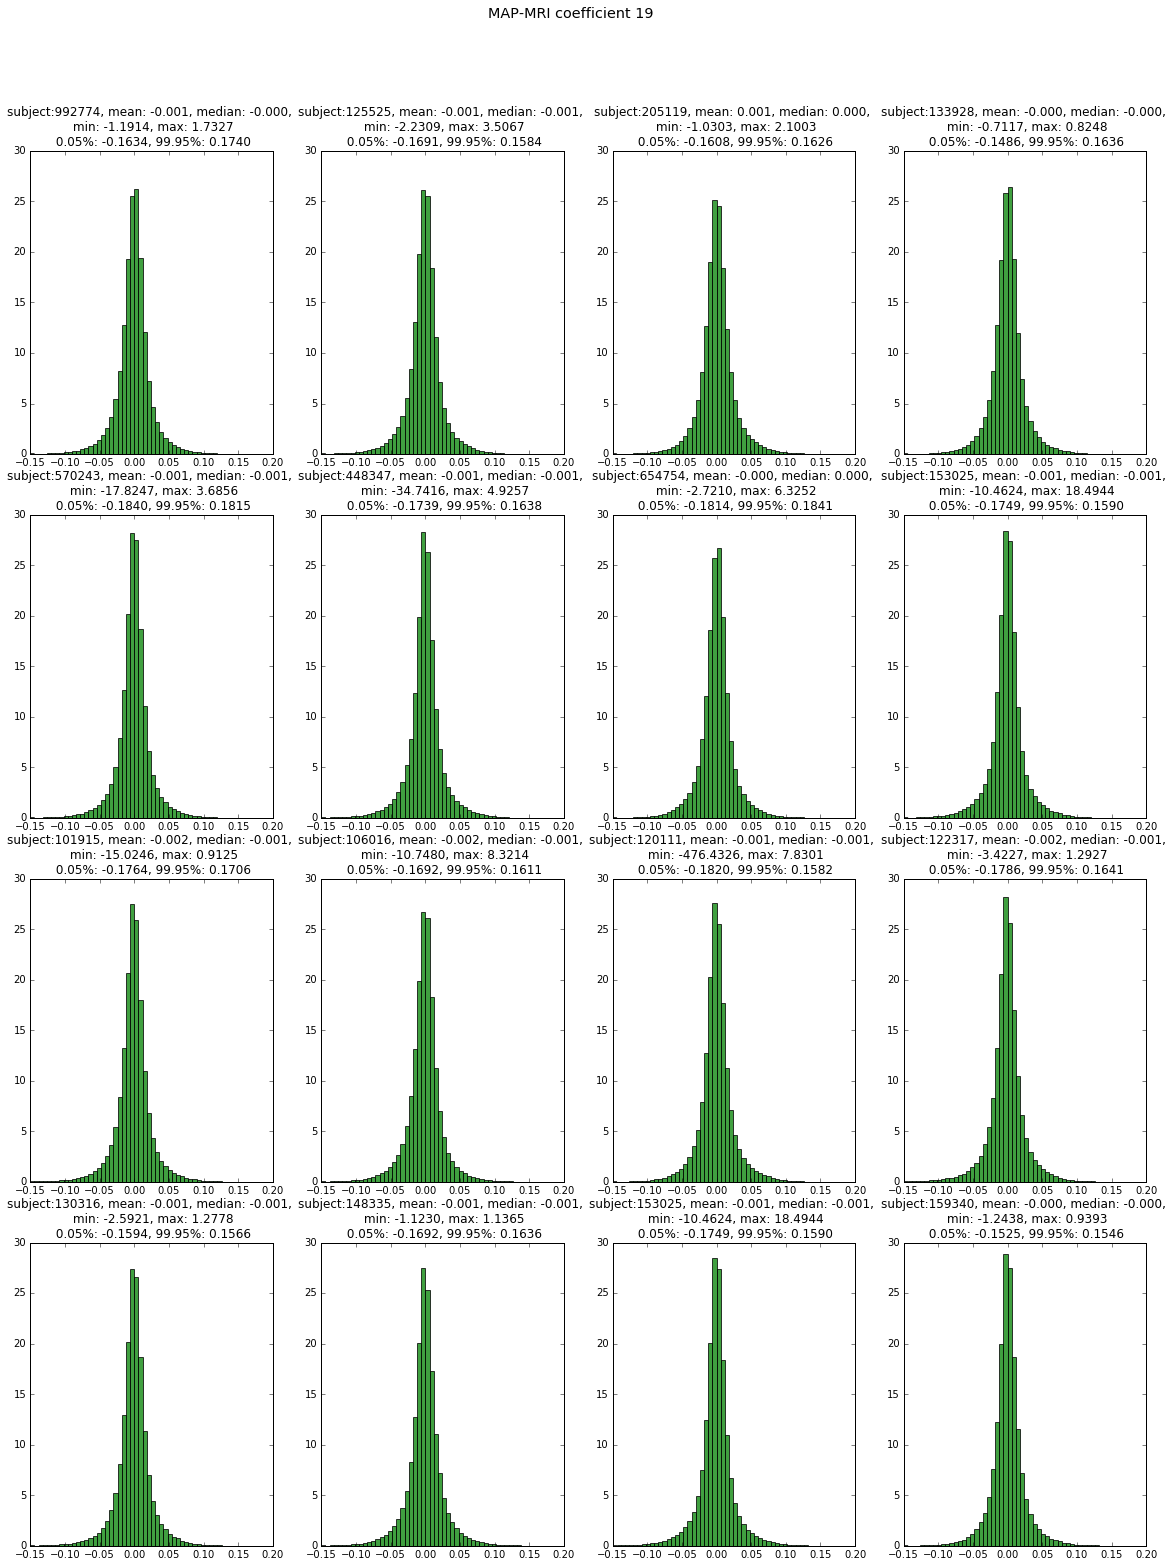

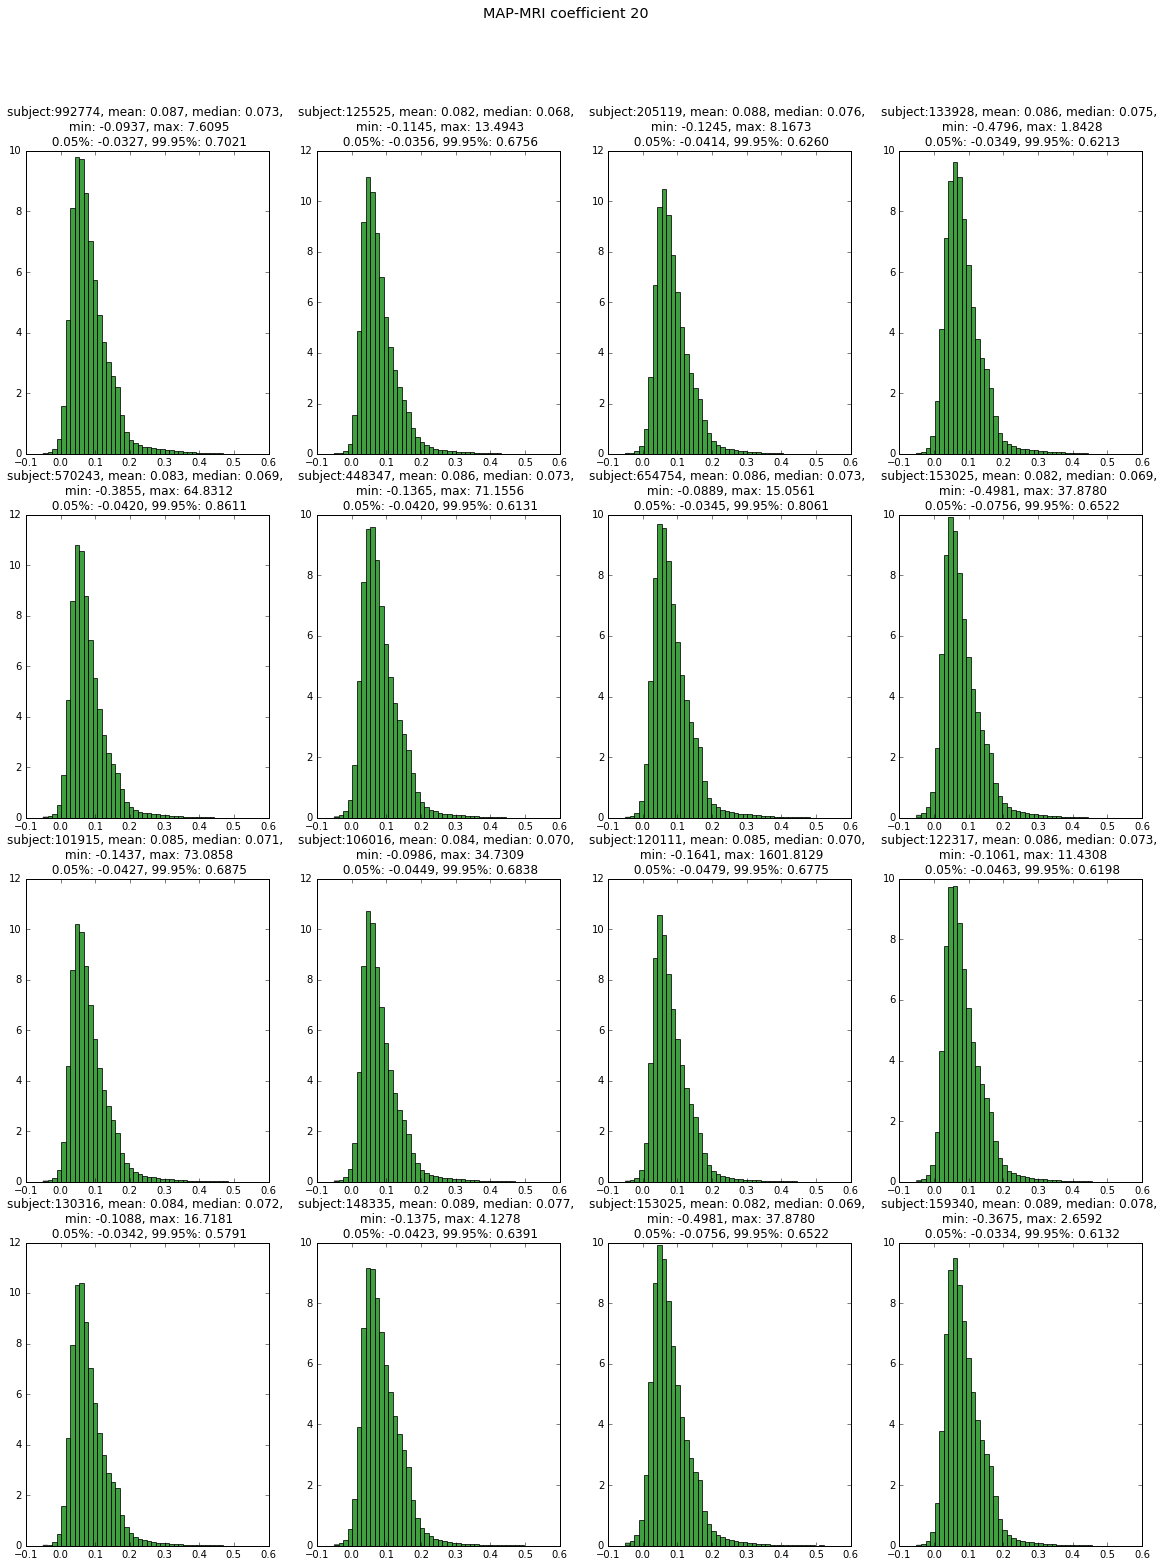

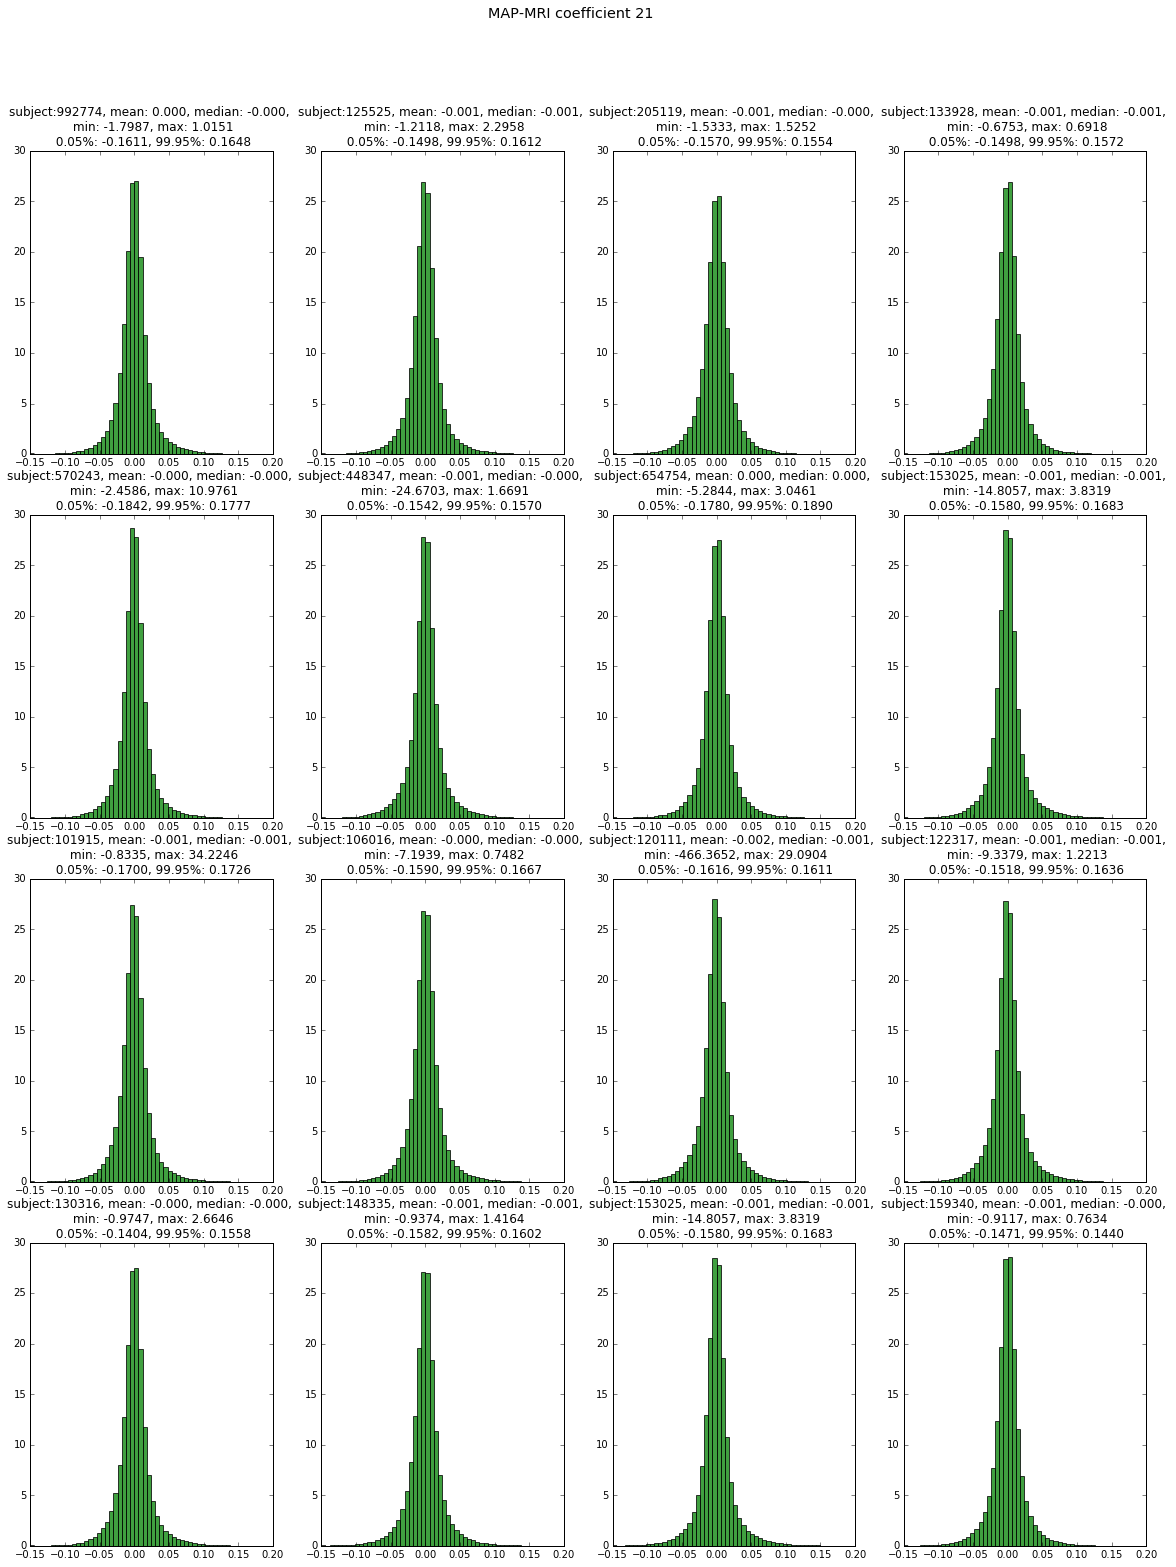

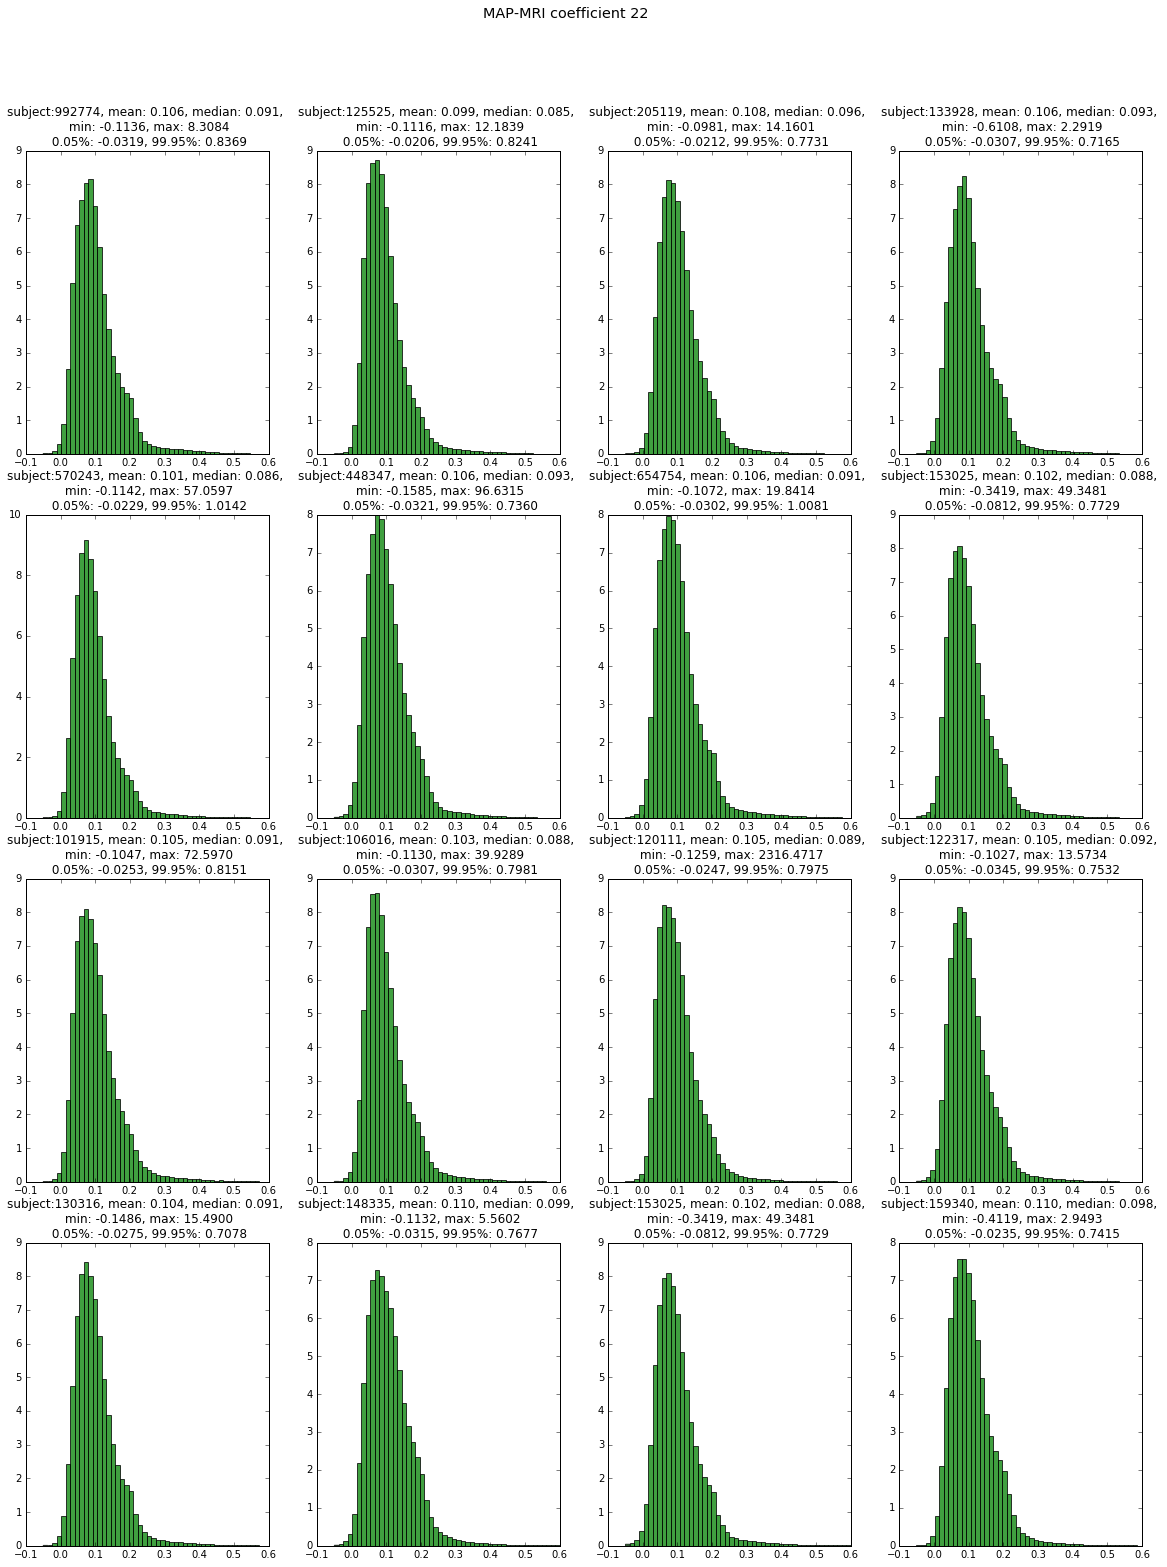

In [168]:
# Visualise the histograms of each ground truth MAP coefficient for different subjects:

# set-up
data_dir = "/Users/ryutarotanno/tmp/MAP/HCP_map_v2/"
subj_list = ['992774', '125525', '205119', '133928', '570243', '448347', '654754', '153025',
             '101915', '106016', '120111', '122317', '130316', '148335', '153025', '159340',
             '162733', '163129', '178950', '188347', '189450', '199655', '211720', '280739',
             '106319', '117122', '133827', '140824', '158540', '196750', '205826', '366446']
subpath="/T1w/Diffusion/"
no_channels=22
upsampling_rate=2
input_header='h4_all_lowres_'+str(upsampling_rate)+'_{:02d}.nii'
series=range(1,no_channels+3)
range_list=[(0.3,1.7),(-0.3,1.0),(-0.3, 0.3),(-0.35, 0.3),(-0.15, 0.75),(-0.3, 0.4),(-0.15, 0.75),(-0.05, 0.6),
            (-0.15, 0.15),(-0.15,0.15),(-0.05, 0.6),(-0.15,0.1),(-0.05, 0.6),(-0.1,0.15),(-0.1,0.15),(-0.1,0.15),
            (-0.1,0.15),(-0.05, 0.6),(-0.15, 0.15),(-0.05, 0.6),(-0.15, 0.15),(-0.05, 0.6)]

# parameters:
for ch_idx in range(2,24):
#     ch_idx=2  # channel index at least 2 and at most 23
    num_subjects=16
    ncols=4
    nrows=num_subjects/ncols
    width = 20
    height = 25

    fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(width,height))
    fig.suptitle("MAP-MRI coefficient {}".format(ch_idx-1), fontsize="x-large")

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            idx=i*ncols+j
            img,_=load_series_nii(data_dir+subj_list[idx]+subpath+gt_header, series, dtype='float32', is_print=False)
            brain_mask = img[...,0]==0
            v_ch=img[...,ch_idx]
            mean=np.mean(v_ch[brain_mask])
            median=np.median(v_ch[brain_mask])
            minim =np.min(v_ch[brain_mask]) 
            maxim =np.max(v_ch[brain_mask]) 
            perc_tail= np.percentile(v_ch[brain_mask],0.05)
            perc_head= np.percentile(v_ch[brain_mask],99.95)

            n, bins, patches = col.hist(v_ch[brain_mask], bins=50, range=range_list[ch_idx-2],normed=1, facecolor='g', alpha=0.75)
            #n, bins, patches = col.hist(v_ch[brain_mask], bins=50, normed=1, facecolor='g', alpha=0.75)
            #col.set_xlabel('range of values')
            #col.set_ylabel('mass')
            col.set_title("subject:{}, mean: {:4.3f}, median: {:4.3f}, \n min: {:5.4f}, max: {:5.4f}\n 0.05%: {:5.4f}, 99.95%: {:5.4f}"
                          .format(subj_list[idx],mean,median,minim,maxim,perc_tail,perc_head))
    
    save_dir="/Users/ryutarotanno/tmp/MAP/figs/"
    fig.savefig(save_dir+"h4_all_lowres_2_{:02d}.png".format(ch_idx-1))
    print("Saving h4_all_{:02d}.png".format(ch_idx-1))


In [169]:
img,_=load_series_nii(data_dir+subj_list[10]+subpath+gt_header, series, dtype='float32', is_print=False)
print(img.shape)
brain_mask = img[...,0]==0
v_ch=img[...,5]
mean=np.mean(v_ch[brain_mask])
maxim =np.max(v_ch[brain_mask]) 
print(maxim)
print("voxels larger than 200 is {}/{}".format((v_ch>0.5).sum(),brain_mask.sum()))

('Converting to:', 'float32')


/Users/ryutarotanno/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: ``get_header`` is deprecated.
Please use the ``img.header`` property instead


(145, 174, 145, 24)
475.629119873
voxels larger than 200 is 32/770883


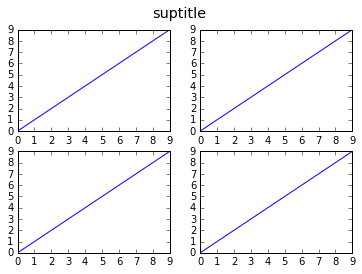

In [145]:
x = range(10)
y = range(10)
width=12
height=12

fig, ax = plt.subplots(nrows=2,ncols=2)
fig.suptitle("suptitle", fontsize="x-large")
for i, row in enumerate(ax):
    for j, col in enumerate(row):
            col.plot(x, y)

plt.show()


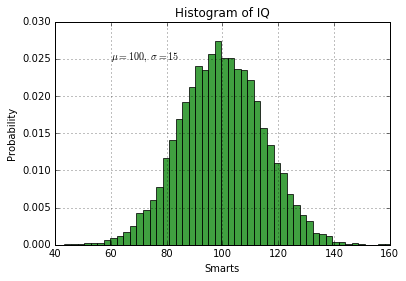

In [67]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [176]:
import numpy as np
A = np.random.rand(3,3)
print(A)
print(A[A>0.5])
print(A[:,1][A[:,1]>0.5])

[[ 0.68882255  0.67304861  0.03301739]
 [ 0.23861548  0.66983354  0.13218356]
 [ 0.86949882  0.66229536  0.51325409]]
[ 0.68882255  0.67304861  0.66983354  0.86949882  0.66229536  0.51325409]
[ 0.67304861  0.66983354  0.66229536]
